In [1]:
import sys
import os
import json
import h5py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display

from chemicalchecker import ChemicalChecker 
from chemicalchecker.core import DataSignature
from chemicalchecker.util import Config
import chemicalchecker

# Set CC Verbosity
ChemicalChecker.set_verbosity('DEBUG')
%matplotlib inline

/home/acomajuncosa/programs/anaconda3/envs/cc_37/lib/python3.7/site-packages/chemicalchecker/util/plot/plot.py:21: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://matplotlib_inline.backend_inline' by the following code:
  File "/home/acomajuncosa/programs/anaconda3/envs/cc_37/lib/python3.7/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/acomajuncosa/programs/anaconda3/envs/cc_37/lib/python3.7/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/acomajuncosa/programs/anaconda3/envs/cc_37/lib/python3.7/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/home/acomajuncosa/programs/anaconda3/envs/cc_37/lib/python3.7/site-packages/traitlets/config/application.py", line

In [2]:
data_path = "/aloy/web_checker/package_cc/2021_07/sign_model_links/"  # Link to Current CC
local_cc_dir = '../local_CC_B1'  # Link to New CC

# Our local CC instance
cc_local = ChemicalChecker(local_cc_dir, custom_data_path=data_path)

2024-06-12 10:46:35,891 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_B1
2024-06-12 10:46:36,293 chemicalchecker.core.chemcheck.ChemicalChecker [INFO    ] CC root directory exists: ignoring 'custom_data_path'.


## New version of the B1 space (i.e. B1.002) ##

In [3]:
# Dataset Name
dataset = 'B1.002'

# Input file
inputFile = "../data/B1/repohub_pairs.h5"

# Get old pairs (INCHIKEY-FEATURE)
preprocess_old = "../data/B1/B1.001_preprocess.old.h5"
old_pairs = DataSignature(preprocess_old).get_h5_dataset('pairs')
old_pairs = set([tuple(i) for i in old_pairs])

# Get new pairs (INCHIKEY-FEATURE)
new_pairs = DataSignature(inputFile).get_h5_dataset('pairs')
new_pairs = set([tuple(i) for i in new_pairs])

print("OLD PAIRS: " + str(len(old_pairs)))
print("OLD IKs: " + str(len(set([i[0] for i in old_pairs]))))
print("OLD FEATURES: " + str(len(set([i[1] for i in old_pairs]))))
print("--------------")
print("NEW PAIRS: " + str(len(new_pairs)))
print("NEW IKs: " + str(len(set([i[0] for i in new_pairs]))))
print("NEW FEATURES: " + str(len(set([i[1] for i in new_pairs]))))
print("--------------")

# Merge pairs
merged_pairs = new_pairs.union(old_pairs)
merged_pairs = np.array(sorted(merged_pairs))
print("MERGED PAIRS: " + str(len(merged_pairs)))
print("OVERLAPPING PAIRS: " + str(len(new_pairs.intersection(old_pairs))))

2024-06-12 10:46:36,769 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset pairs
2024-06-12 10:46:37,329 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset pairs


OLD PAIRS: 40093
OLD IKs: 4002
OLD FEATURES: 3201
--------------
NEW PAIRS: 11971
NEW IKs: 4374
NEW FEATURES: 2721
--------------
MERGED PAIRS: 48722
OVERLAPPING PAIRS: 3342


In [4]:
print("NUMBER OF COMPOUNDS: " + str(len(set(merged_pairs[:,0]))))
print("NUMBER OF MoAs: " + str(len(set(merged_pairs[:,1]))))

NUMBER OF COMPOUNDS: 6944
NUMBER OF MoAs: 4626


## sign0 ##

2024-04-04 16:01:29,955 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign0
2024-04-04 16:01:30,016 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/reference/B/B1/B1.002/sign0
2024-04-04 16:01:30,058 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/acomajuncosa/Protocols/local_CC_B1/reference/B/B1/B1.002/sign0
2024-04-04 16:01:30,113 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign0
2024-04-04 16:01:30,114 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign0
2024-04-04 16:01:30,169 chemicalchecker.core.signature_base.BaseSignature [INFO    ] STATUS: FIT START
2024-04-04 16:01:30,178 chemic

Features frequency (6944, 1314)


Iterating on `V` axis 0: 100%|█████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.00s/it]
2024-04-04 16:01:49,317 chemicalchecker.util.sanitize.sanitizer.Sanitizer [INFO    ] Filter 661 keys (min_keys_abs): ['ACAKNPKRLPMONU-UHFFFAOYSA-N' 'ACLUEOBQFRYTQS-JTQLQIEISA-N'
 'ACTRVOBWPAIOHC-XIXRPRMCSA-N' 'AEENEMOEBJOKGN-UZLBHIALSA-N'
 'AFTZZRFCMOAFCR-UHFFFAOYSA-N' 'AFZWZVLPIMHLSE-UHFFFAOYSA-N'
 'AIGAZQPHXLWMOJ-UHFFFAOYSA-N' 'AKIIPHDGVCFVCC-UHFFFAOYSA-N'
 'ALLWOAVDORUJLA-MRXNPFEDSA-N' 'ANMLJLFWUCQGKZ-HXUWFJFHSA-N'
 'AOZPVMOOEJAZGK-UHFFFAOYSA-N' 'ARJCBSRIPGJMAD-LLVKDONJSA-N'
 'ARYQHSWJGHCGJS-UHFFFAOYSA-N' 'ATHGHQPFGPMSJY-UHFFFAOYSA-N'
 'AUNGANRZJHBGPY-SCRDCRAPSA-N' 'AUVVAXYIELKVAI-CKBKHPSWSA-N'
 'AVZCPICCWKMZDT-UHFFFAOYSA-N' 'AWIVHRPYFSSVOG-UHFFFAOYSA-N'
 'AYFVYJQAPQTCCC-GBXIJSLDSA-N' 'AZYDQCGCBQYFSE-GFCCVEGCSA-N'
 'BBQRBOIMSKMFFO-LTGZKZEYSA-N' 'BCPOLXUSCUFDGE-UHFFFAOYSA-N'
 'BDBMLMBYCXNVMC-UHFFFAOYSA-O' 'BEZXGSZPWXRHIN-INIZCTEOSA-N'
 'BGBNULCRKBVAKL-SNVB

Flter nans and inf (6283, 1314)
Filter too many features (6283, 1314)


2024-04-04 16:01:53,828 chemicalchecker.core.signature_base.BaseSignature [INFO    ] STATUS: Aggregating
2024-04-04 16:01:53,855 chemicalchecker.util.aggregate.aggregate.Aggregate [DEBUG   ] Matrix does not need aggregation
2024-04-04 16:01:53,856 chemicalchecker.core.signature_base.BaseSignature [INFO    ] STATUS: Saving H5
2024-04-04 16:01:56,801 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Mappings are not available, using implicit key-key mappings.
2024-04-04 16:01:56,804 chemicalchecker.util.remove_near_duplicates.remove_near_duplicates.RNDuplicates [DEBUG   ] RNDuplicates to use 128 bits
2024-04-04 16:01:56,808 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/reference/B/B1/B1.002/sign0
[INFO    ] Loading faiss with AVX2 support.
[INFO    ] Successfully loaded faiss with AVX2 support.
2024-04-04 16:01:56,931 chemicalchecker.util.remove_near_duplicates.remove_near_duplicates.RNDuplicates [

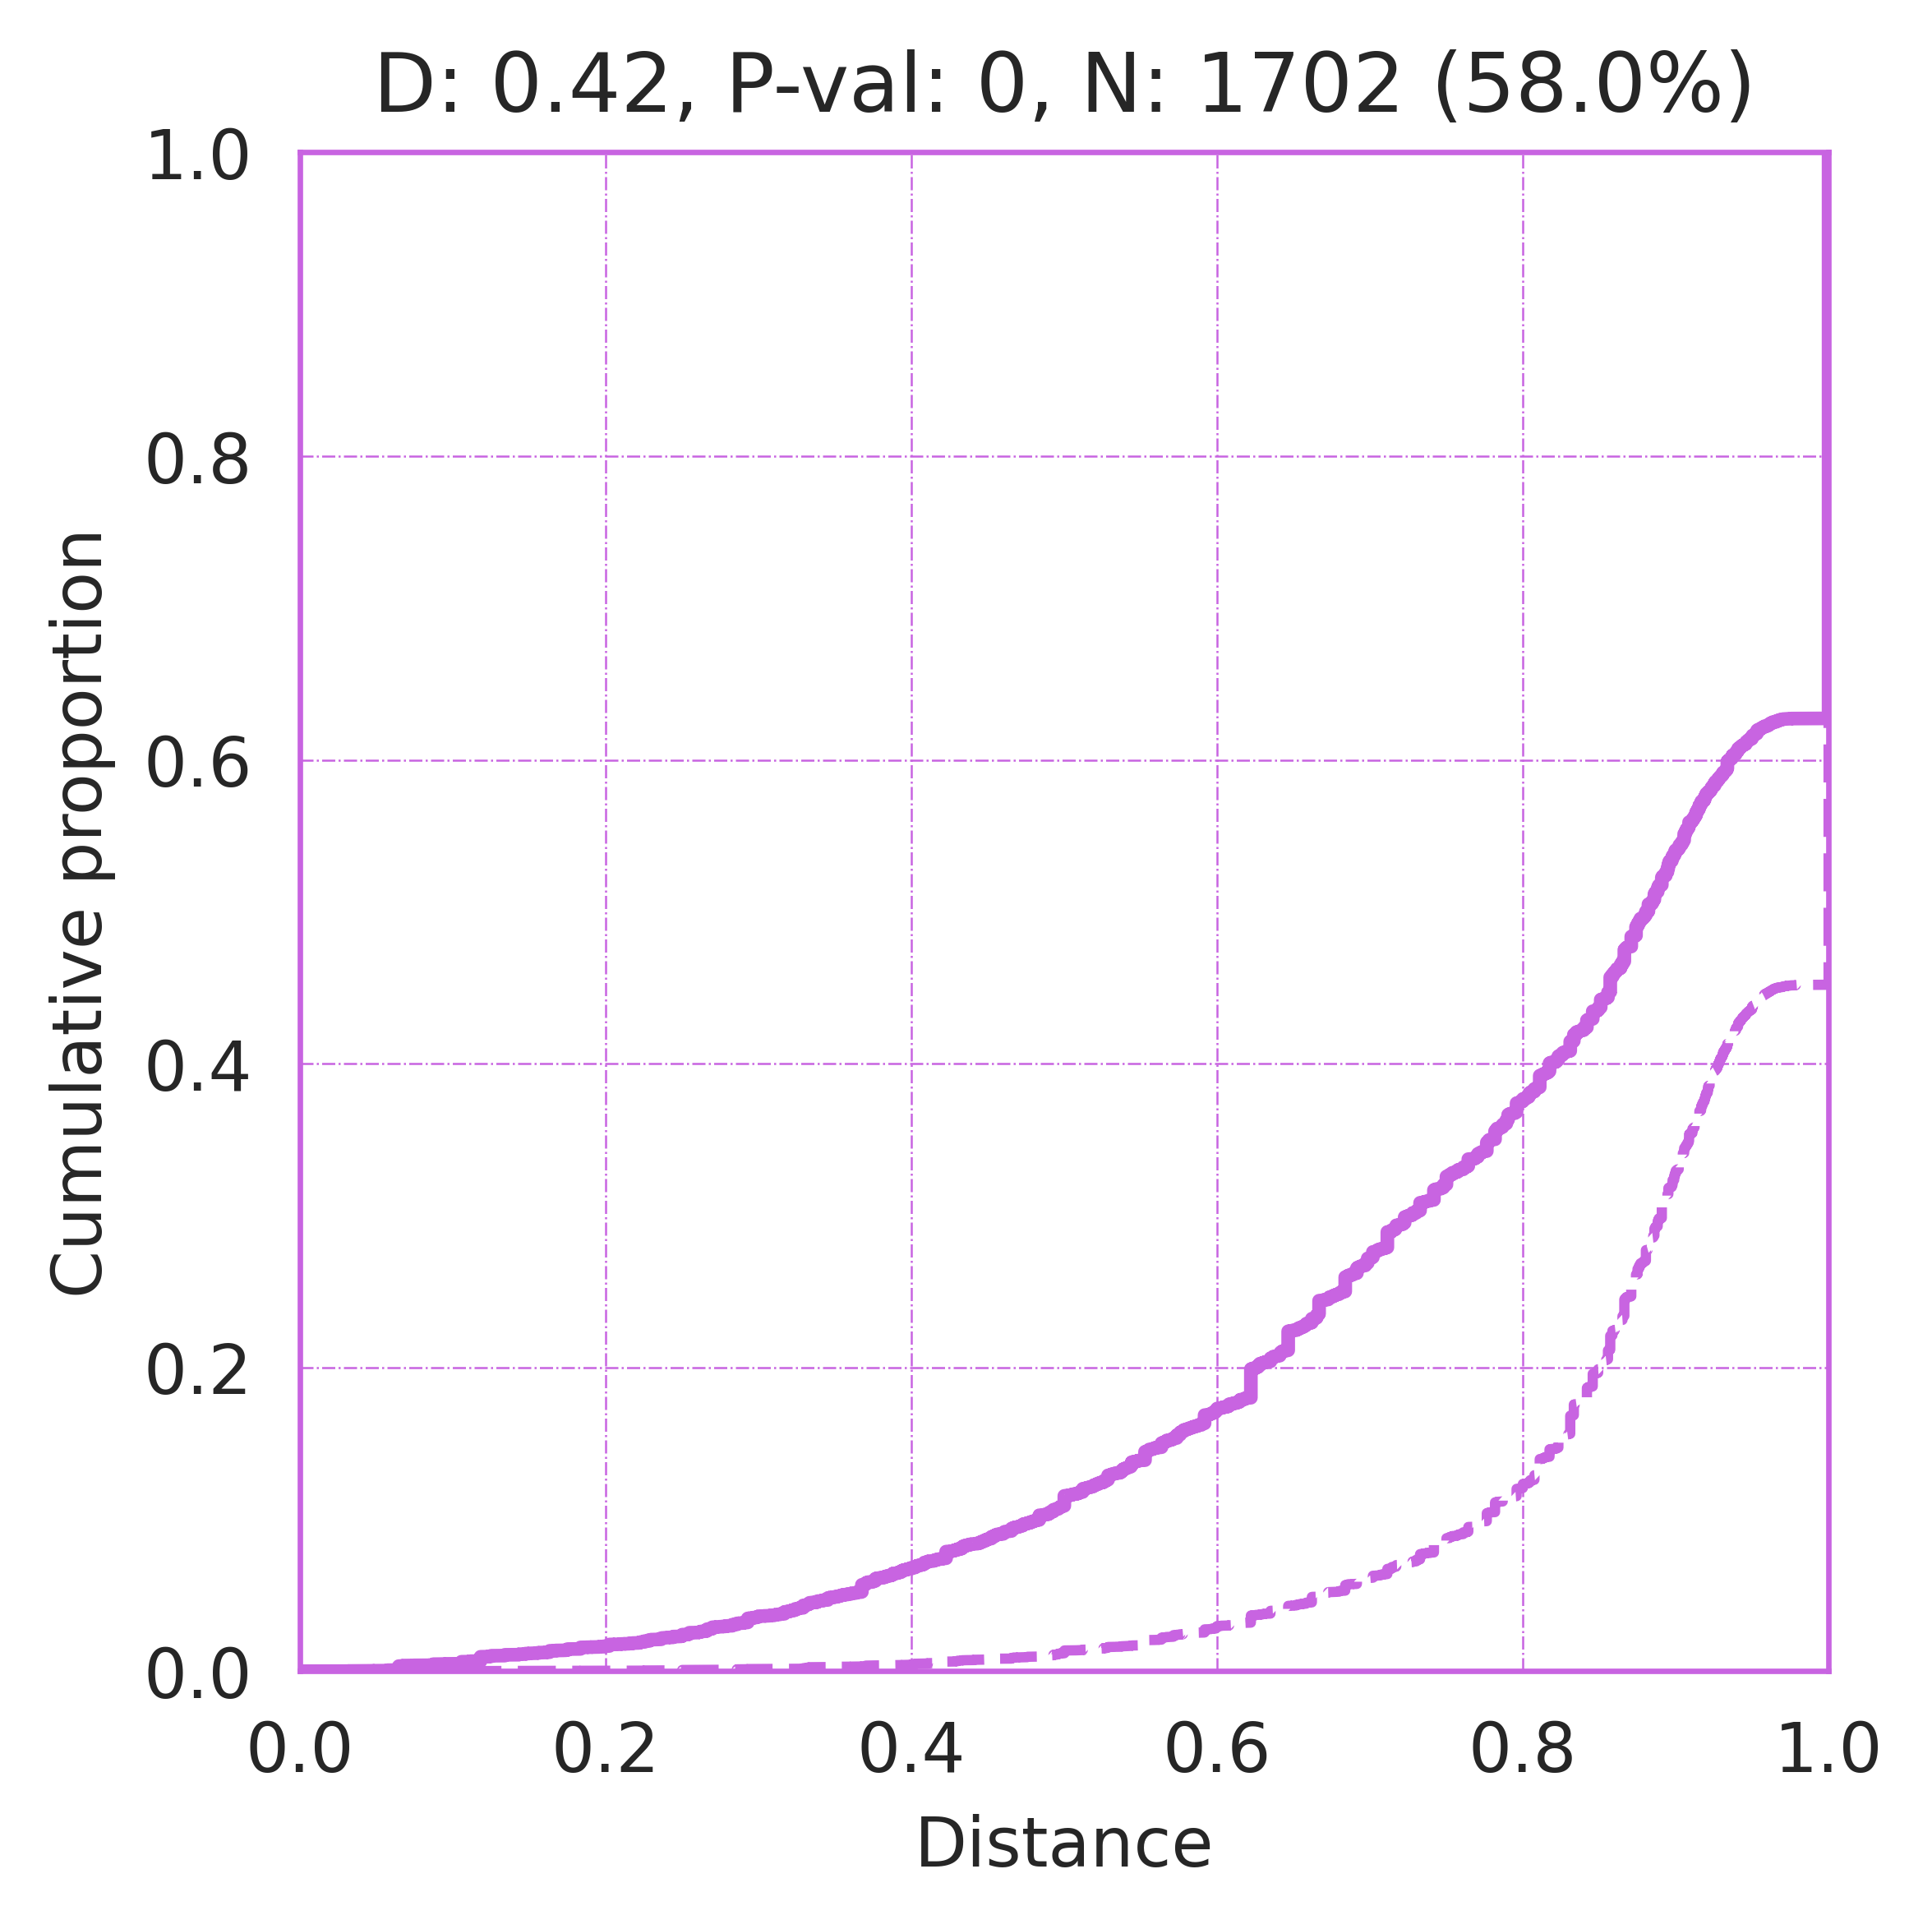

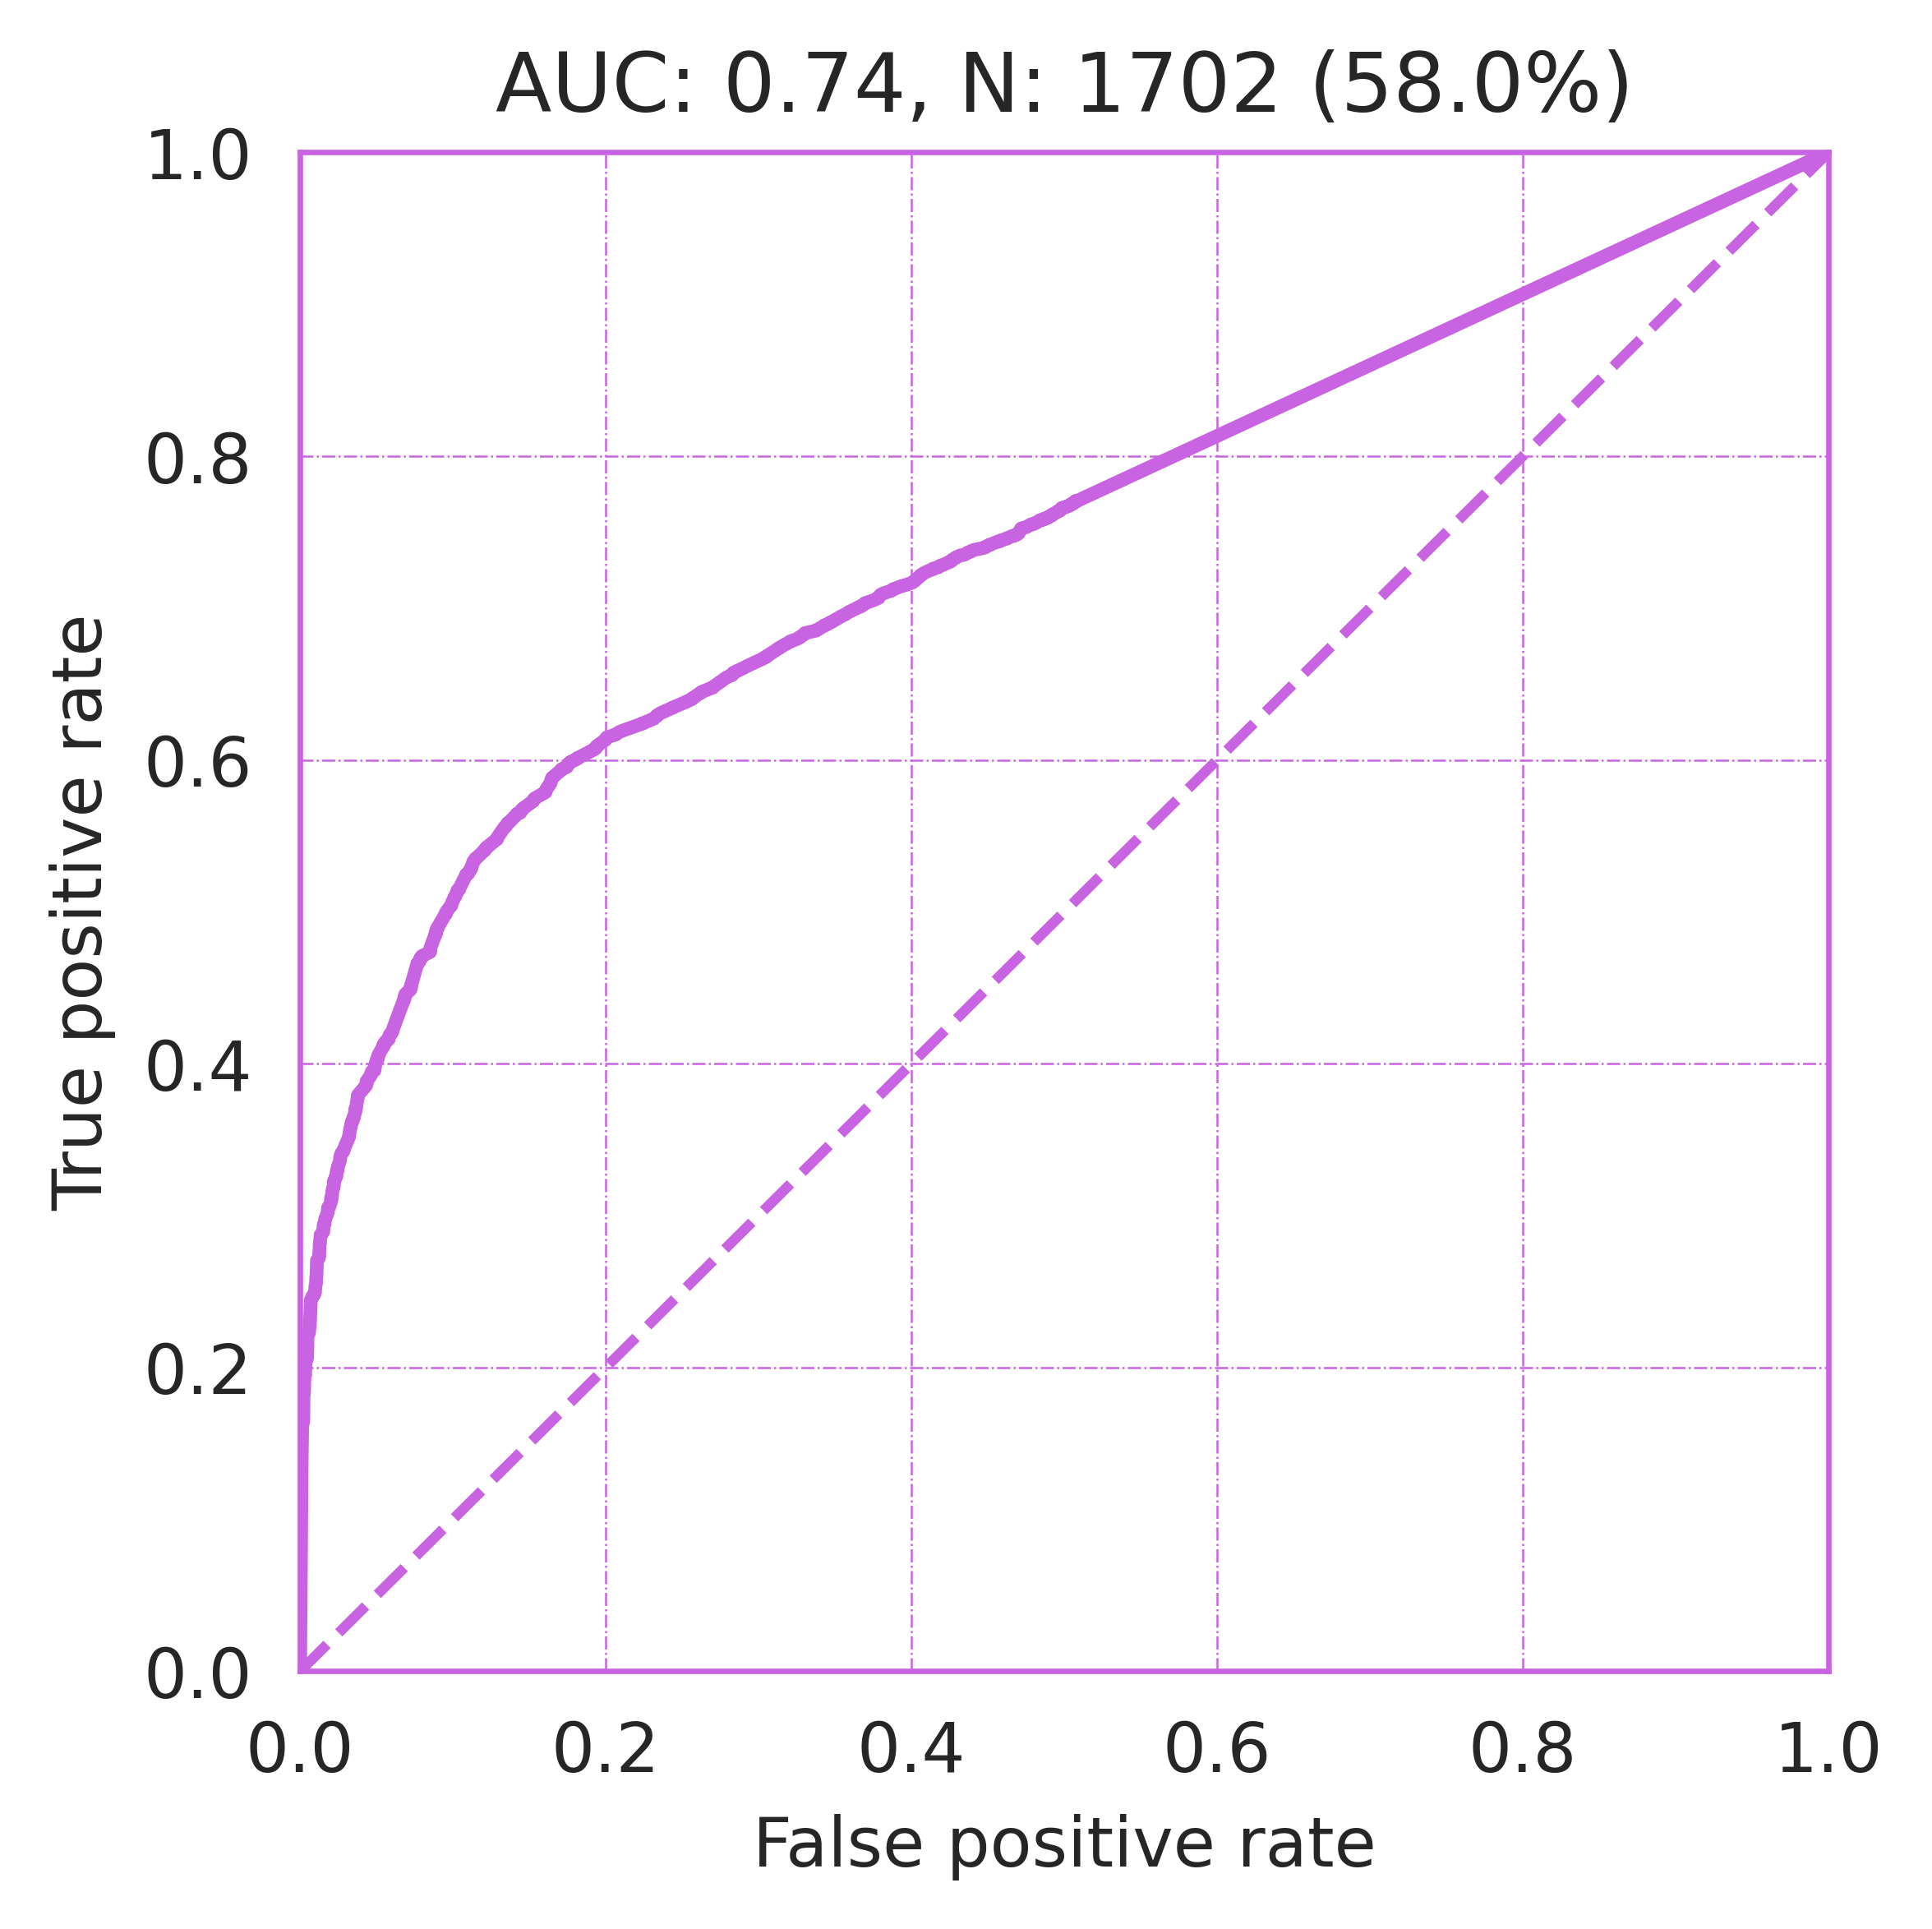

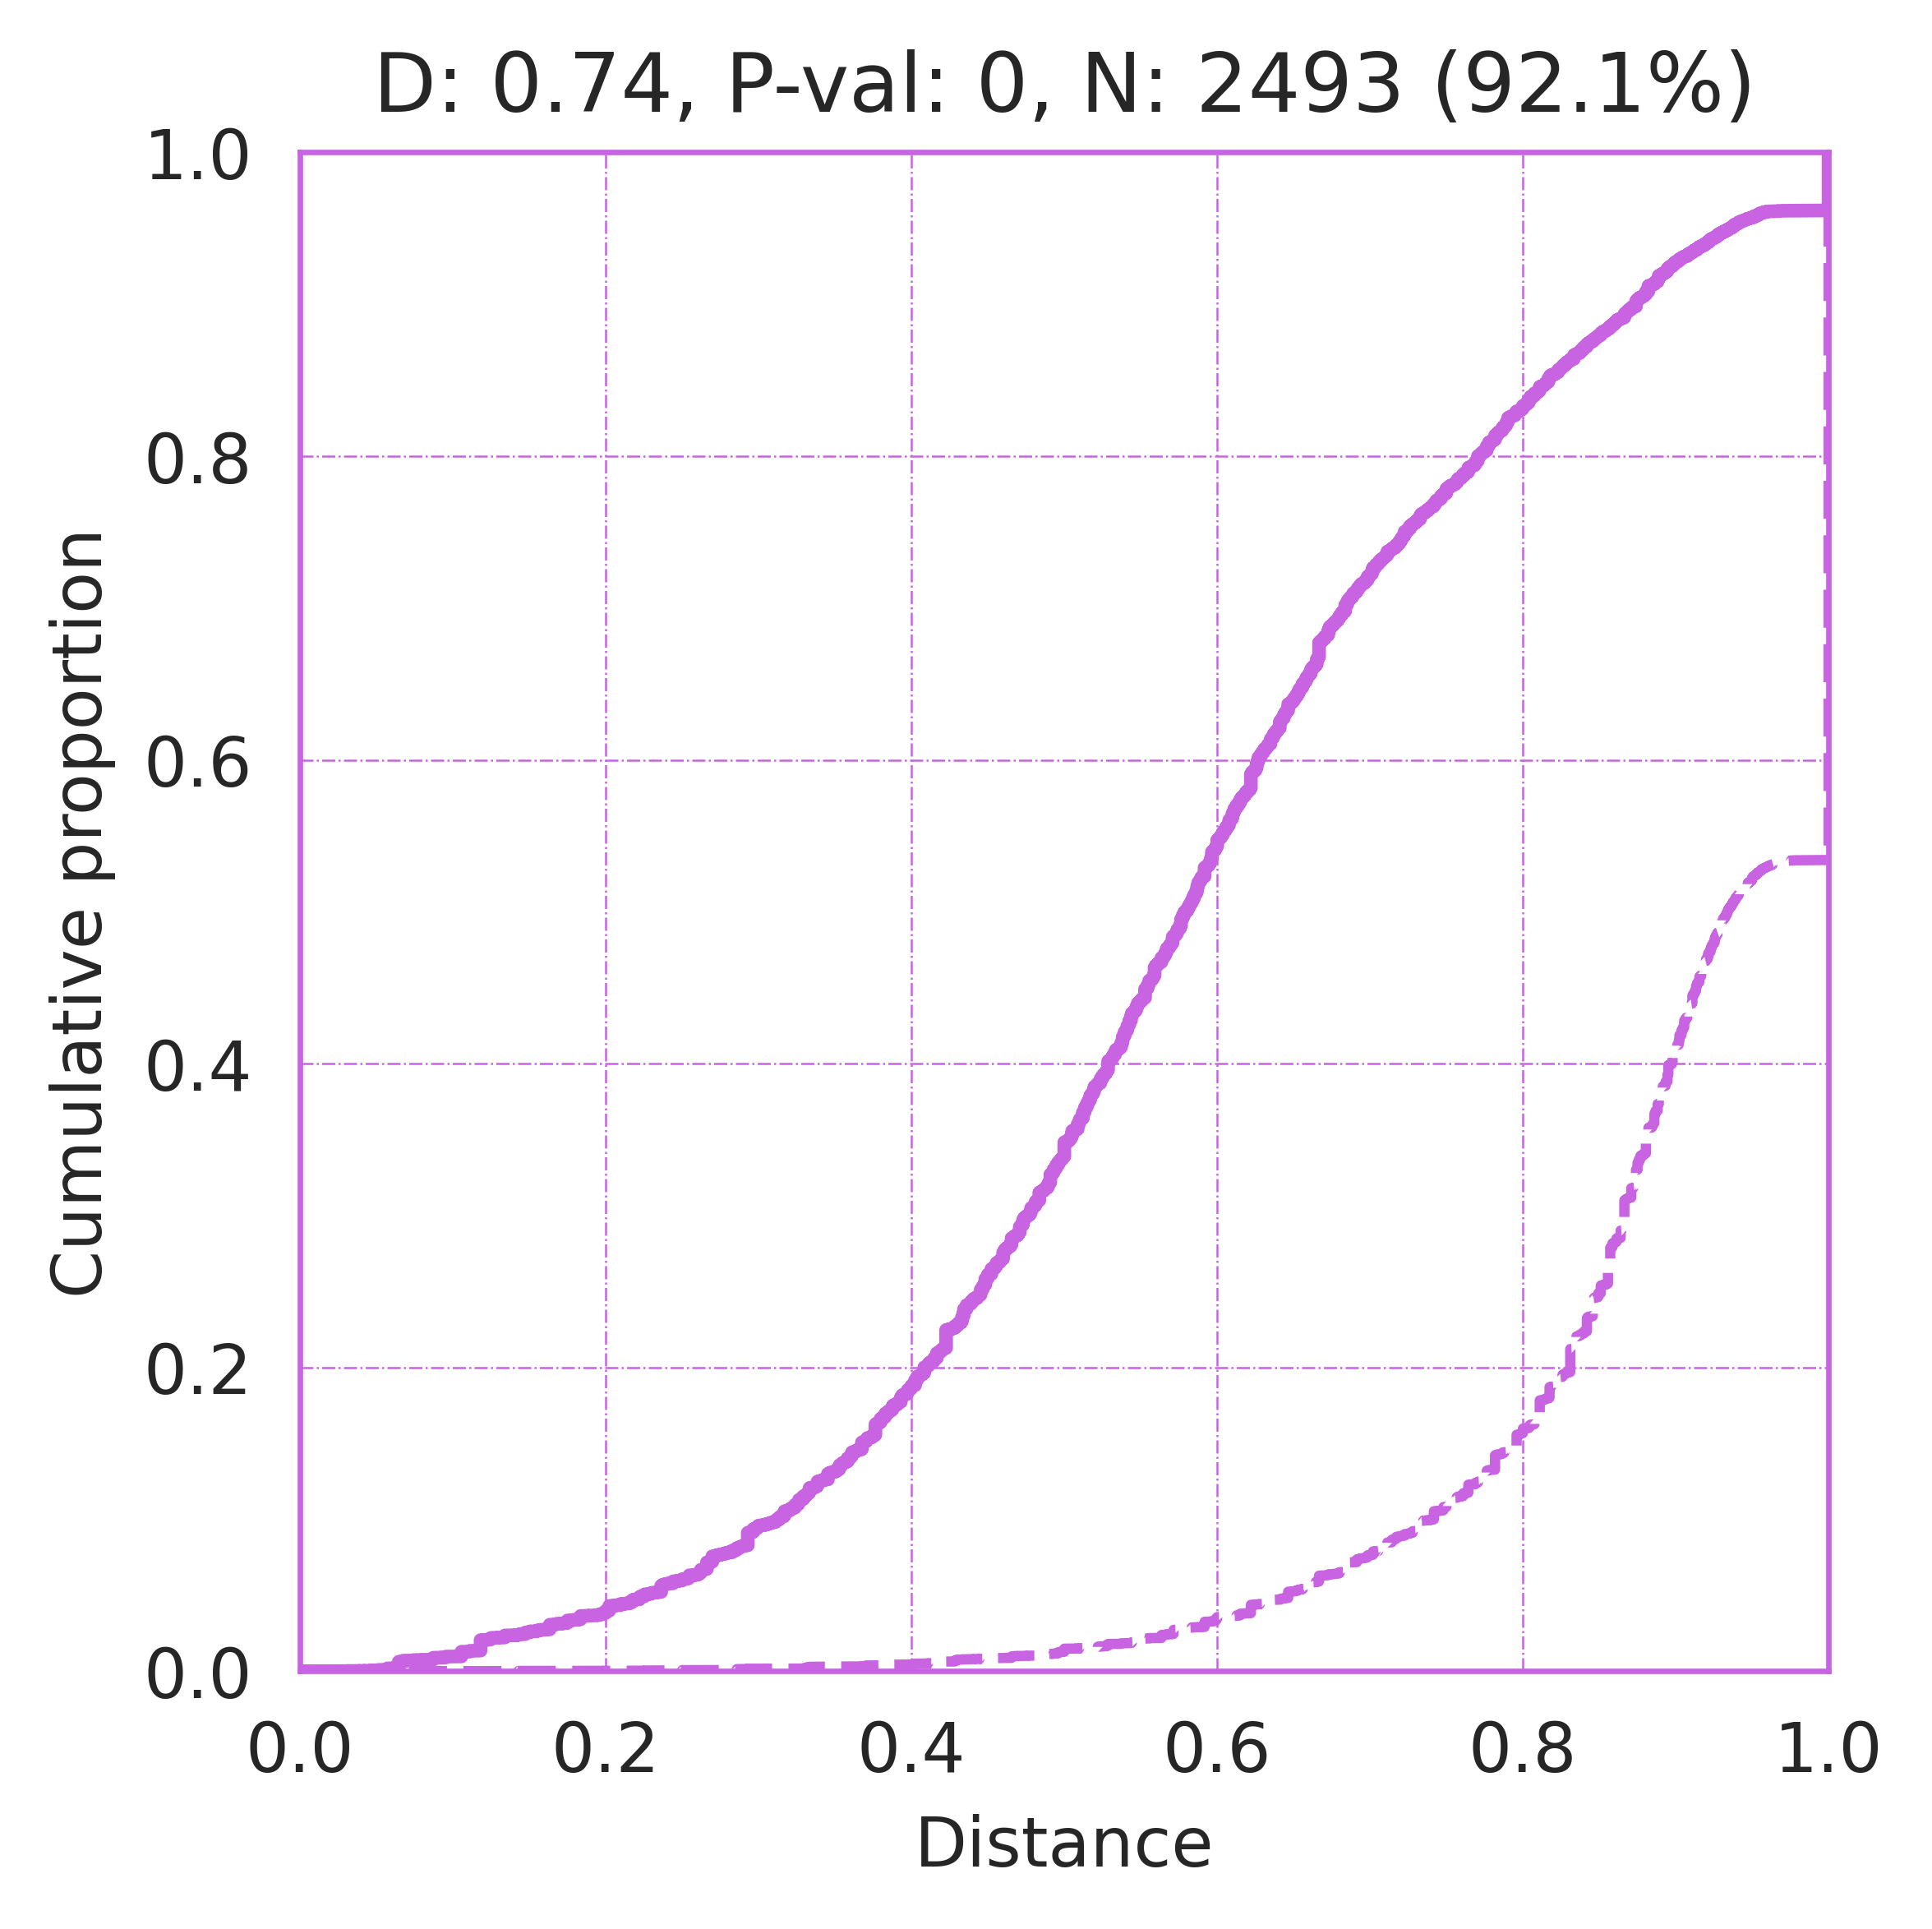

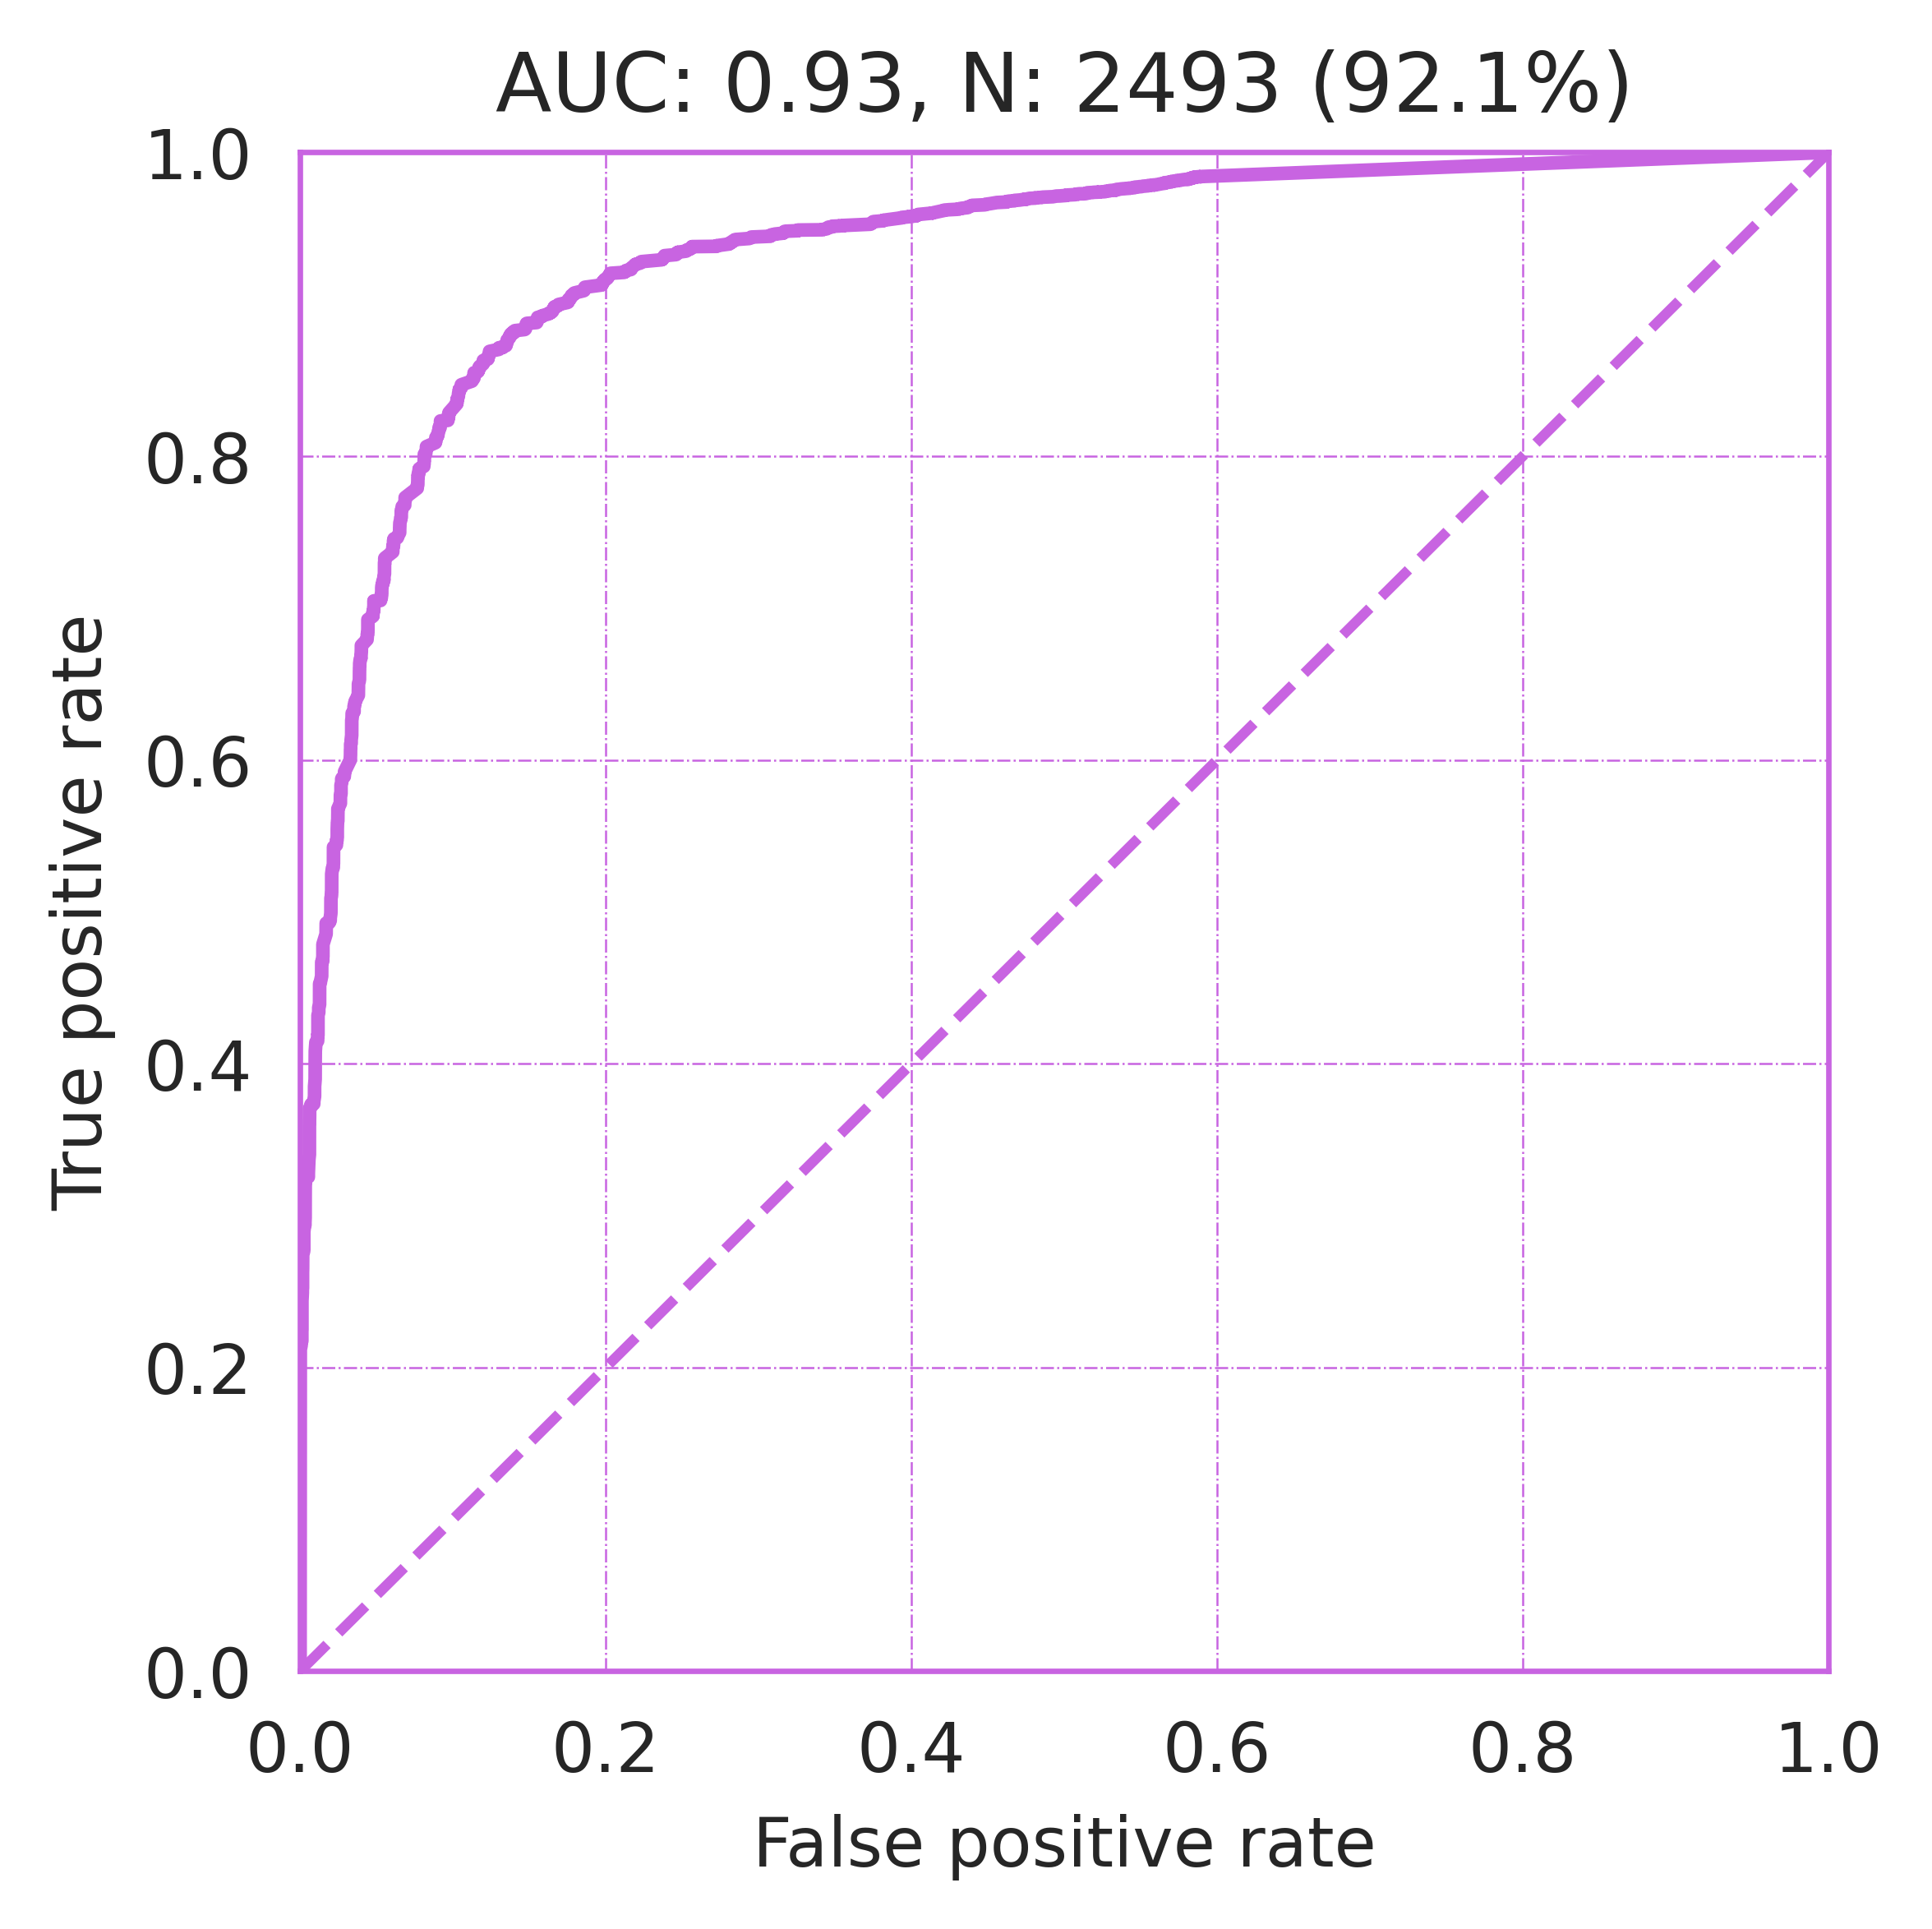

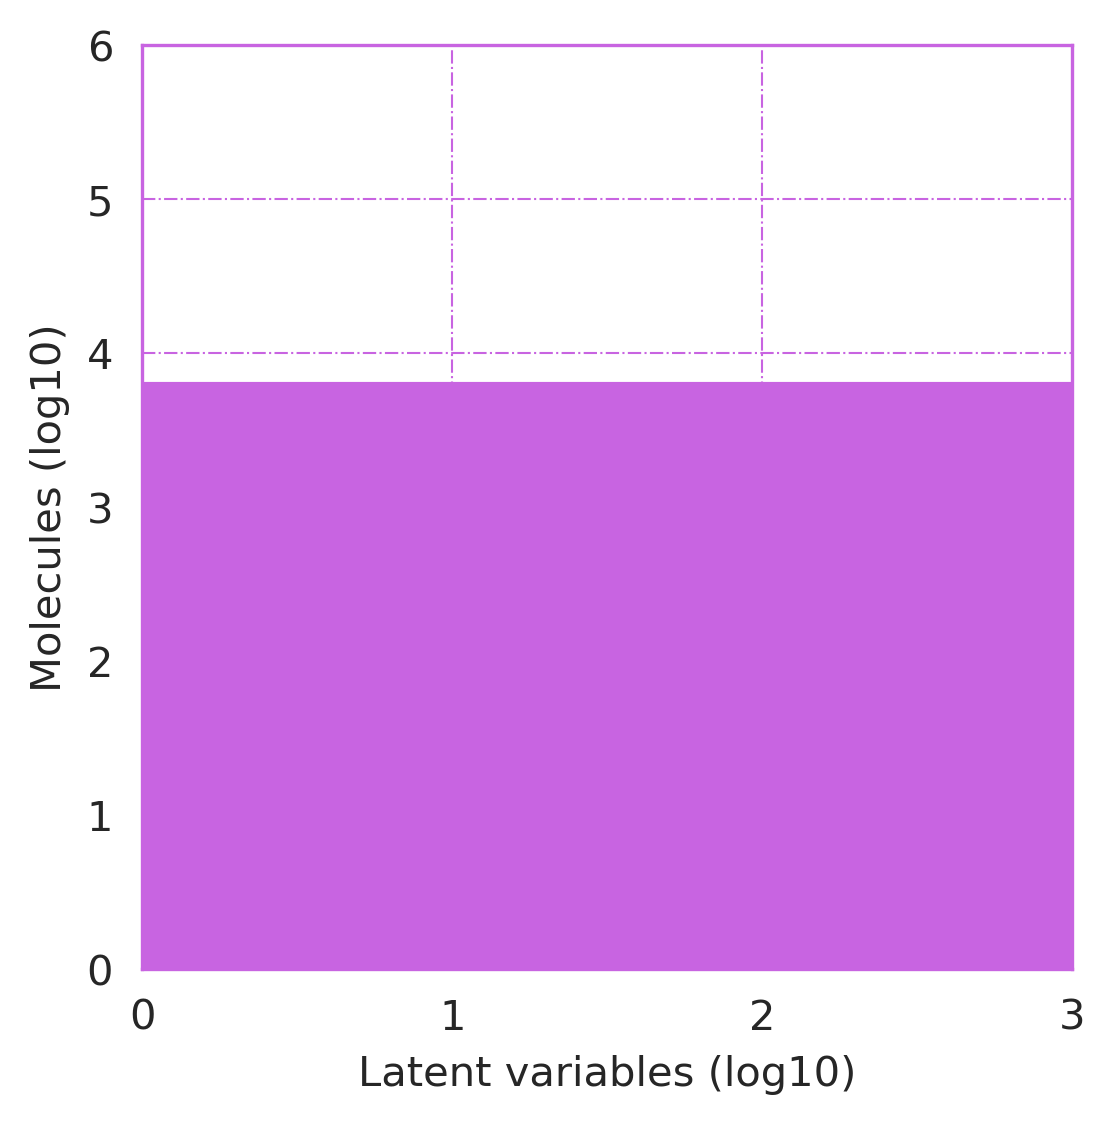

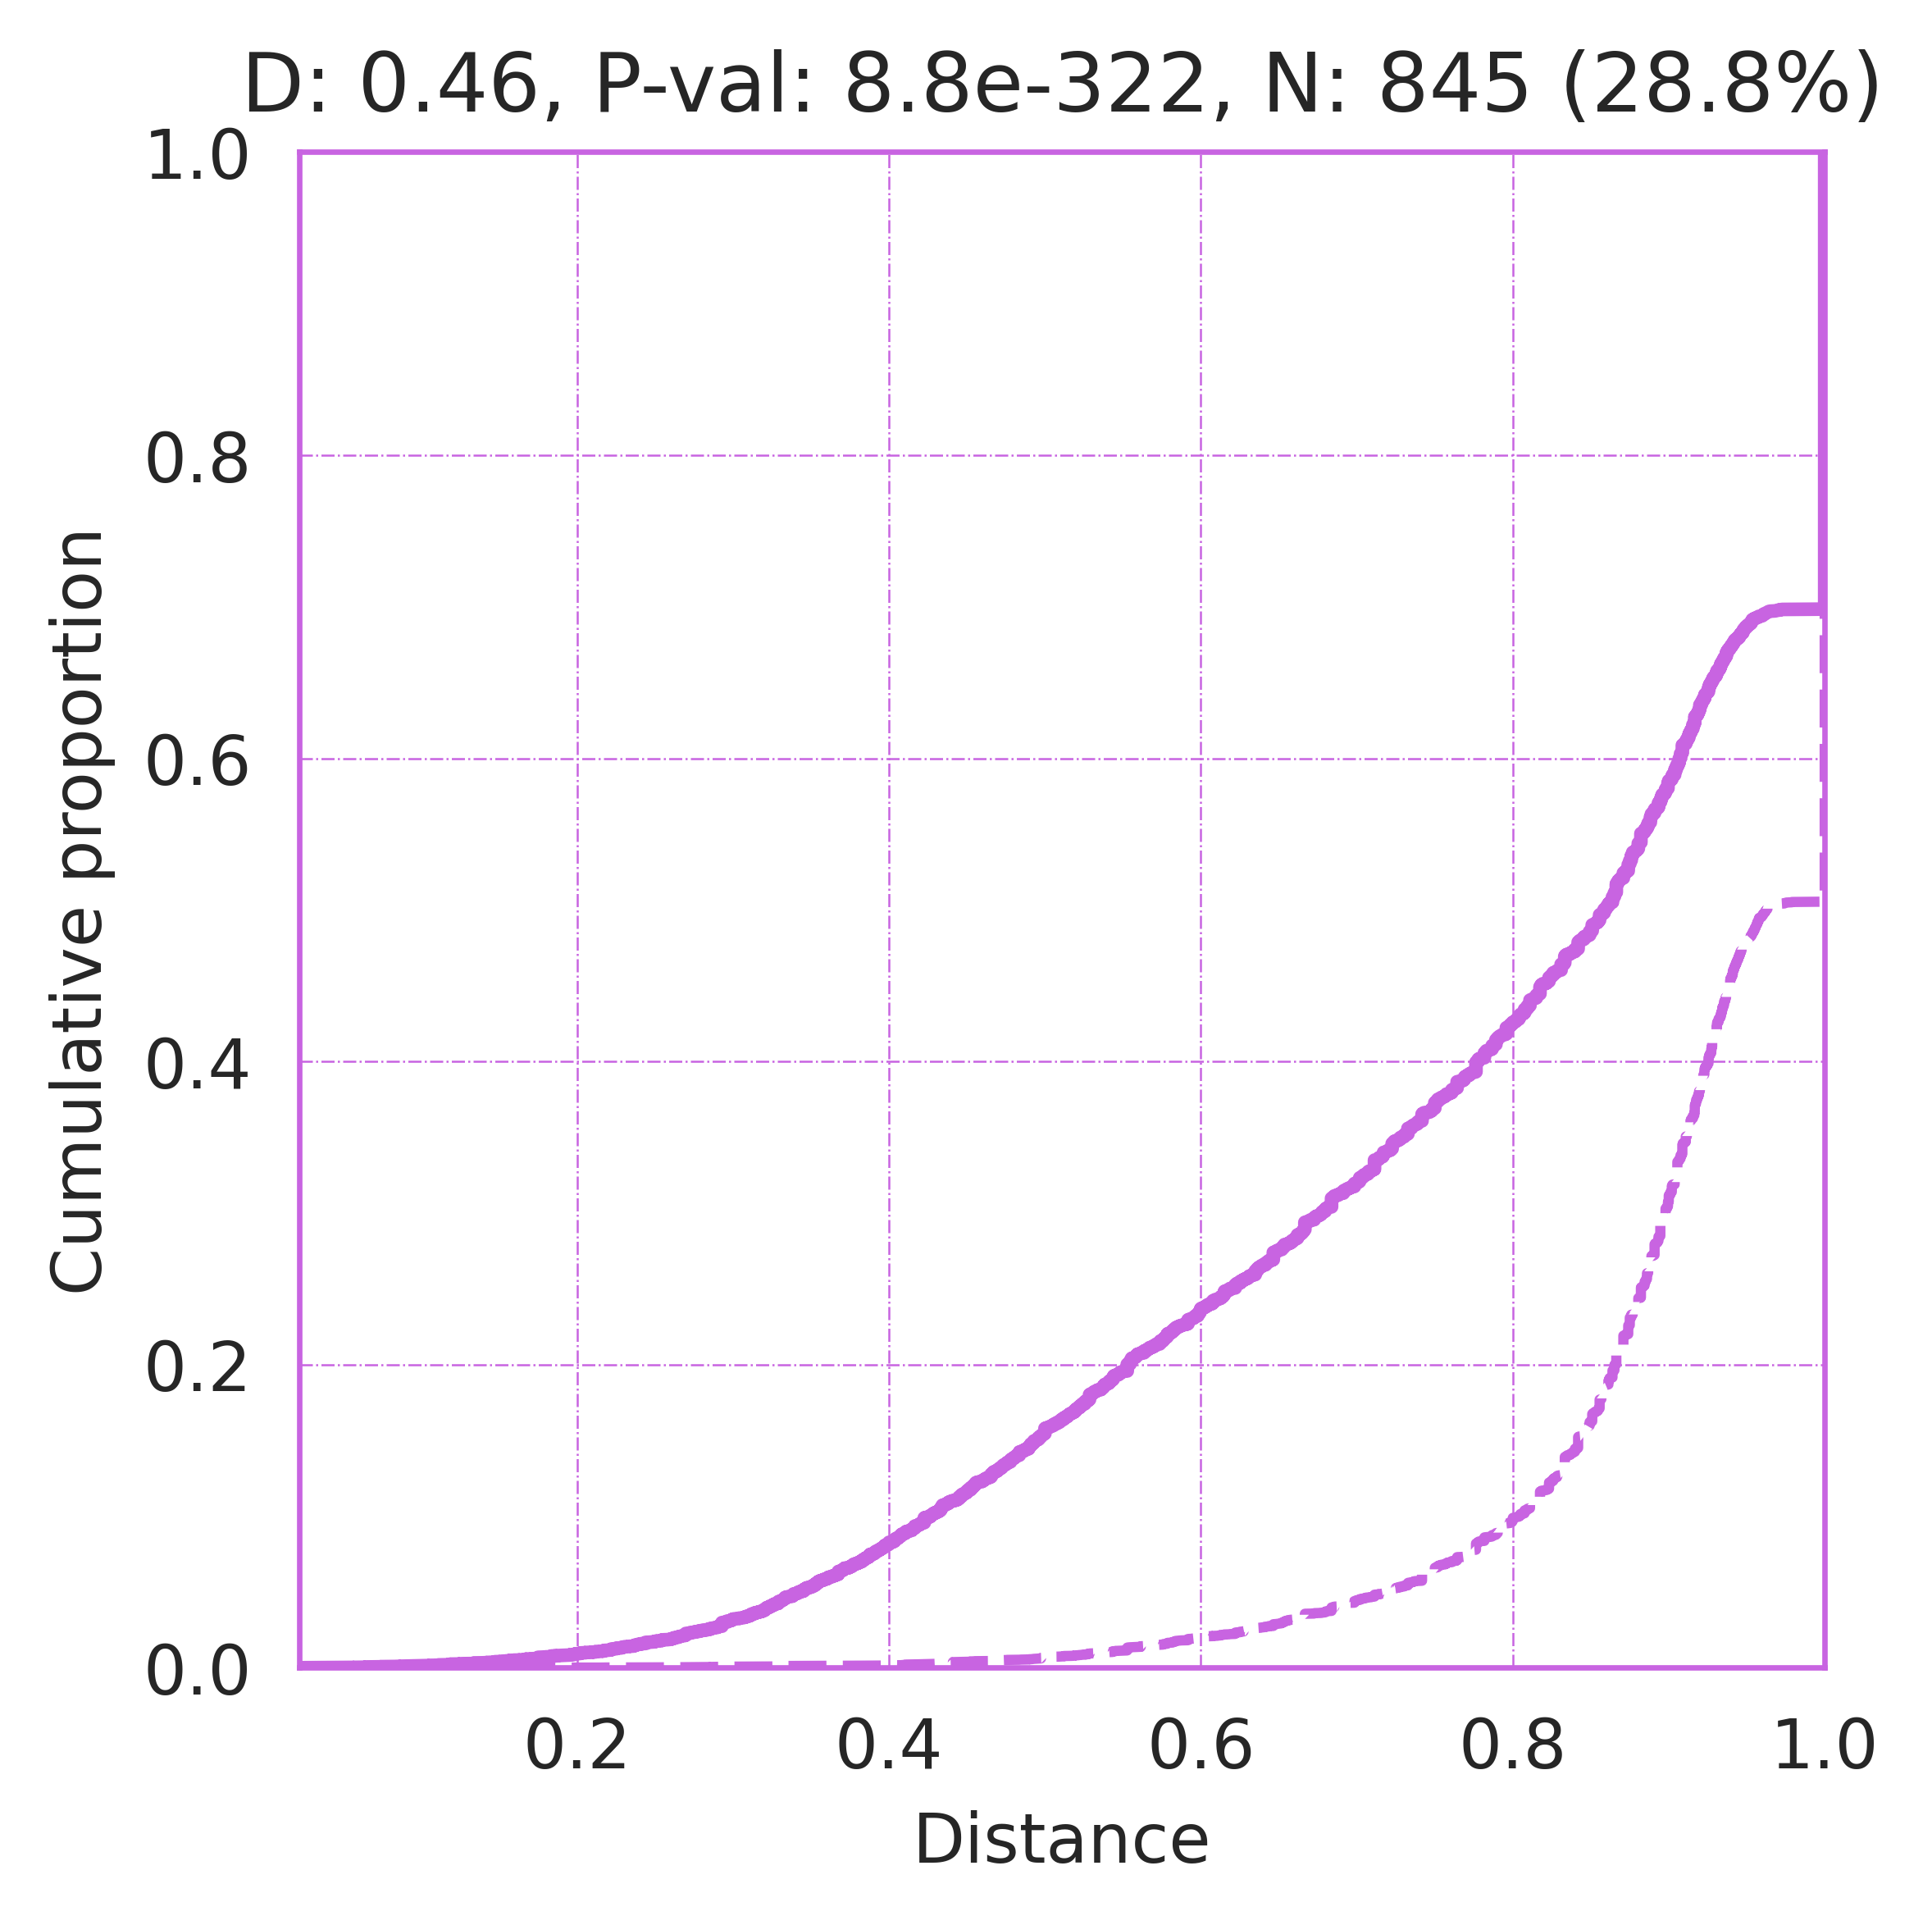

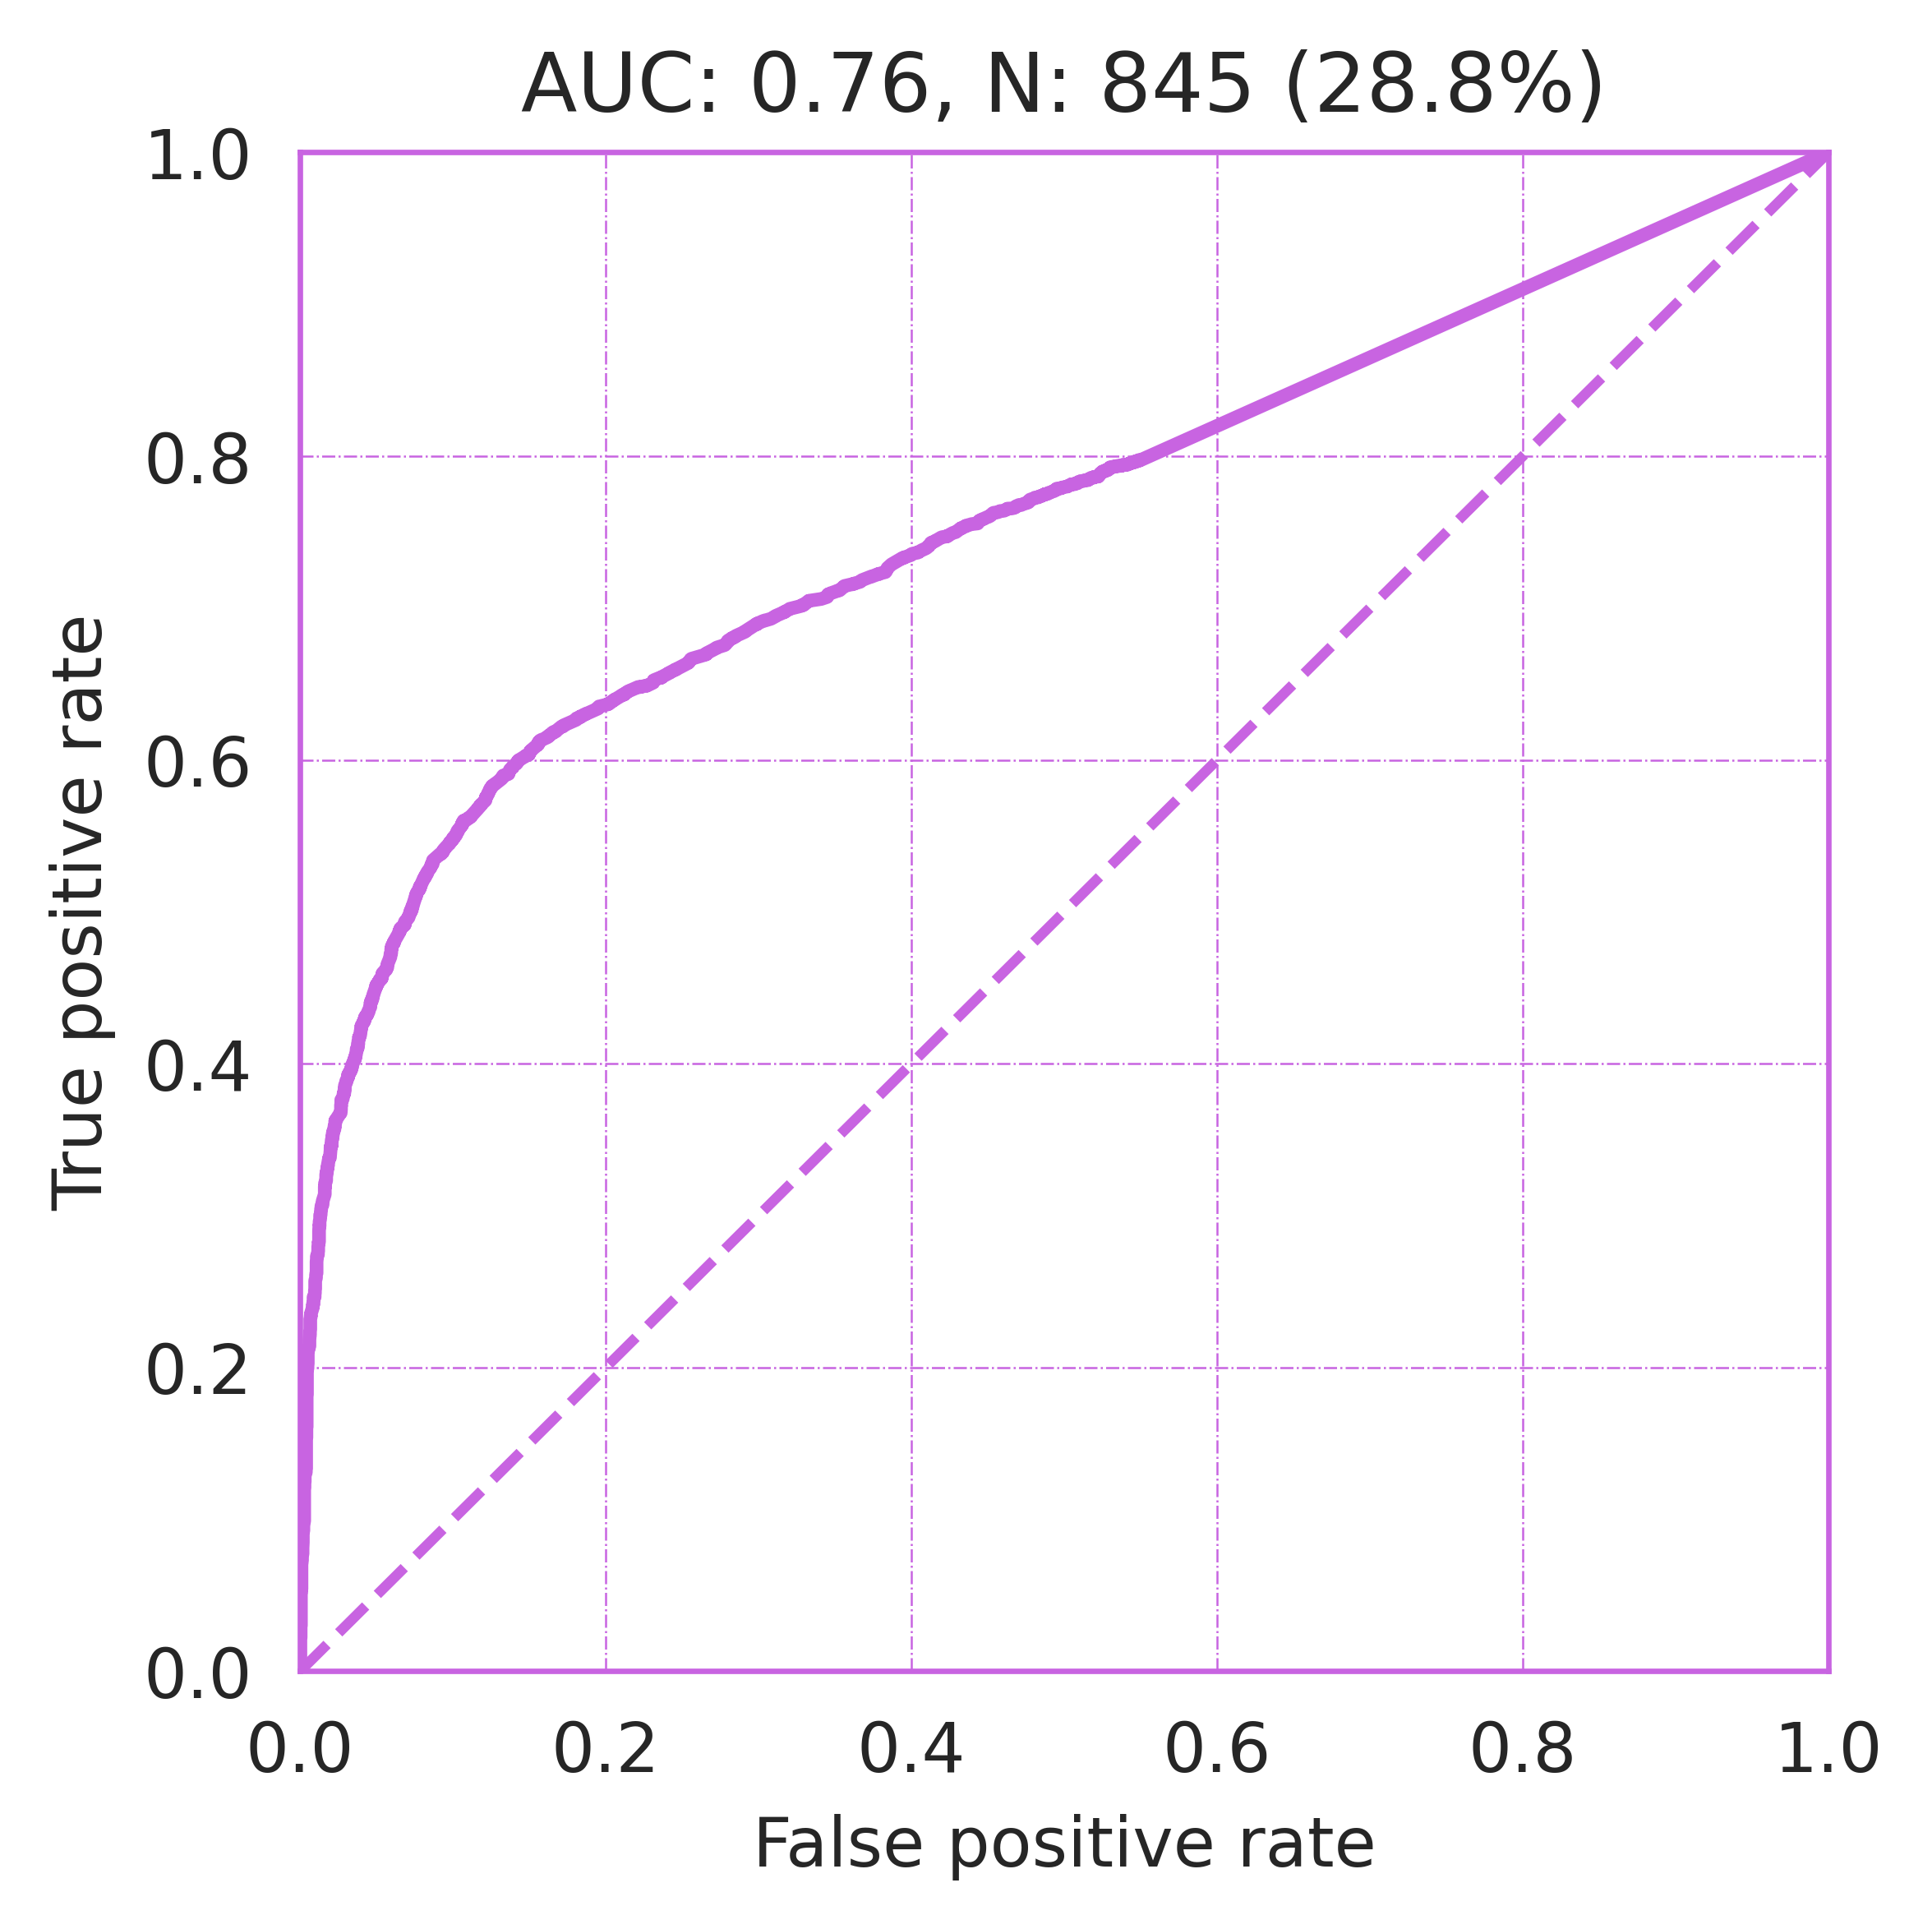

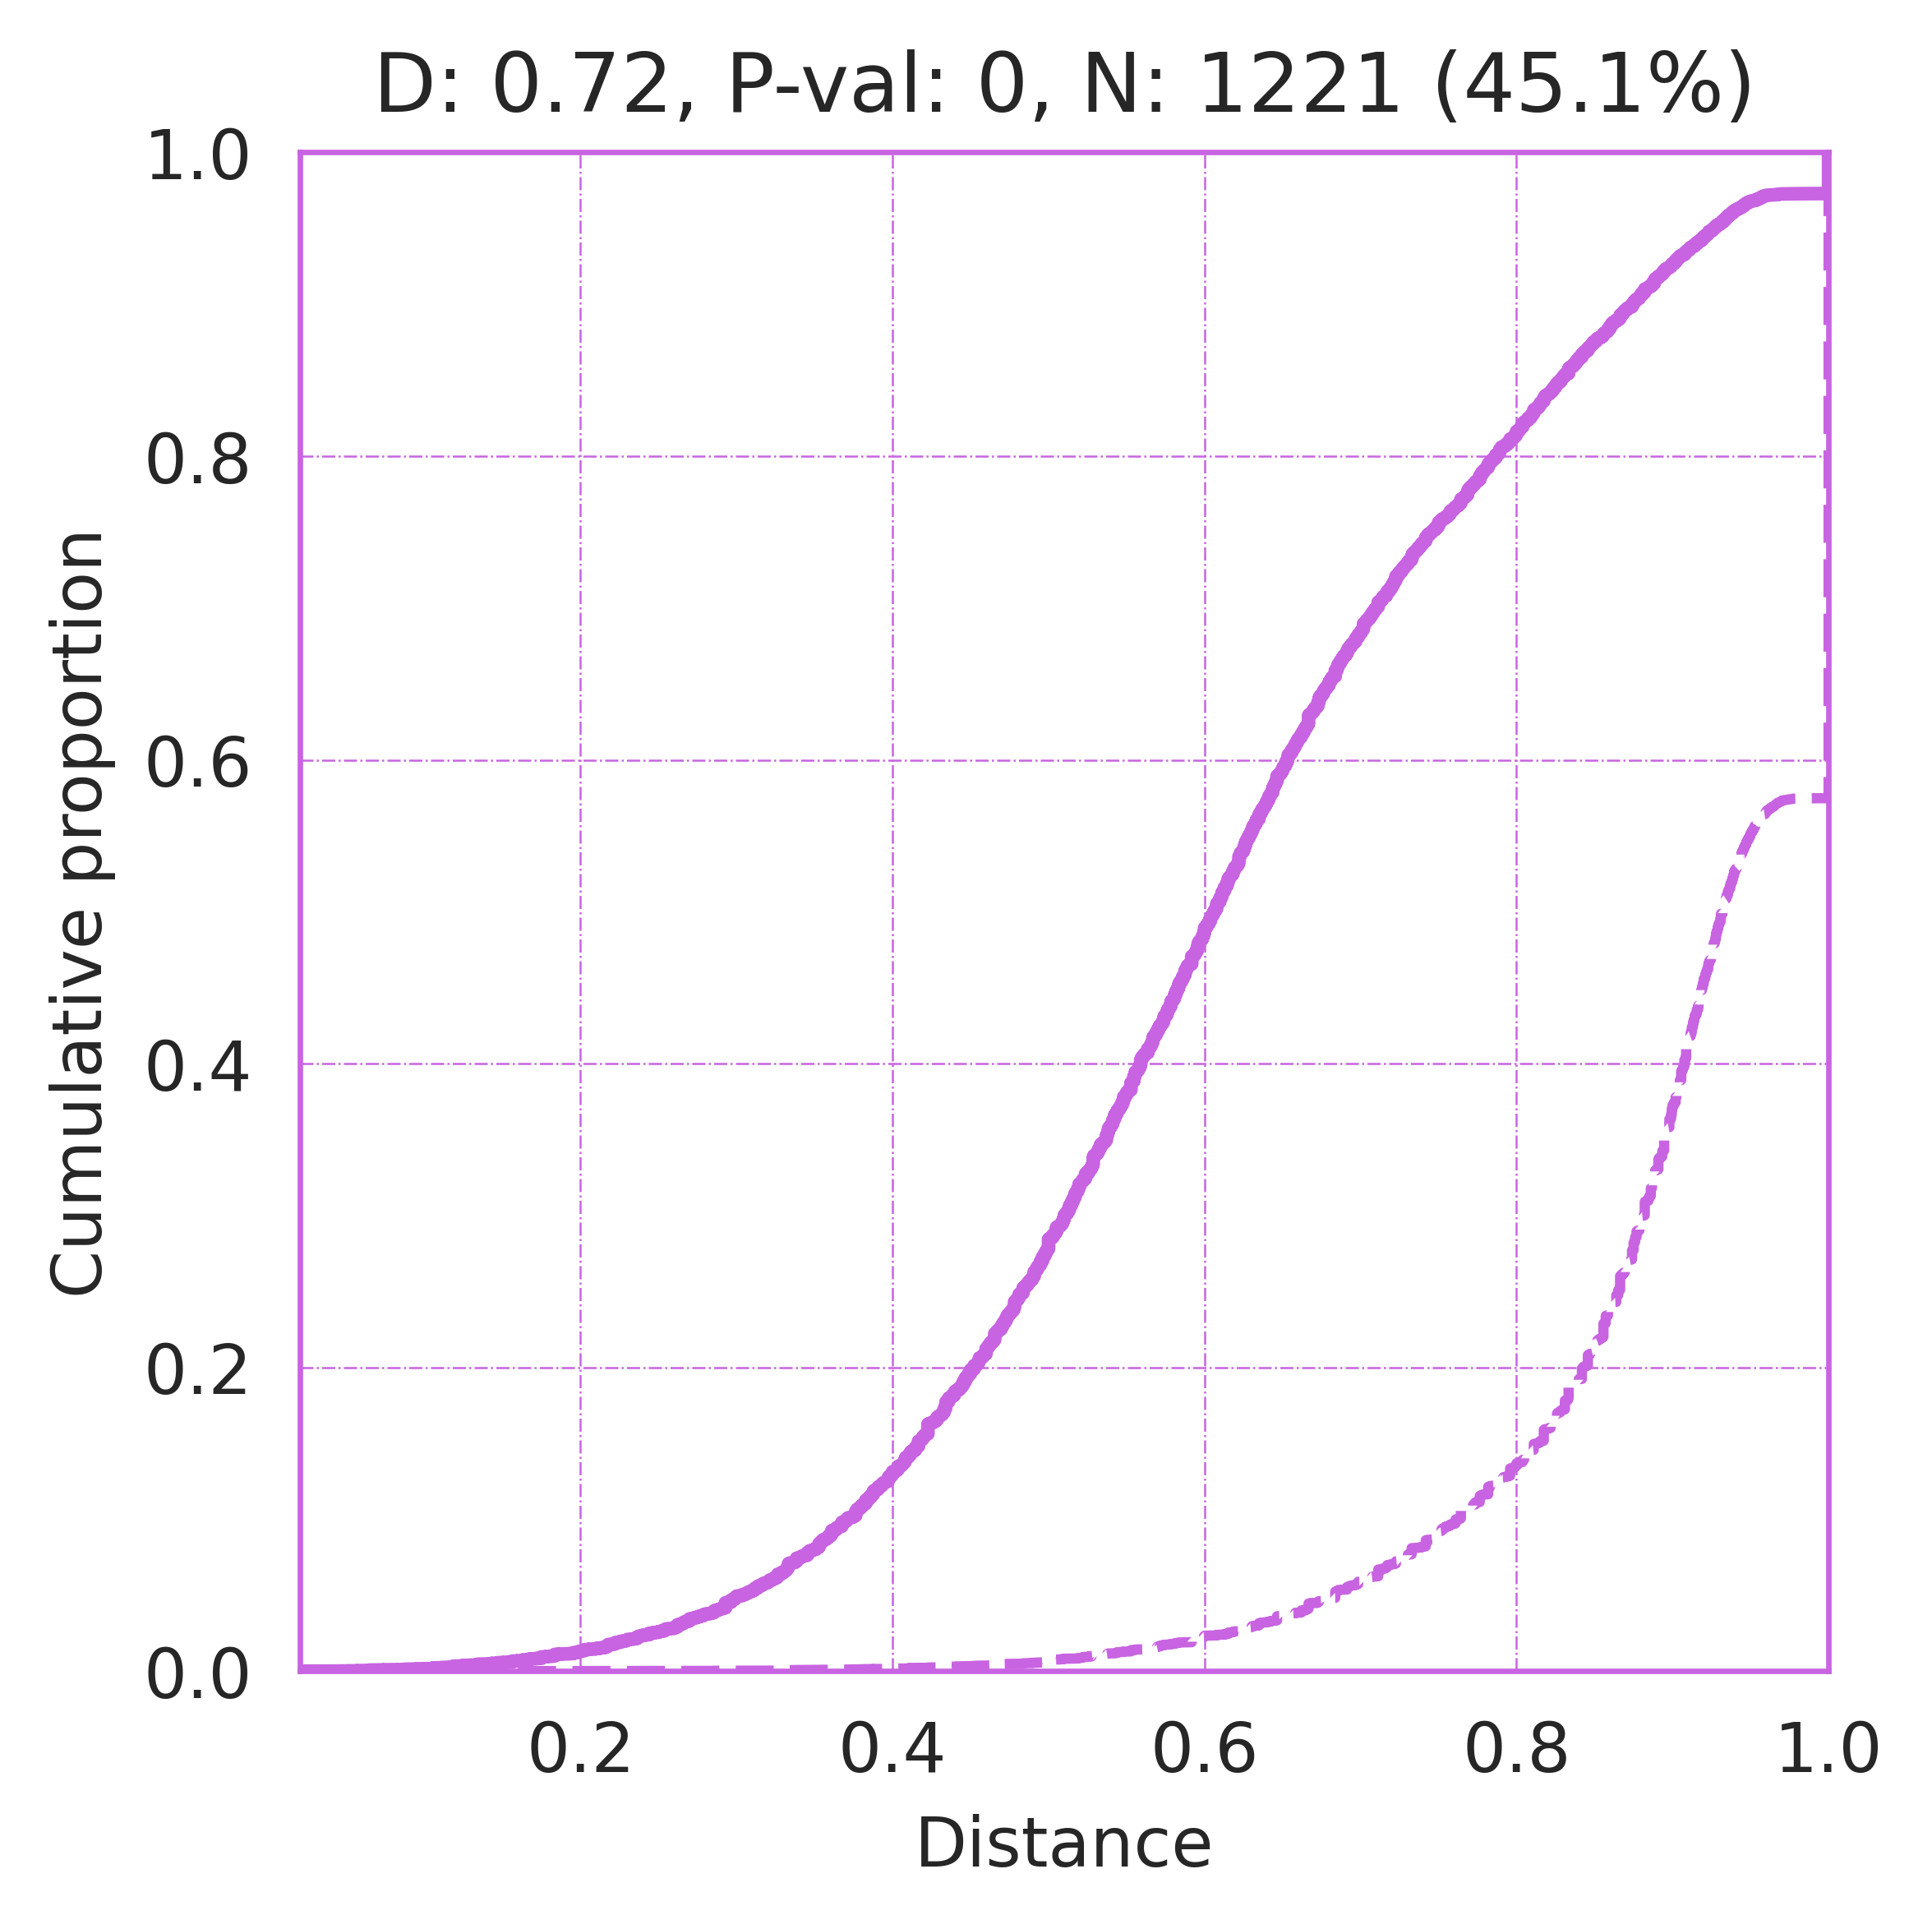

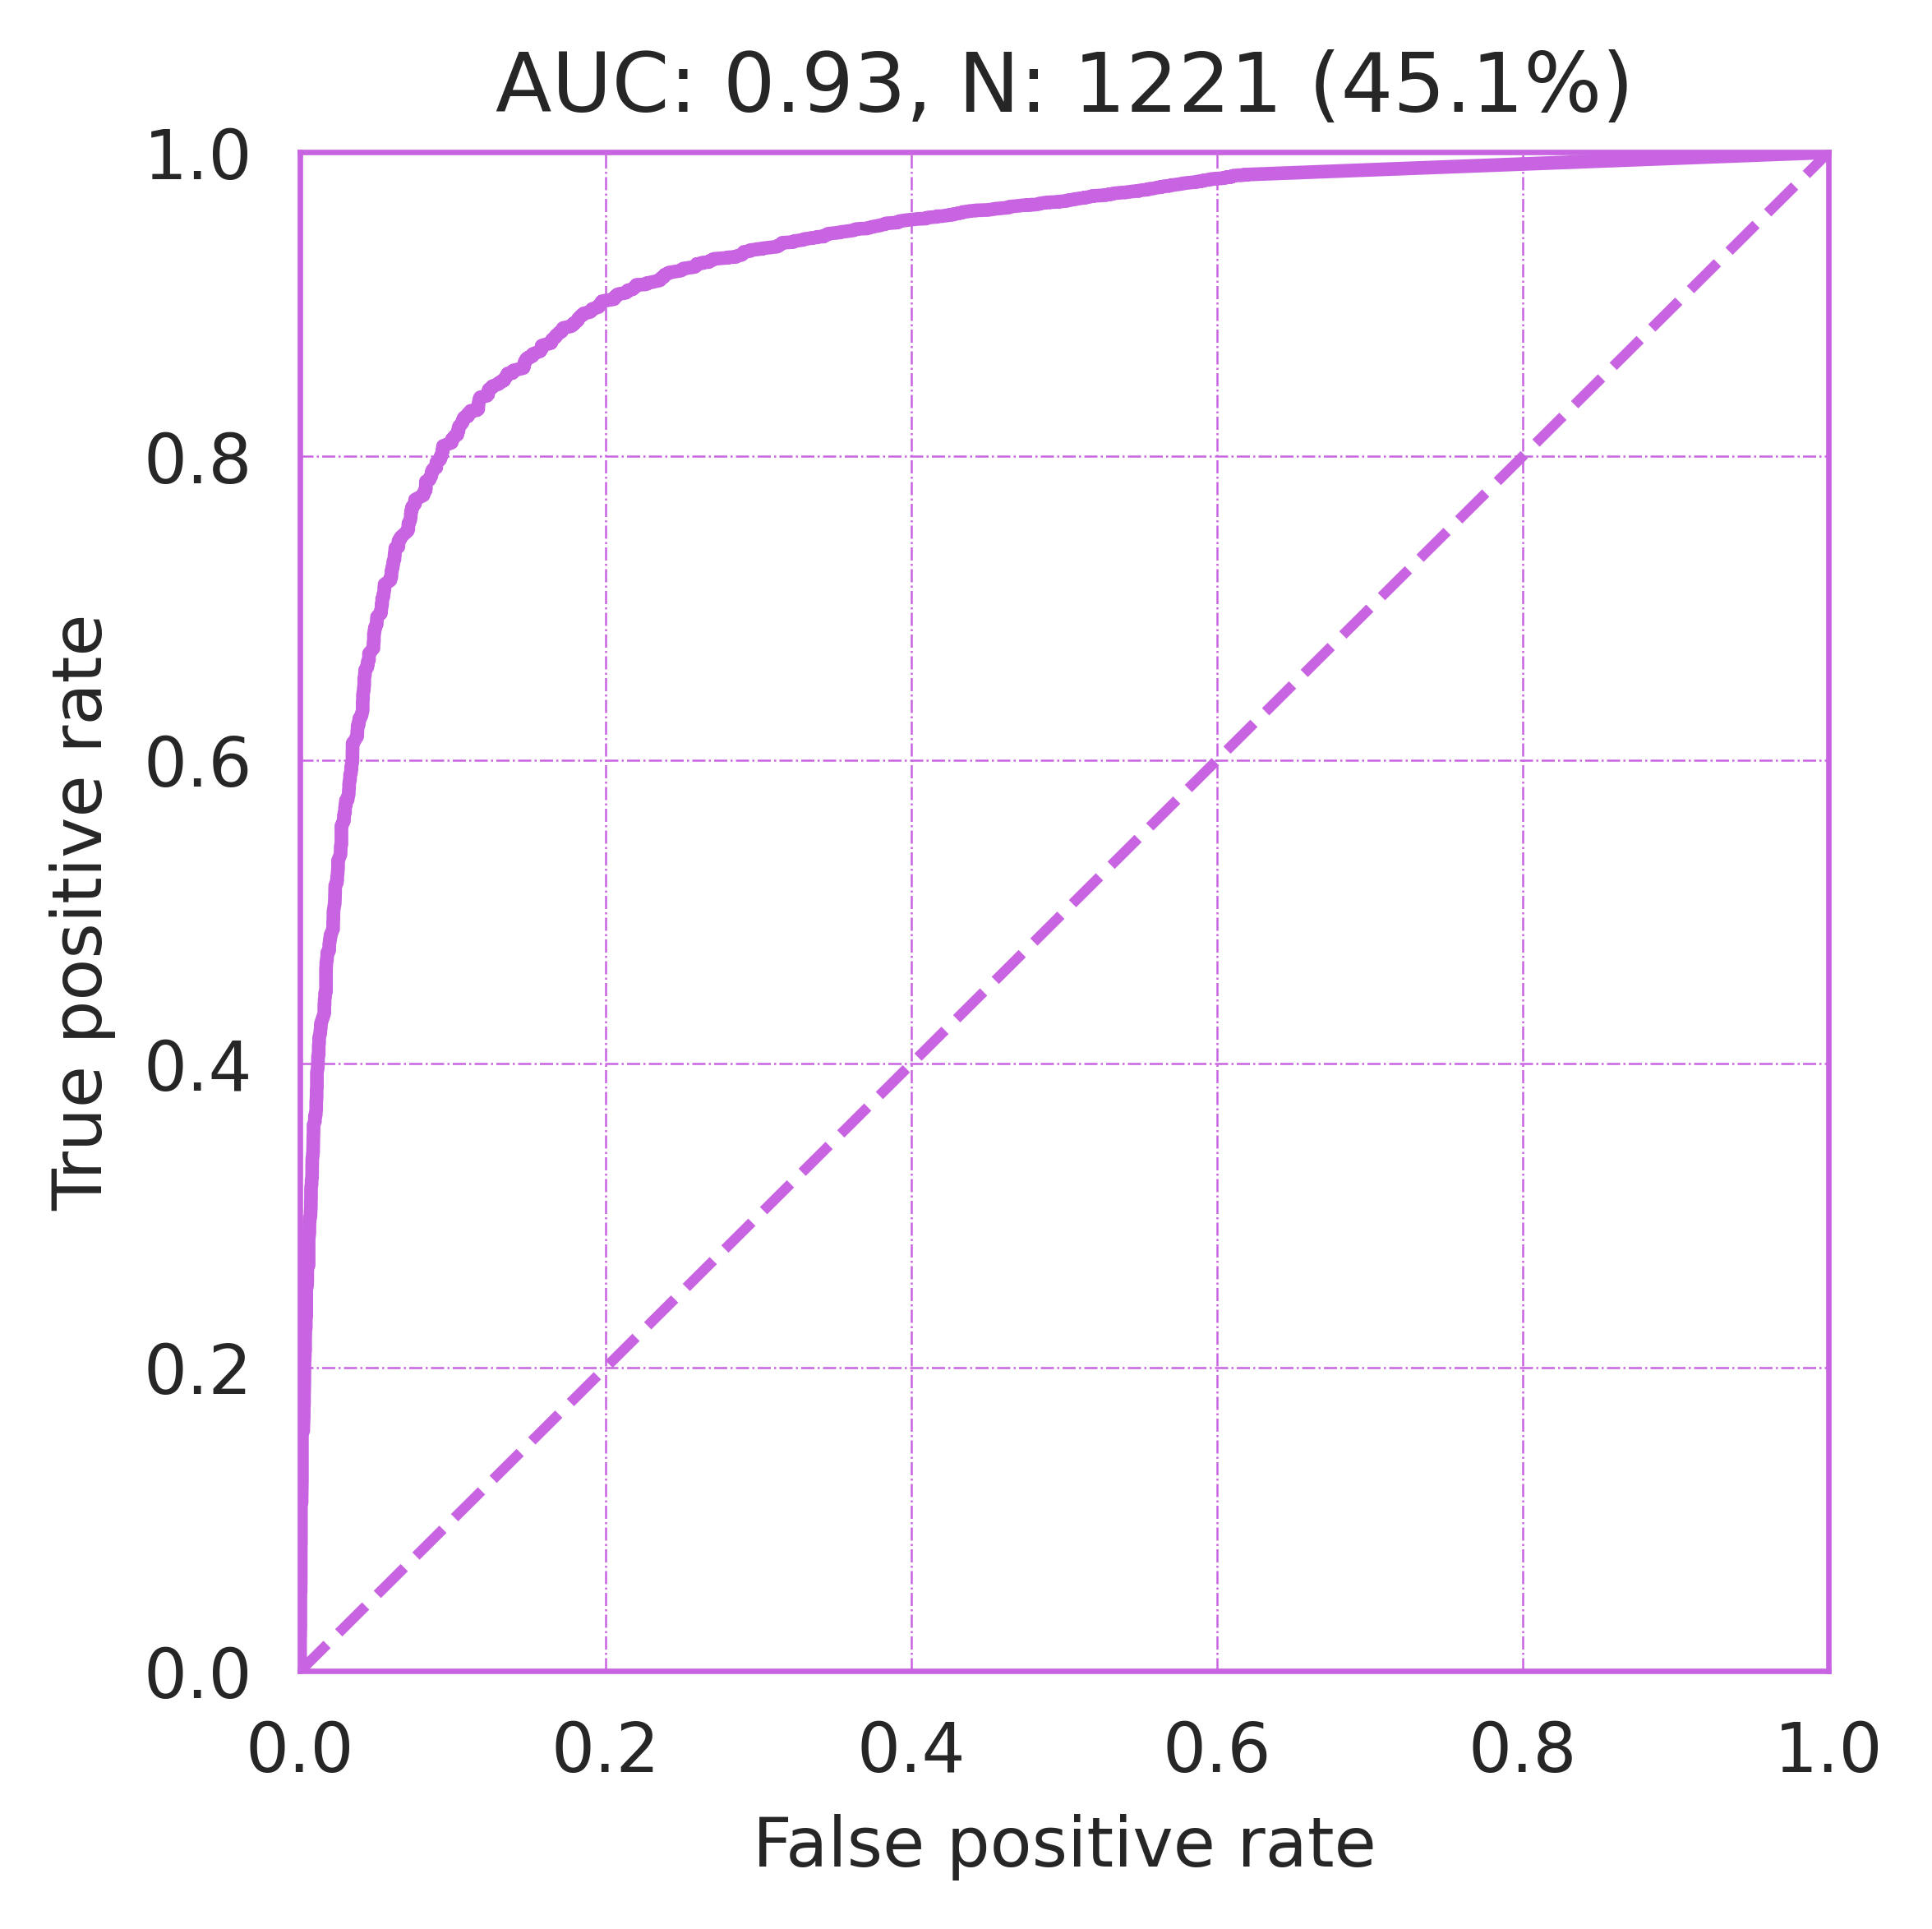

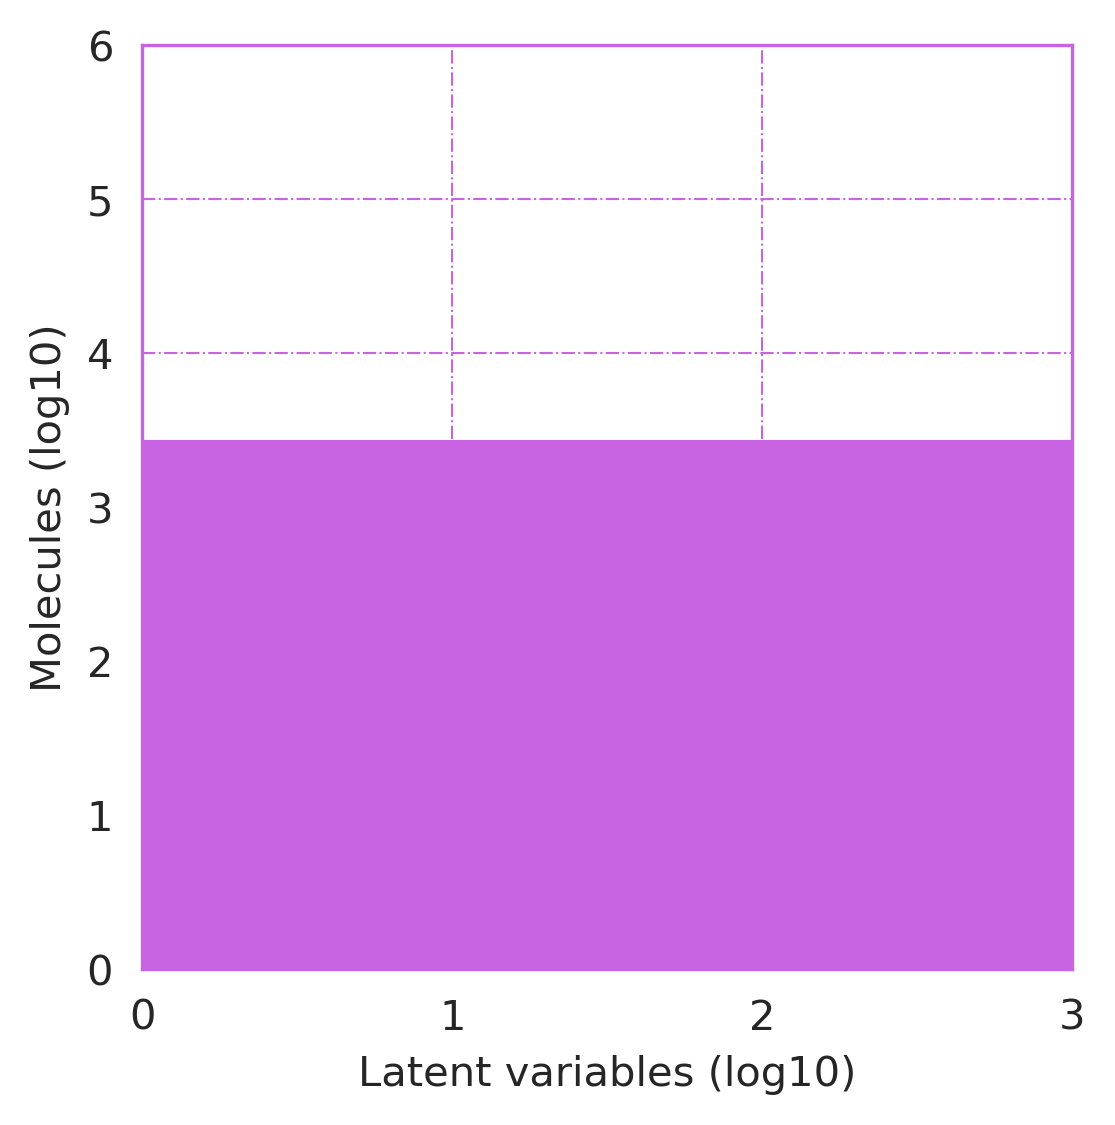

In [5]:
# Dataset Name
dataset = 'B1.002'

# Instantiation of sign0 data structures for the new space: full and reference
sign0 = cc_local.signature(dataset, 'sign0')

# Cleaning both full and reference datasets. This is crucial!
sign0.clear_all()

# Fit sign0
sign0.fit(pairs=np.array(merged_pairs))

In [6]:
sign0.shape

(6283, 1314)

2024-04-04 16:02:29,672 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign0
2024-04-04 16:02:29,677 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_B1
2024-04-04 16:02:30,938 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Computing or retrieving data for canvas medium.
2024-04-04 16:02:30,938 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Skipping the following plots: []
2024-04-04 16:02:30,939 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2024-04-04 16:02:30,952 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2024-04-04 16:02:31,024 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Full dataset sampled (n=6283)
2024-04-04 16:02:31,025 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2024-04-04 16:02:32,7

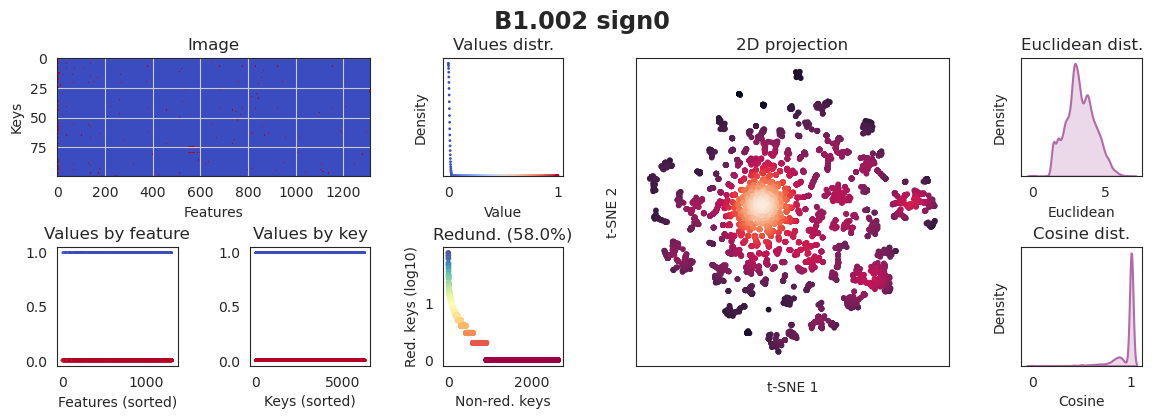

In [7]:
# Instantiation of sign0
sign0 = cc_local.signature(dataset, 'sign0')

# Instantiation of diag0 (diagnosis plots)
diag0 = sign0.diagnosis(ref_cctype='sign0')

# Plot medium & small diagnosis plots
diag0.canvas(size='medium', savefig=True, savefig_kwargs={'dpi': 300})
diag0.canvas(size='small', savefig=True, savefig_kwargs={'dpi': 300})

## sign1 ##

2024-04-04 16:18:25,615 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign0
2024-04-04 16:18:25,622 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign1
2024-04-04 16:18:25,635 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/reference/B/B1/B1.002/sign1
2024-04-04 16:18:25,651 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/acomajuncosa/Protocols/local_CC_B1/reference/B/B1/B1.002/sign1
2024-04-04 16:18:25,682 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign1
2024-04-04 16:18:25,683 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Clearing signature /aloy/home/acomajuncosa/Proto

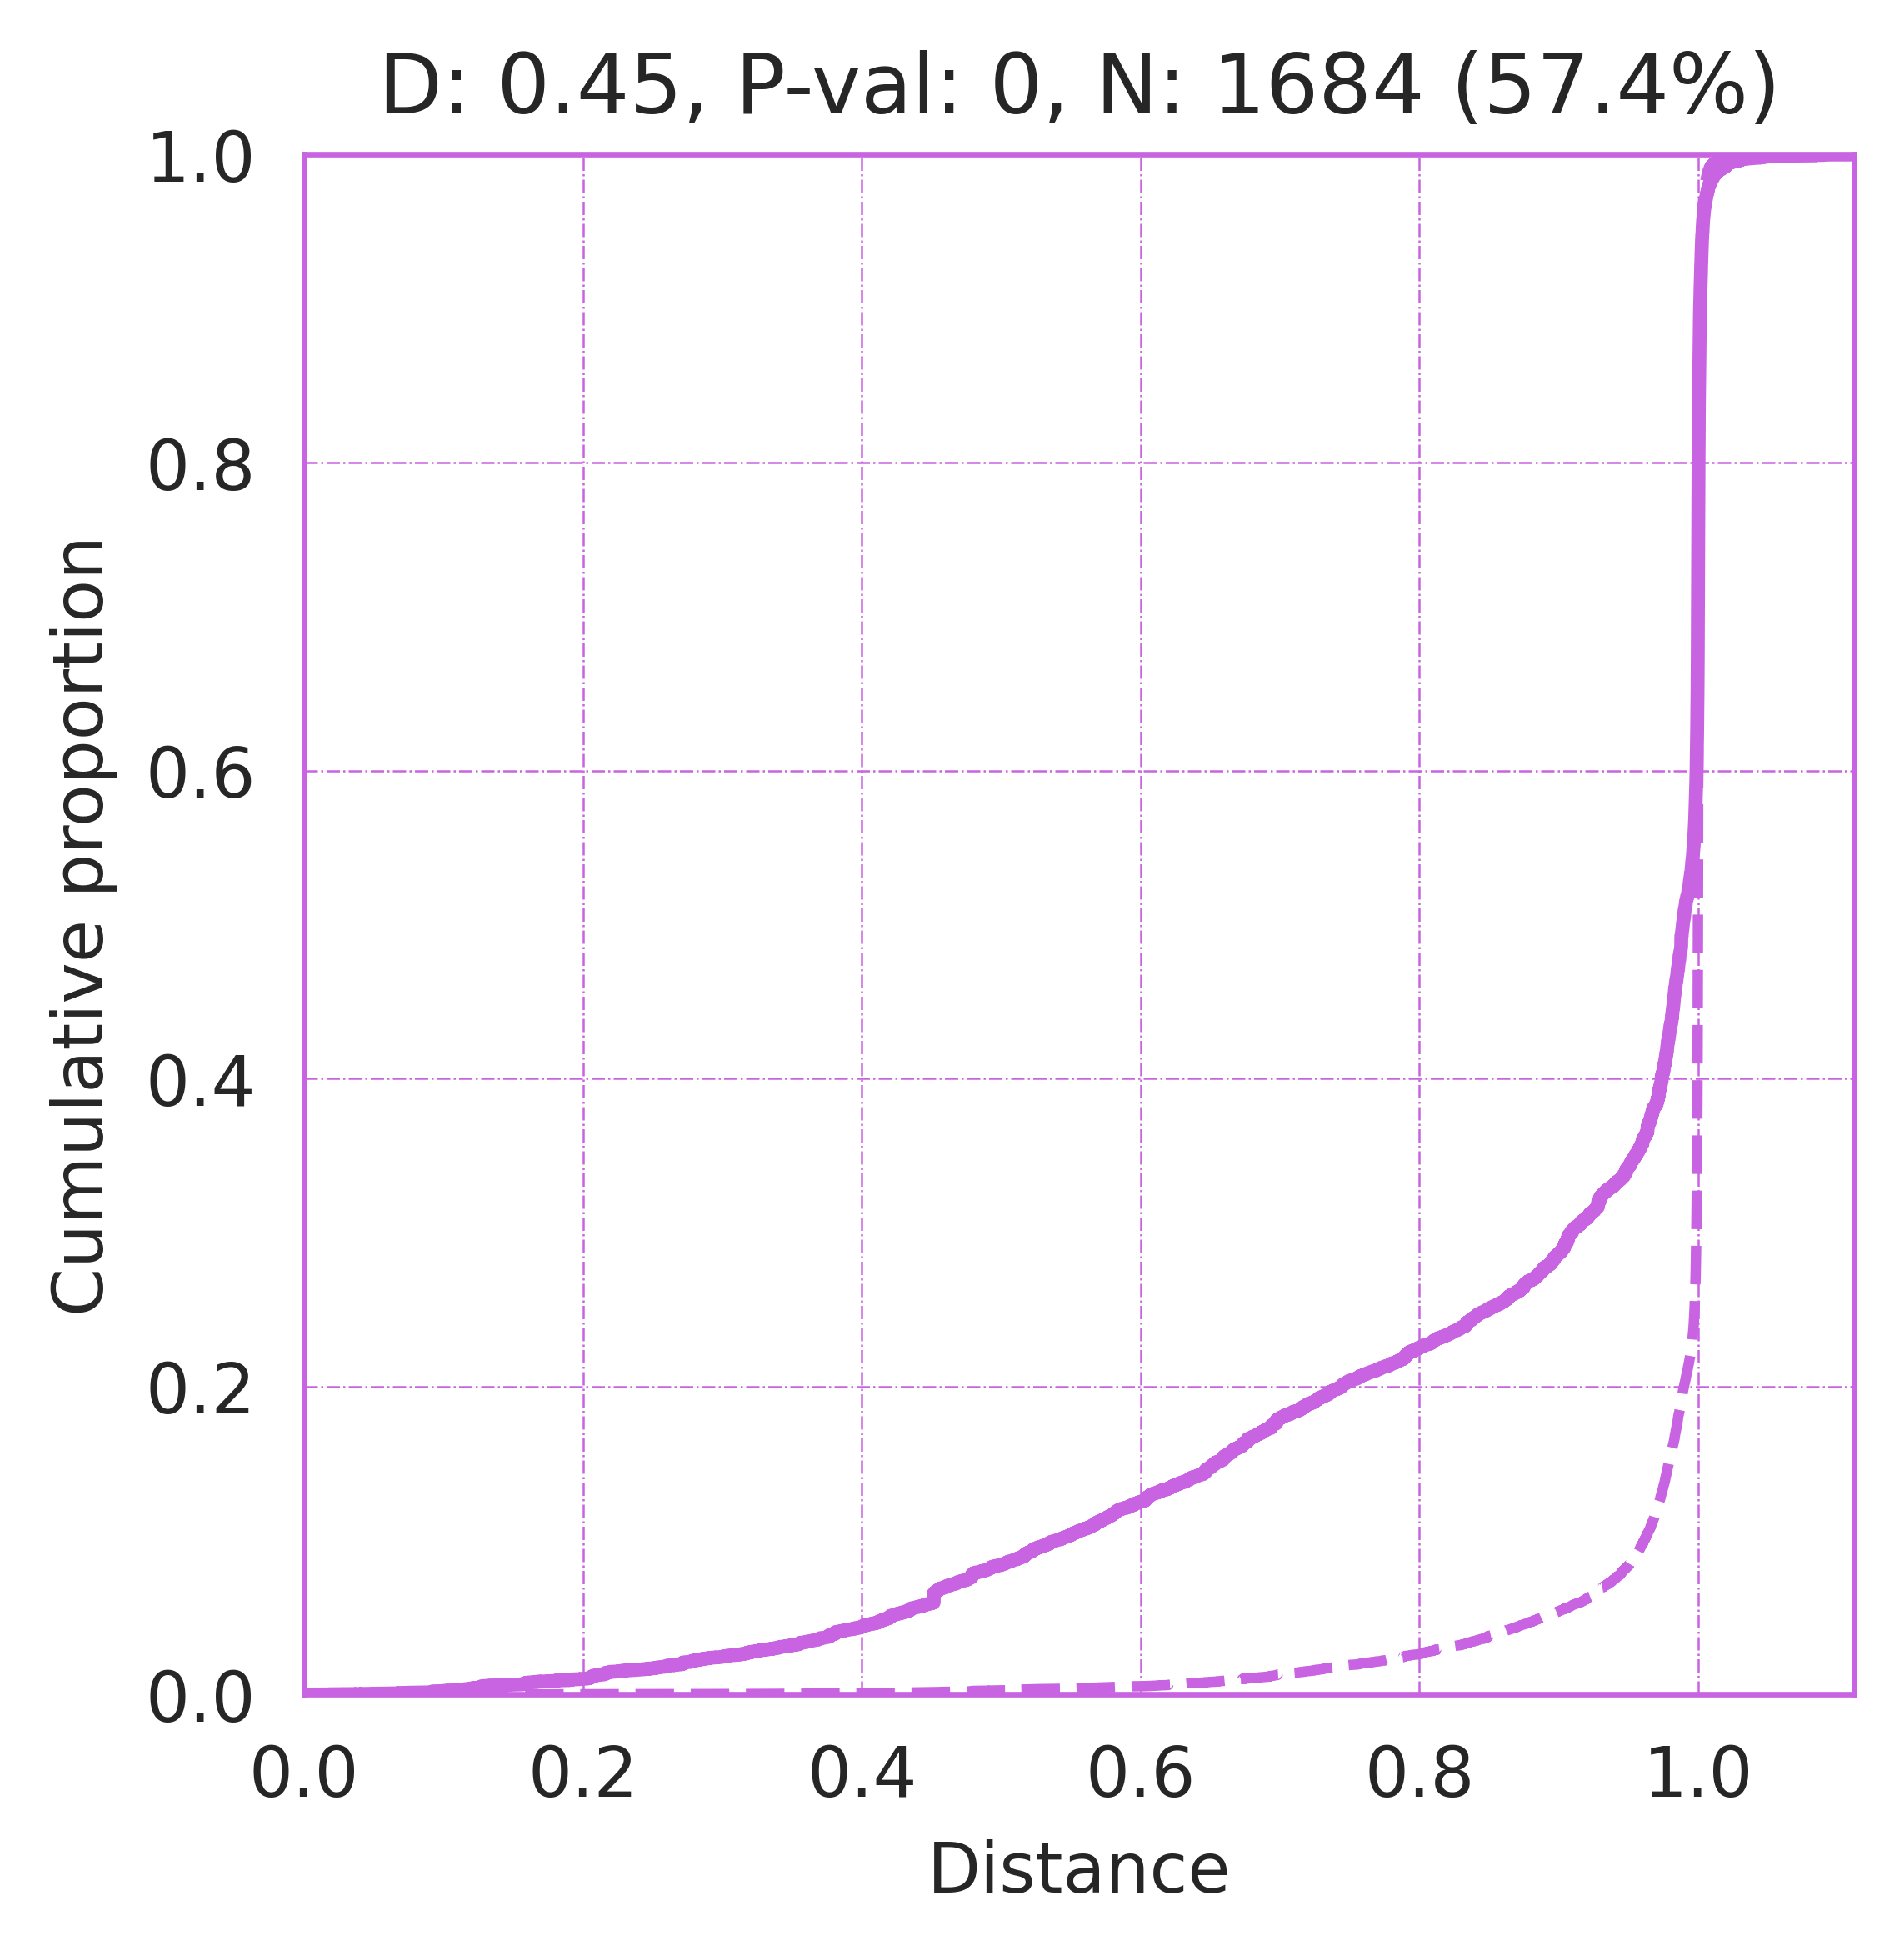

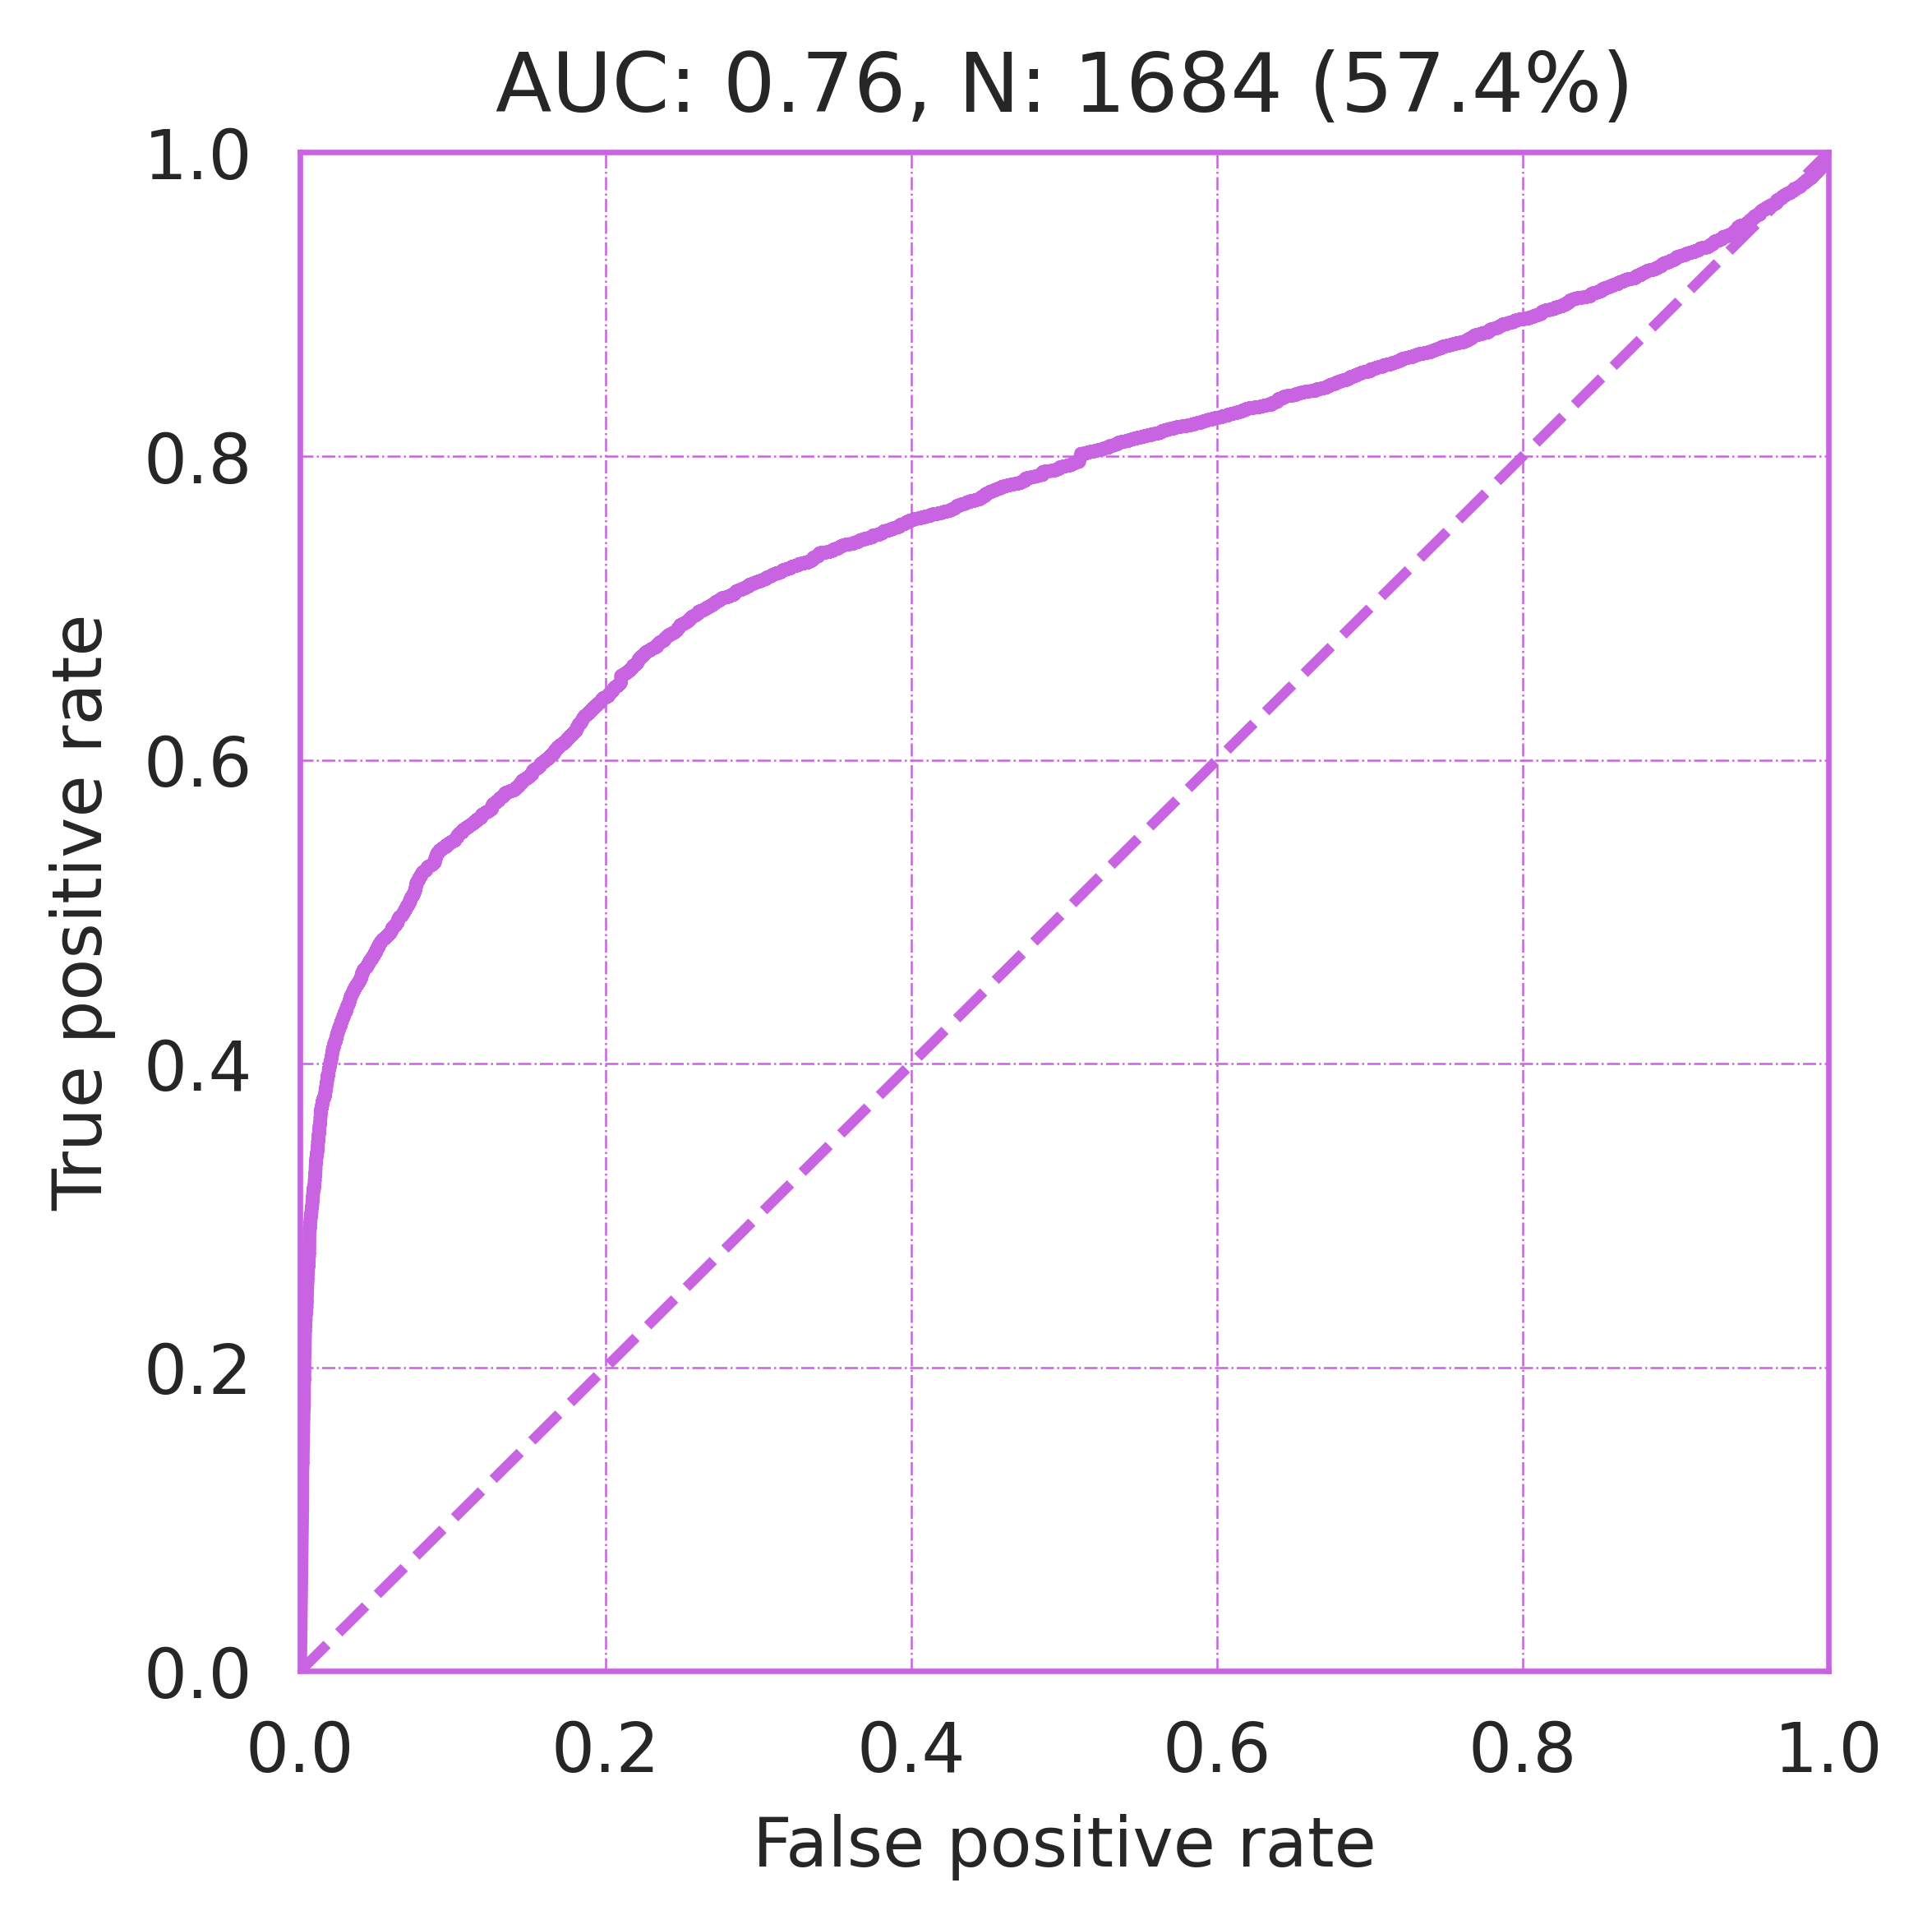

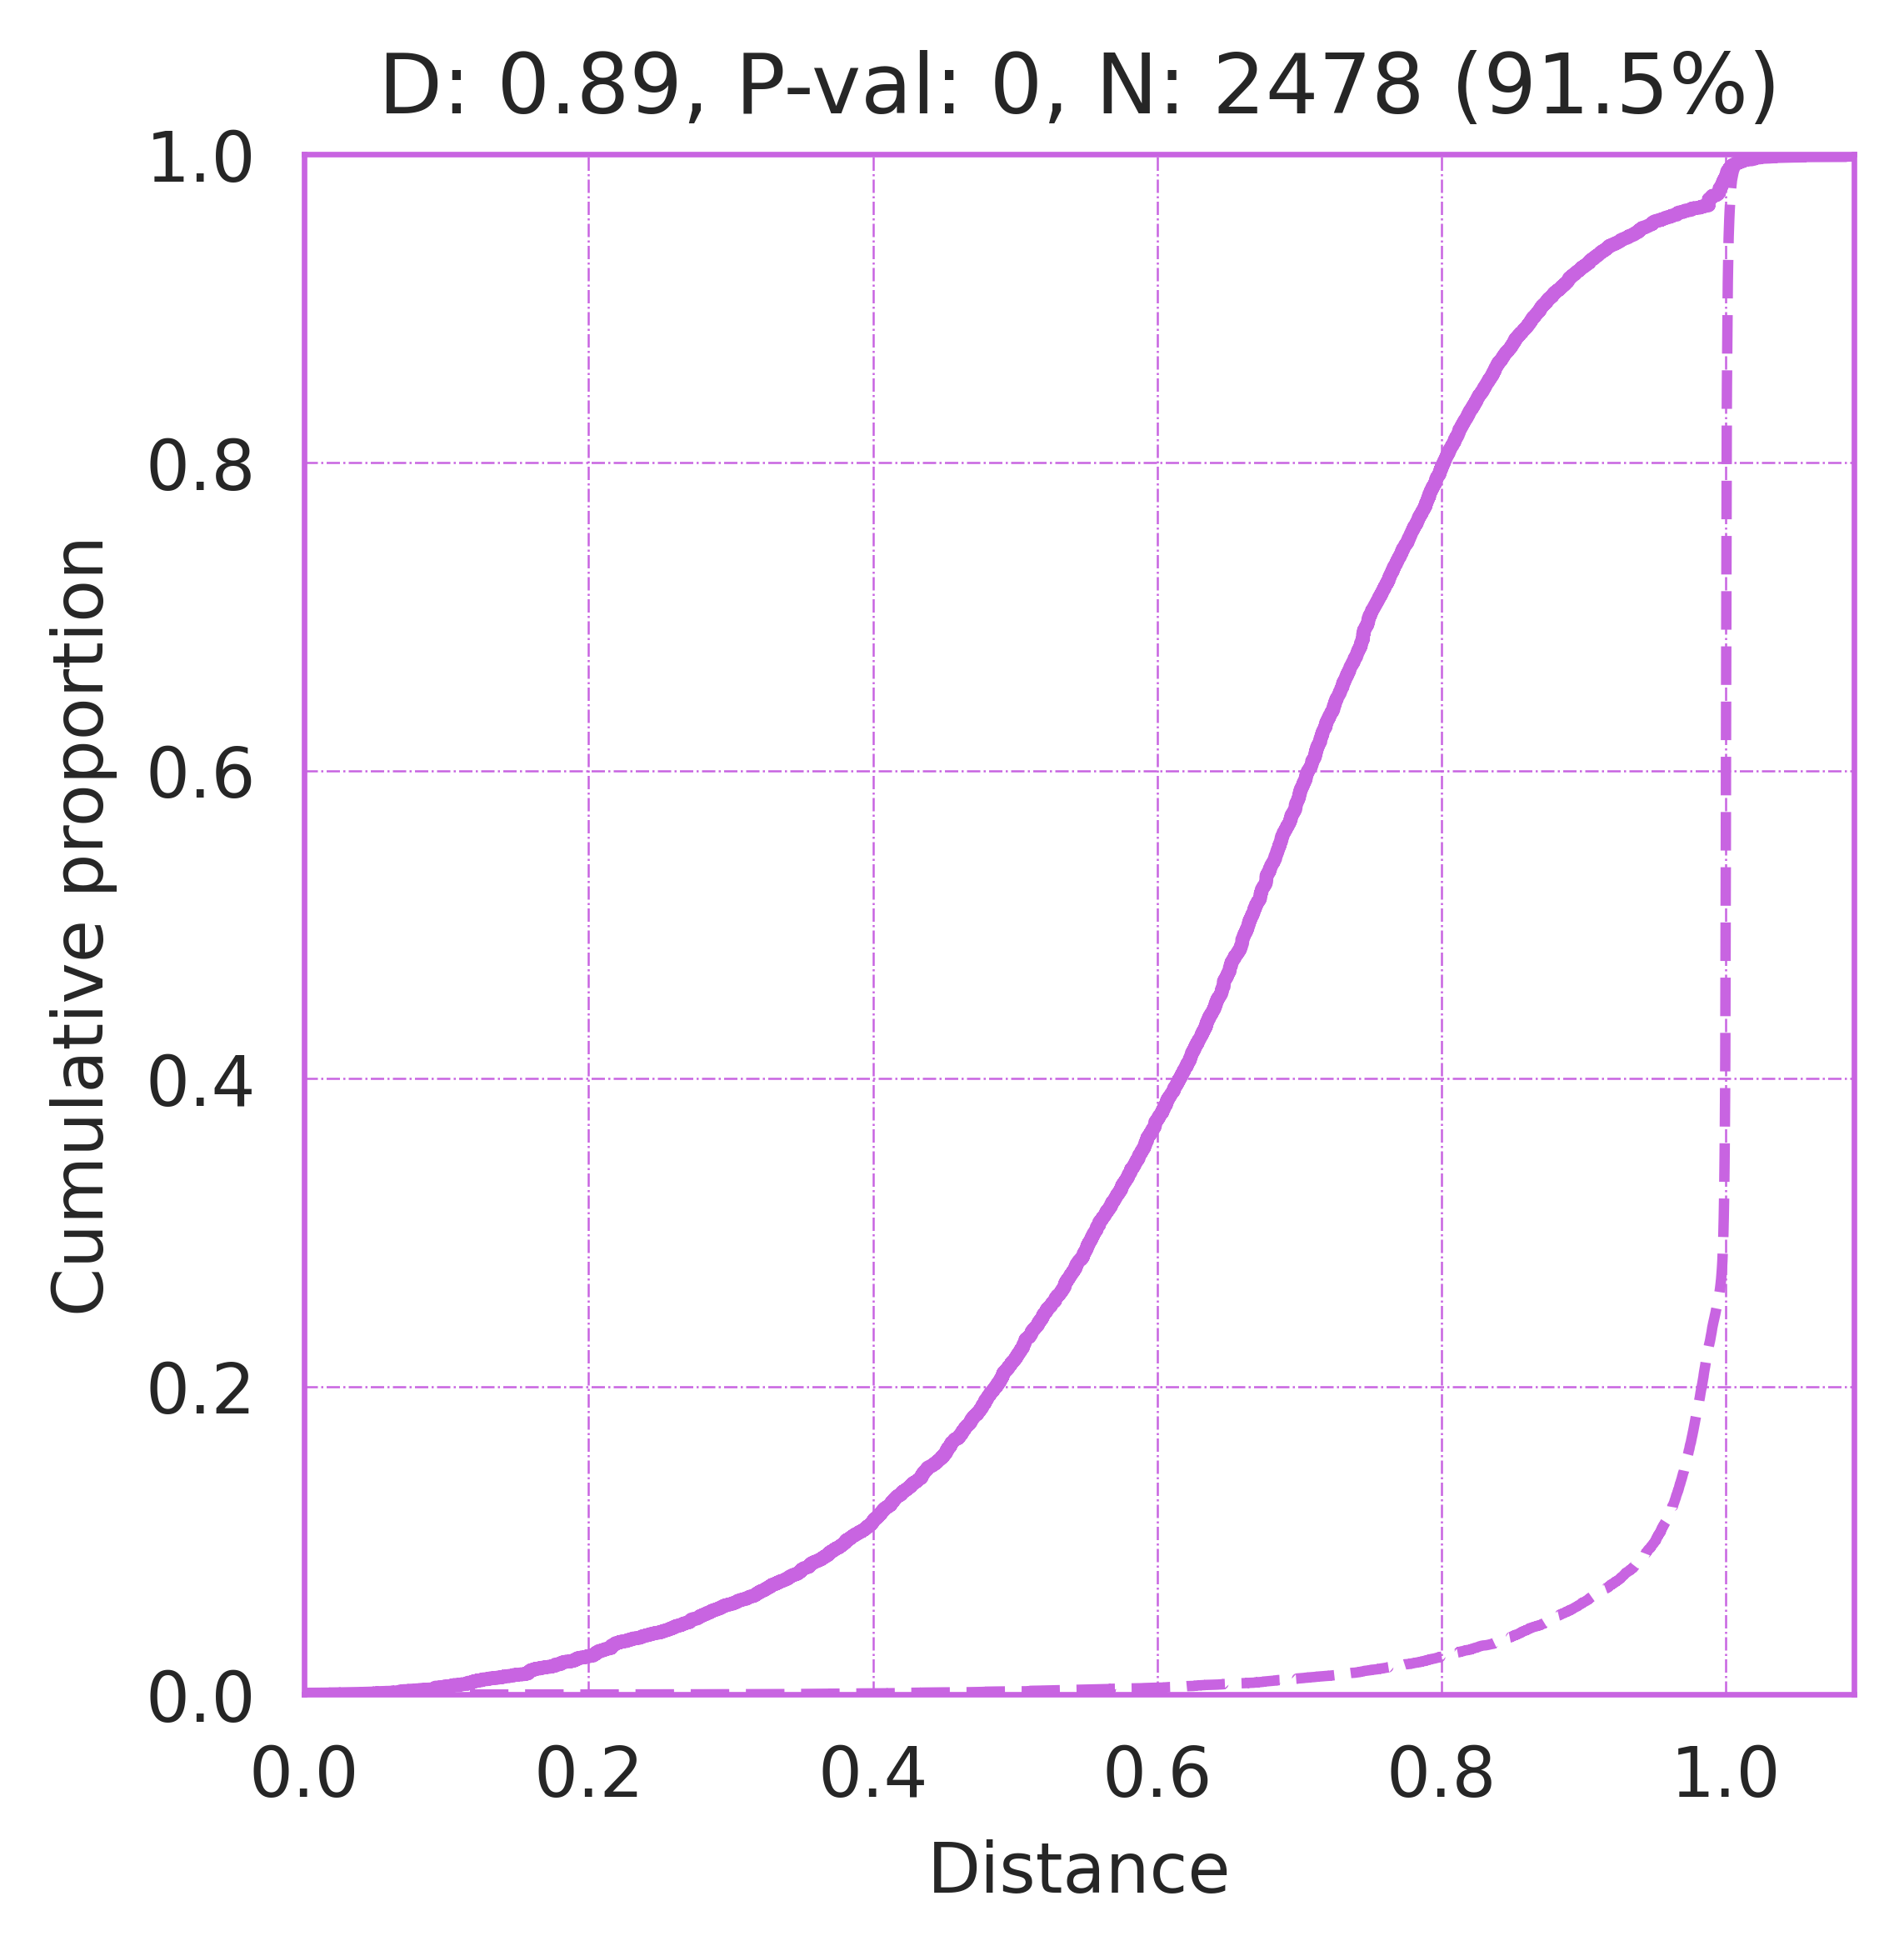

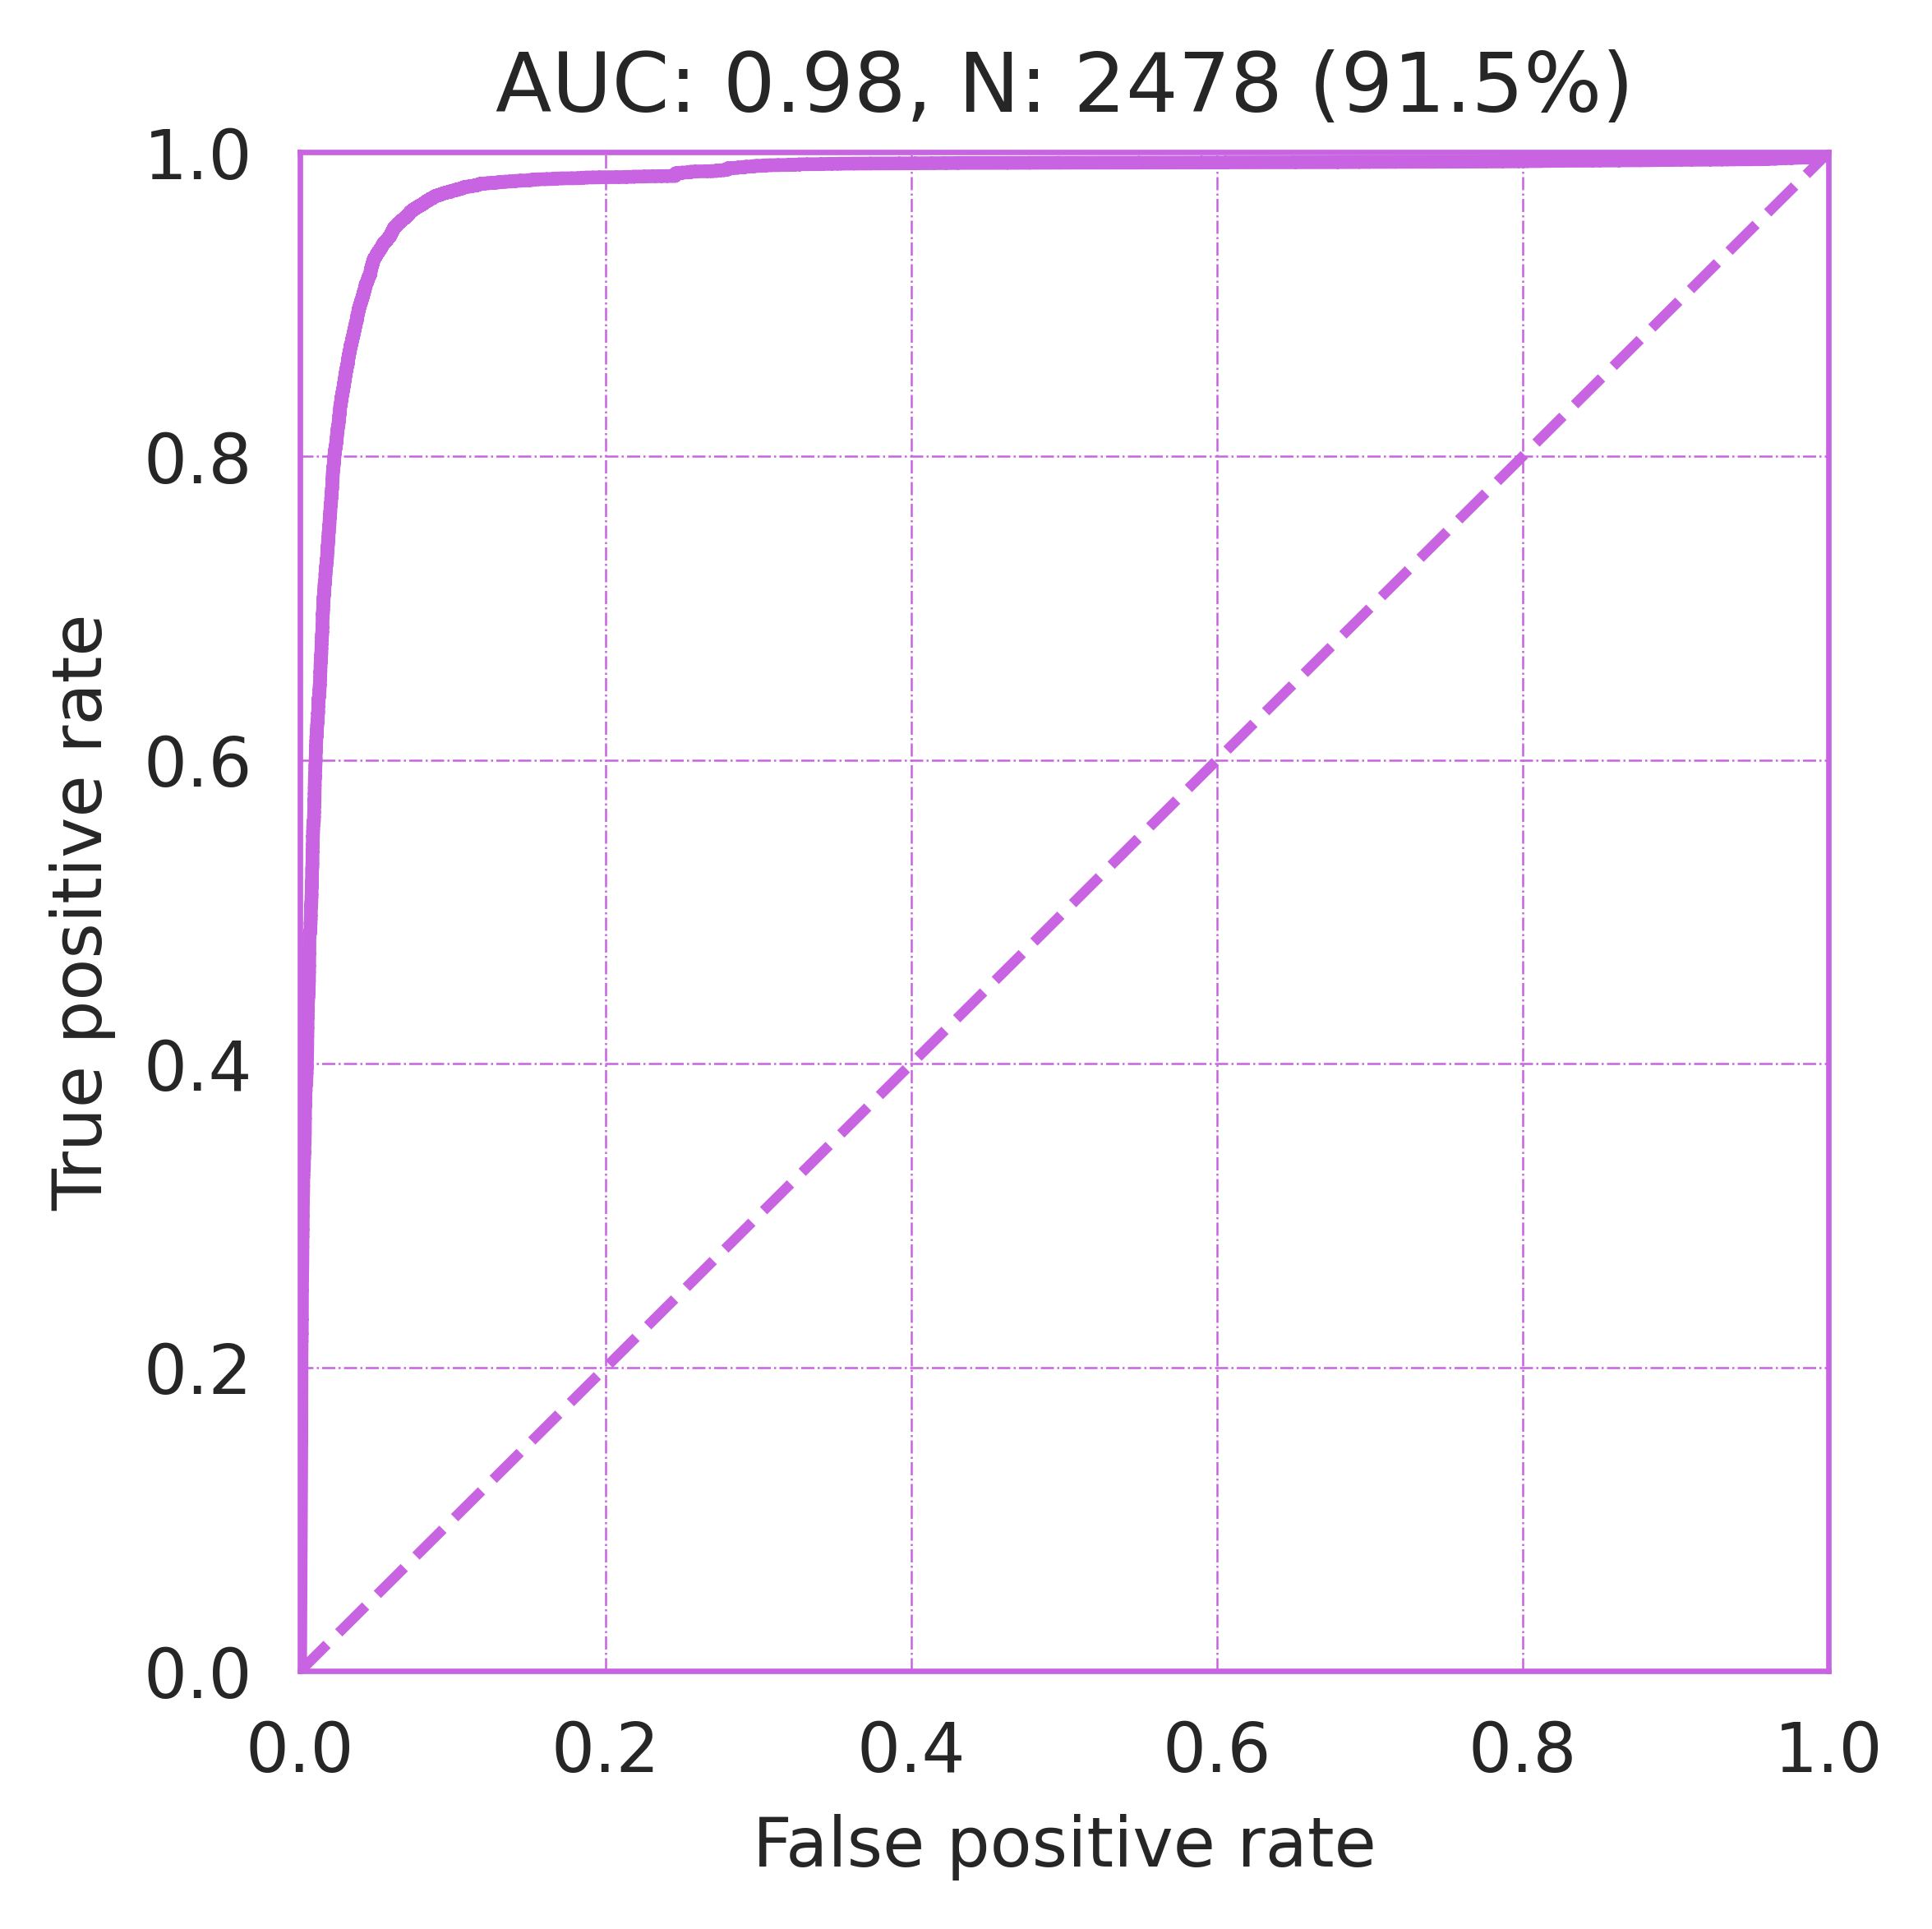

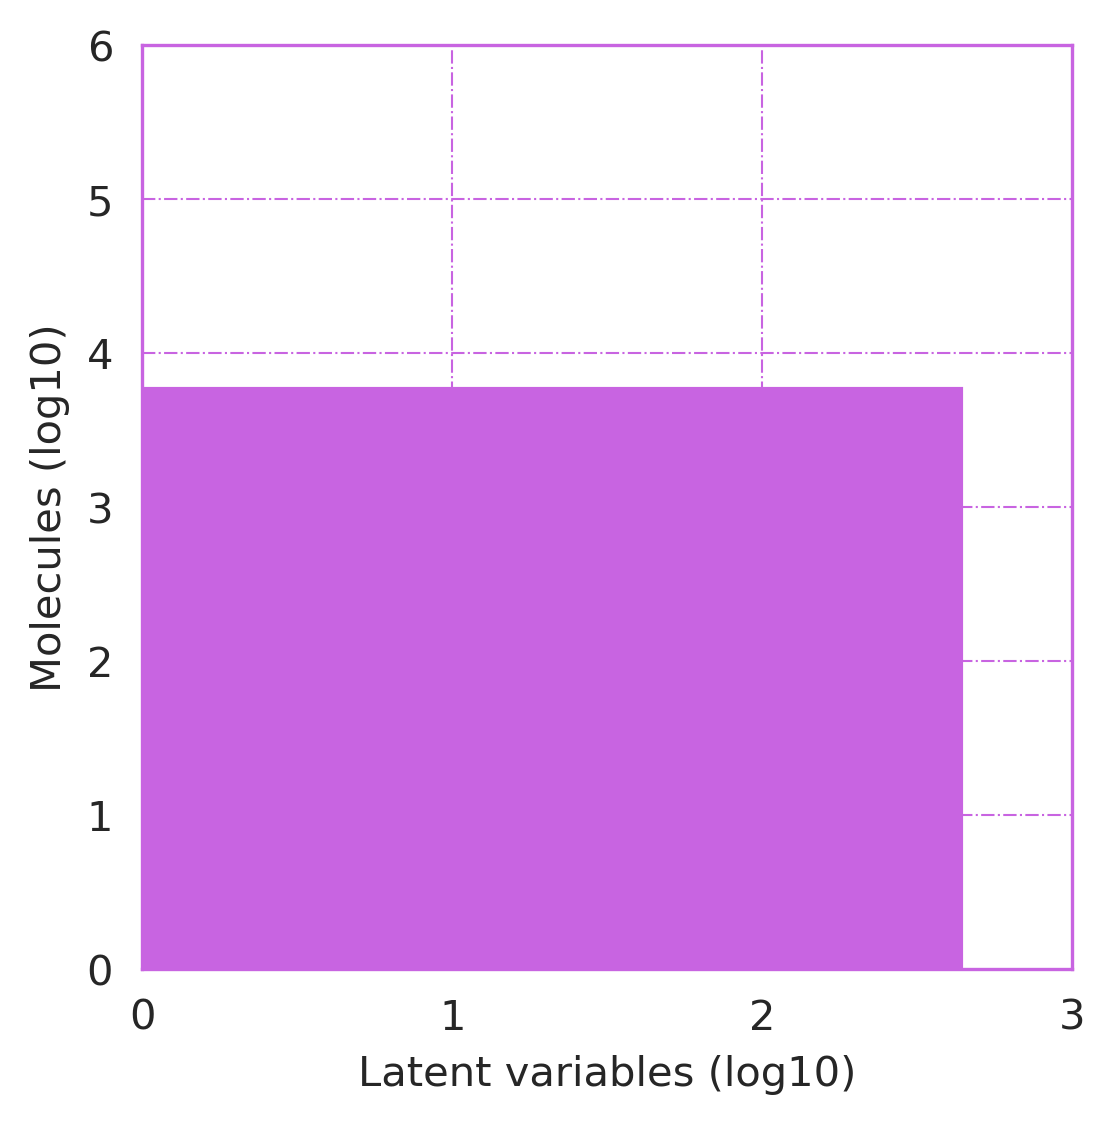

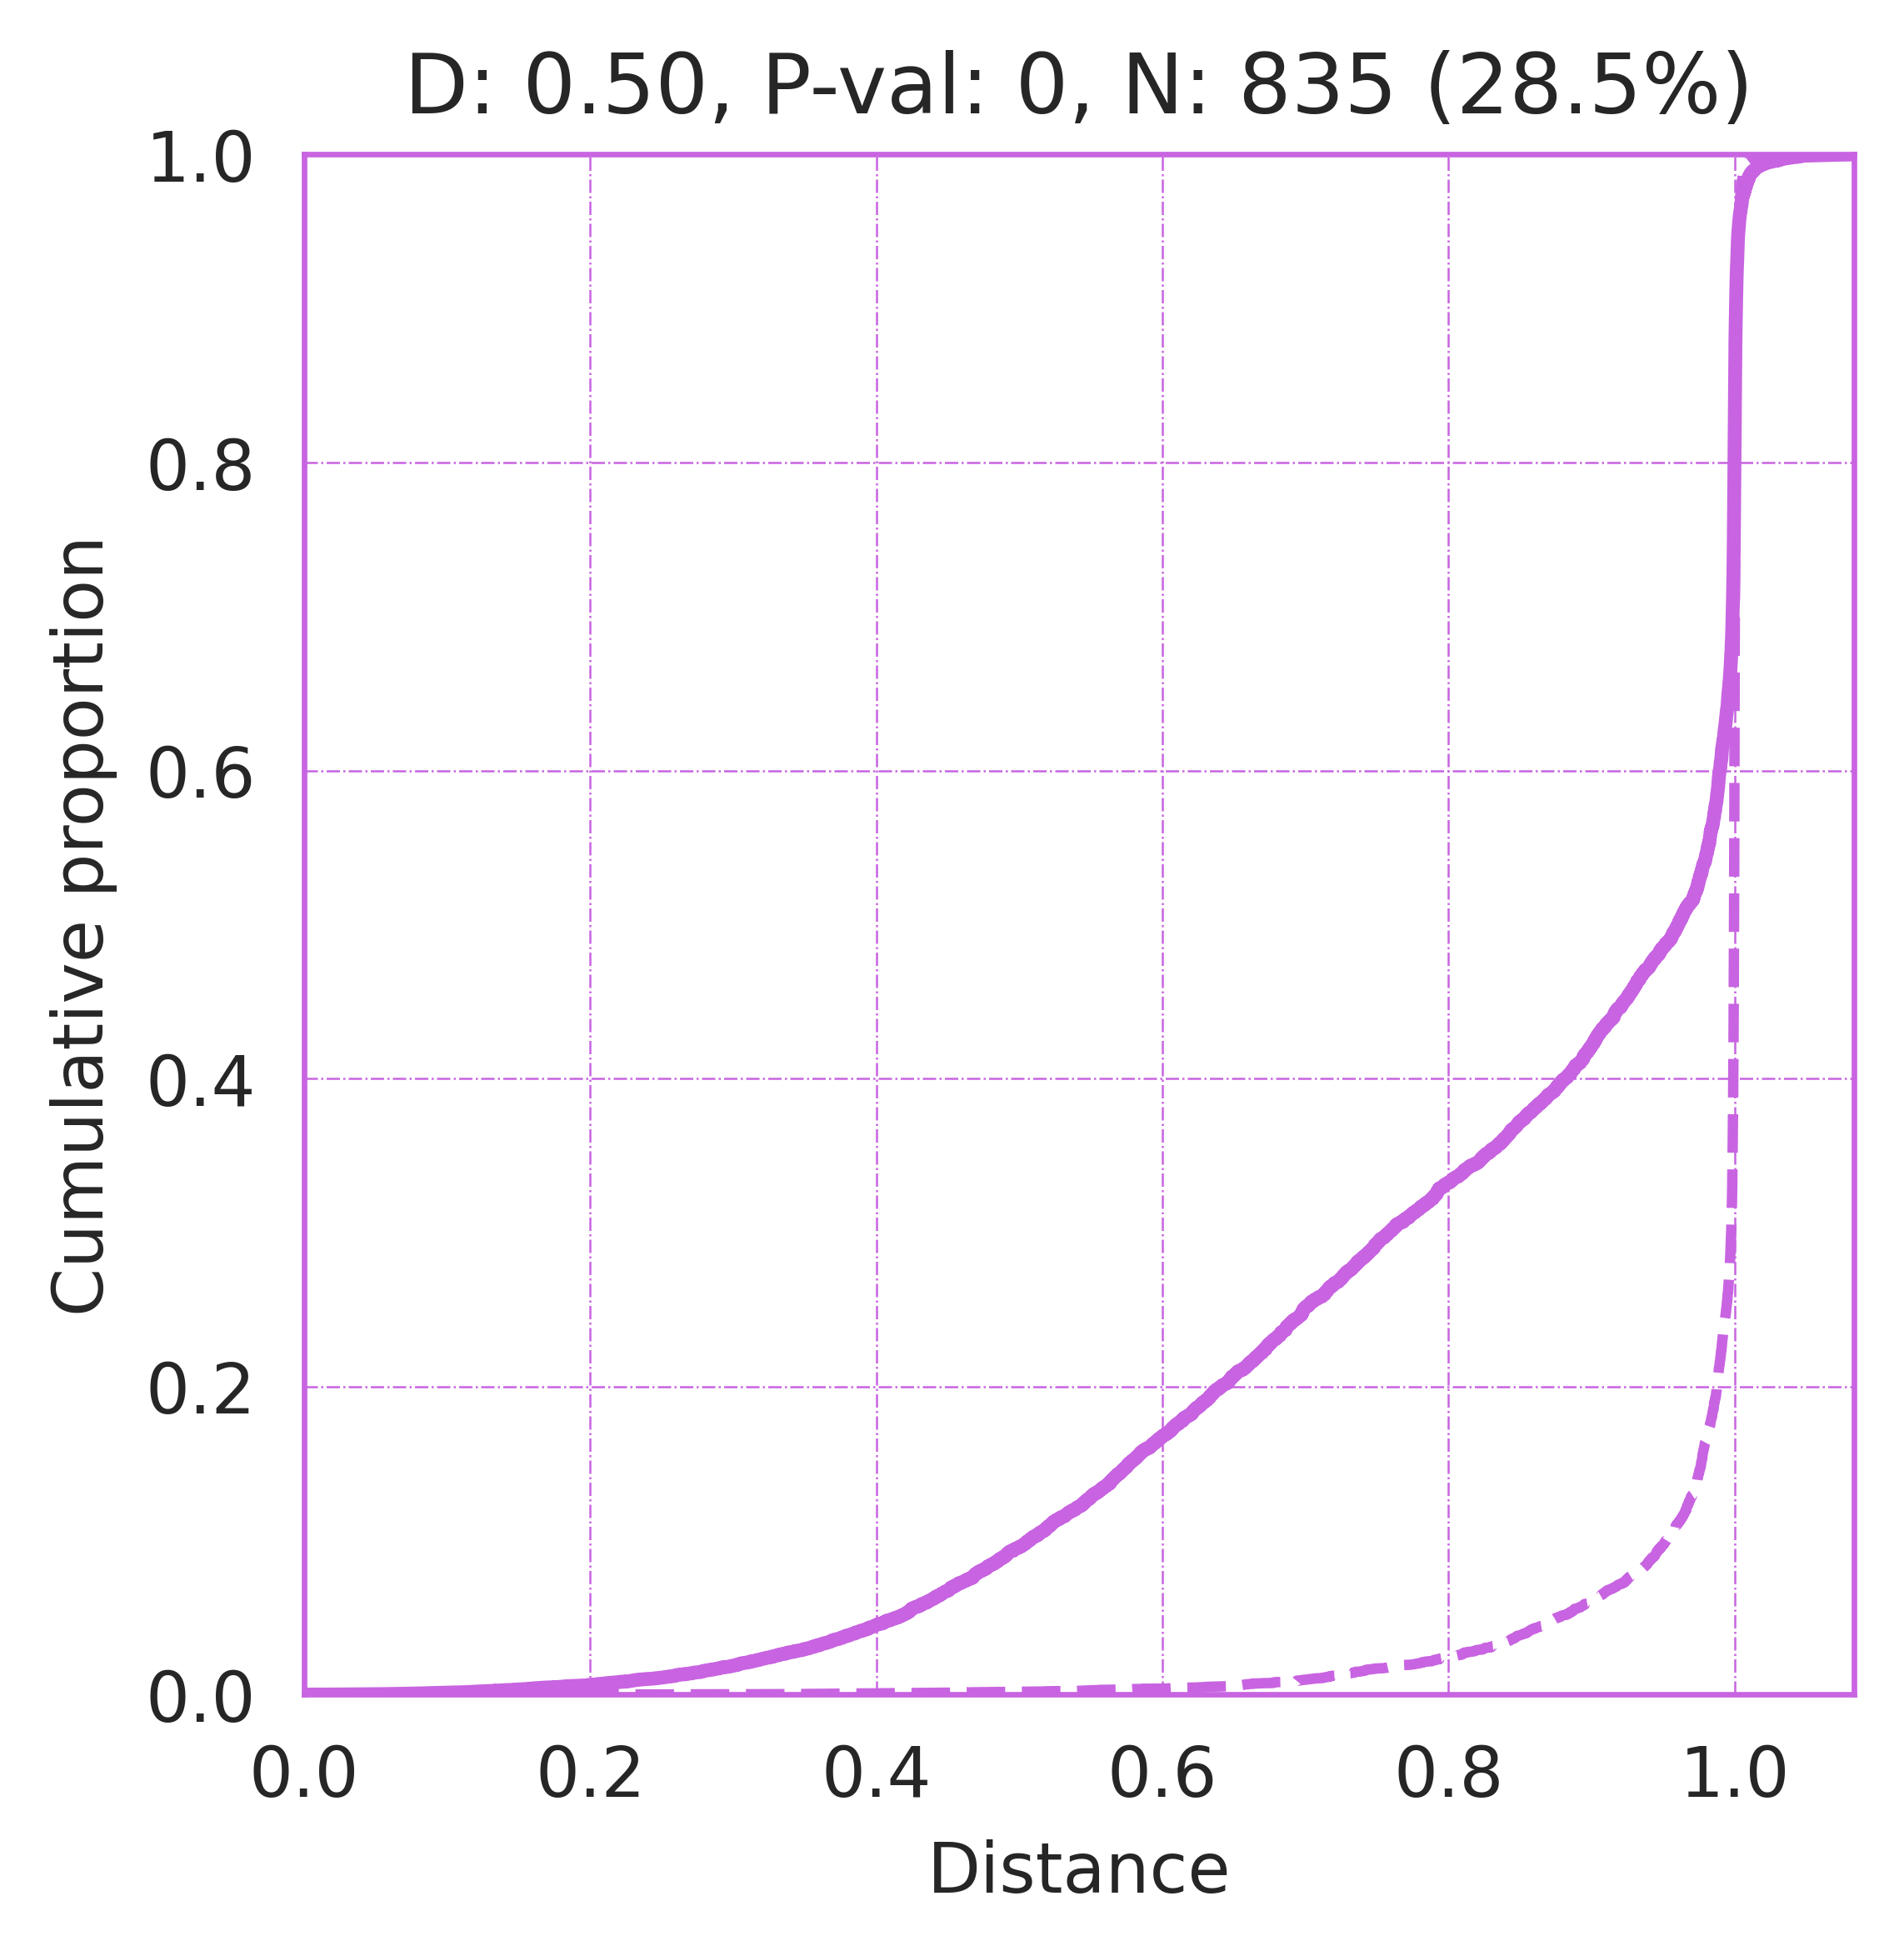

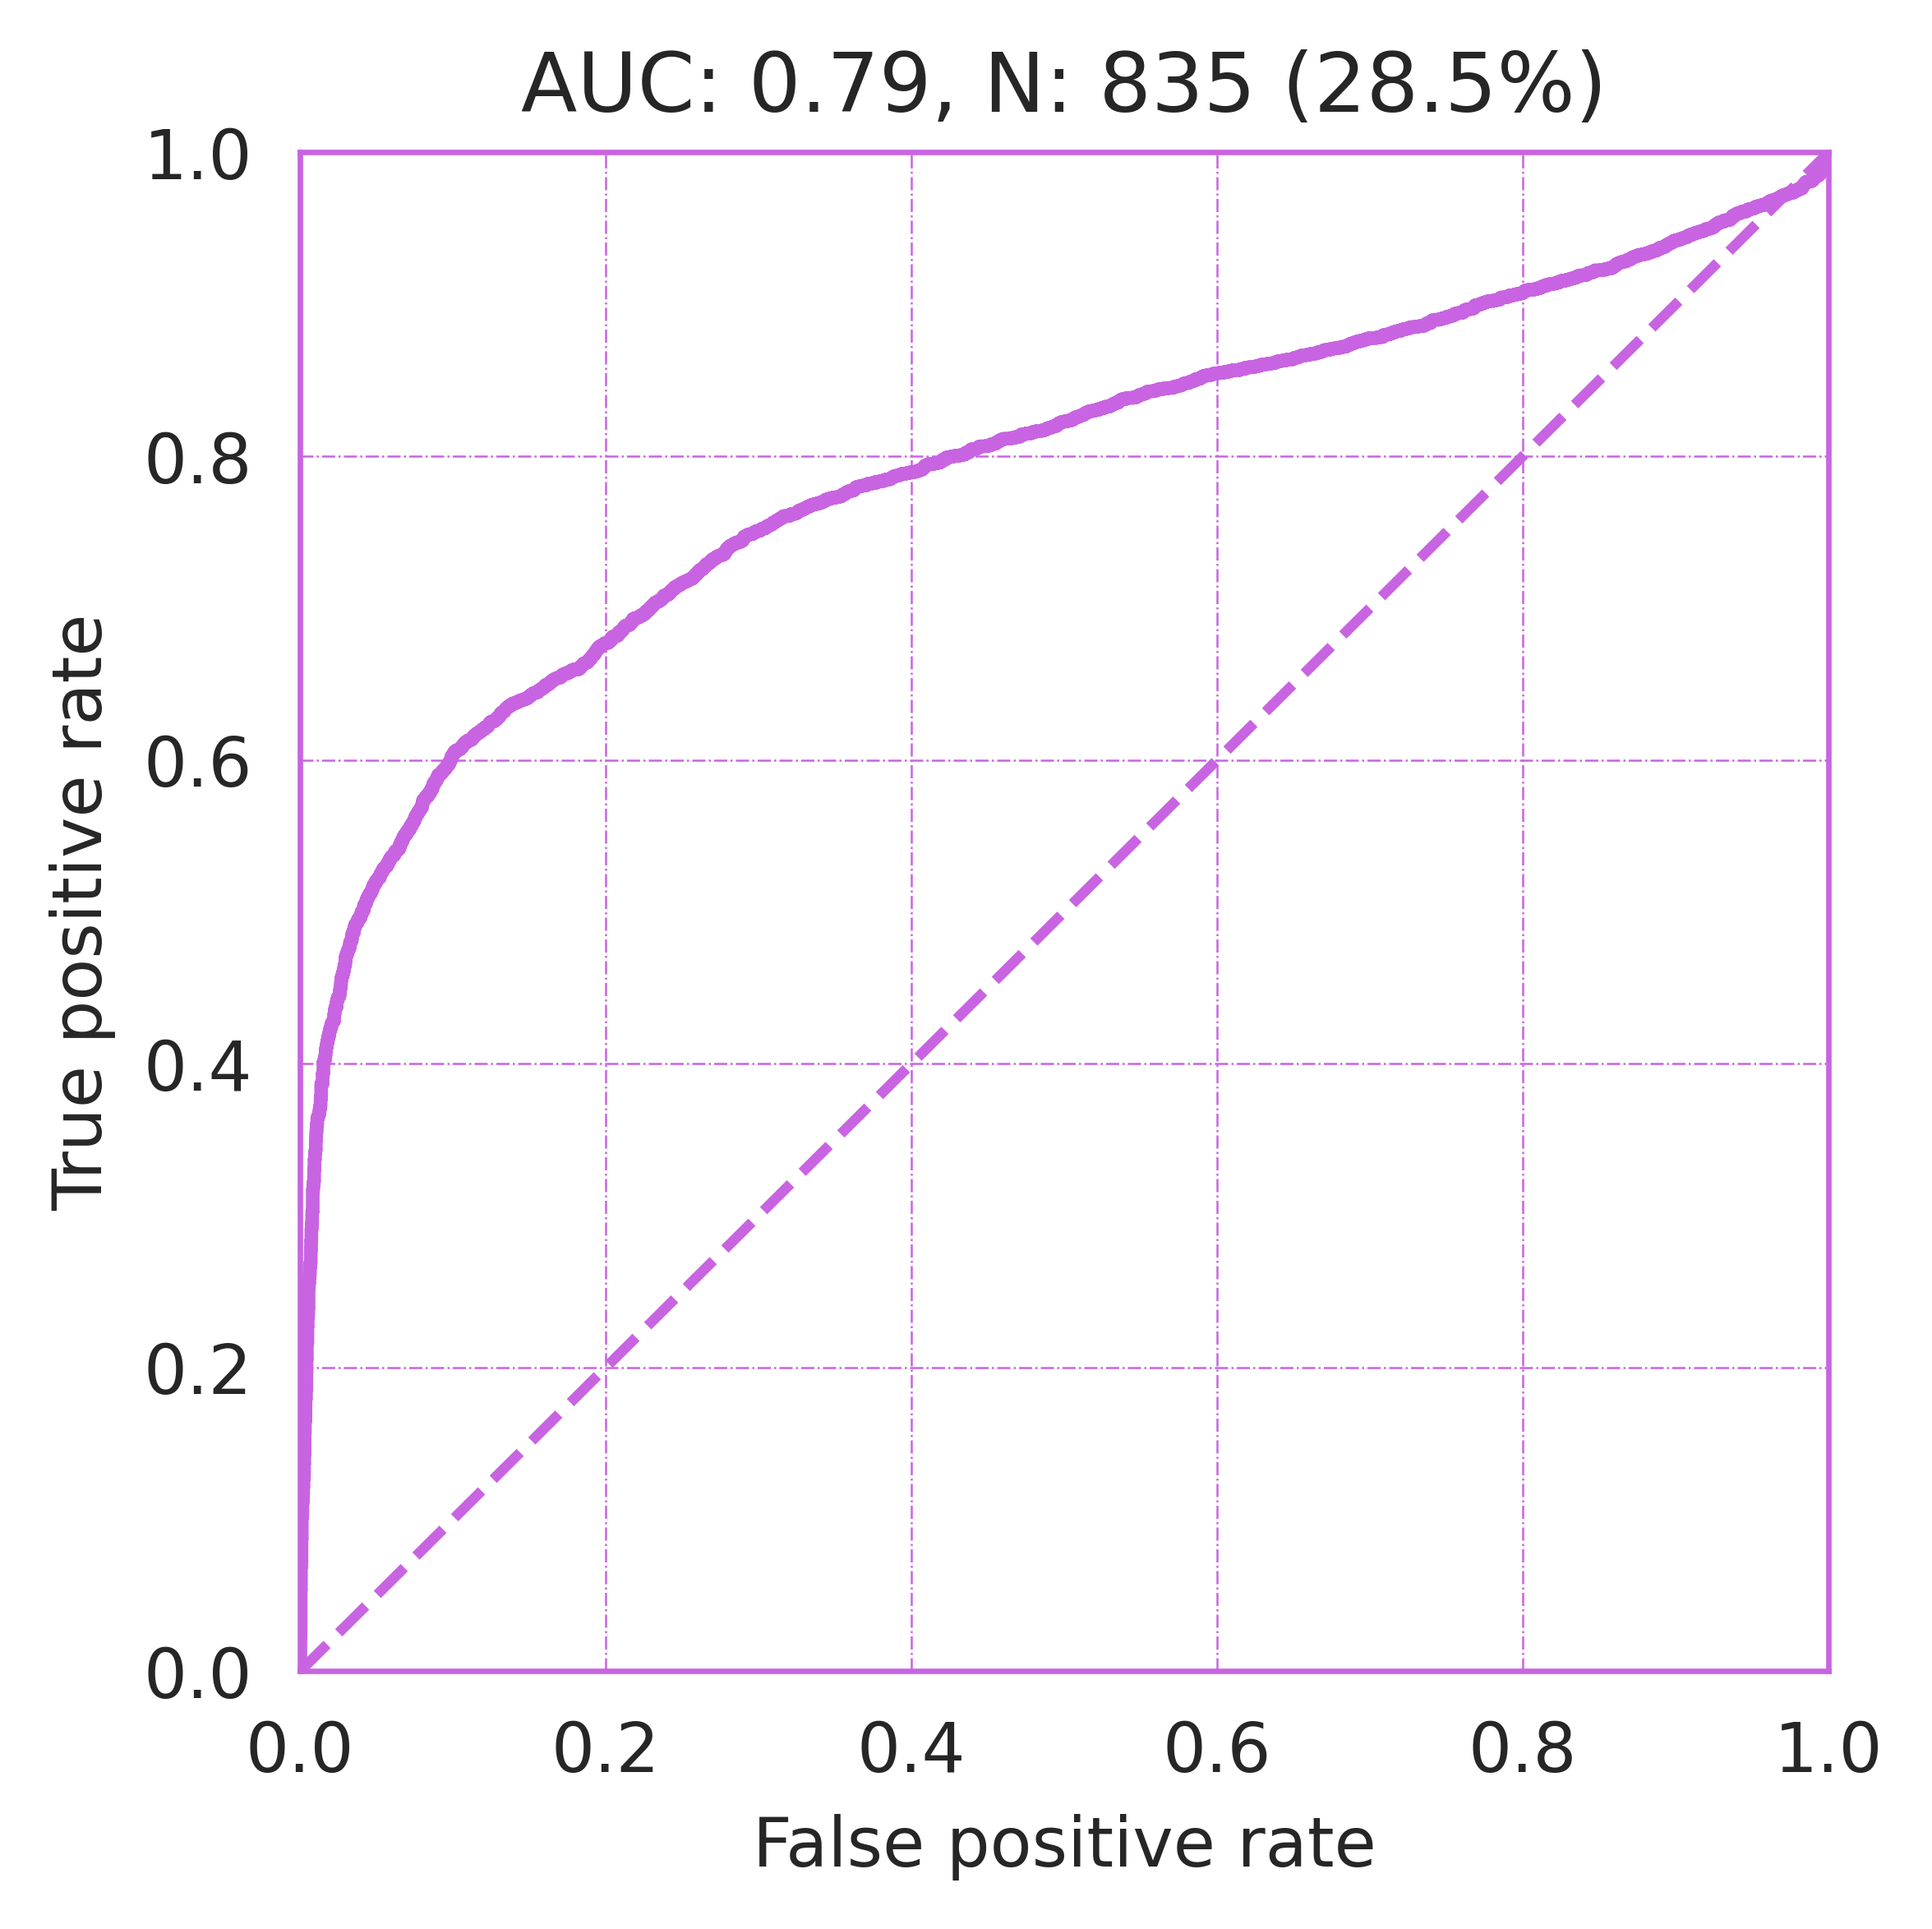

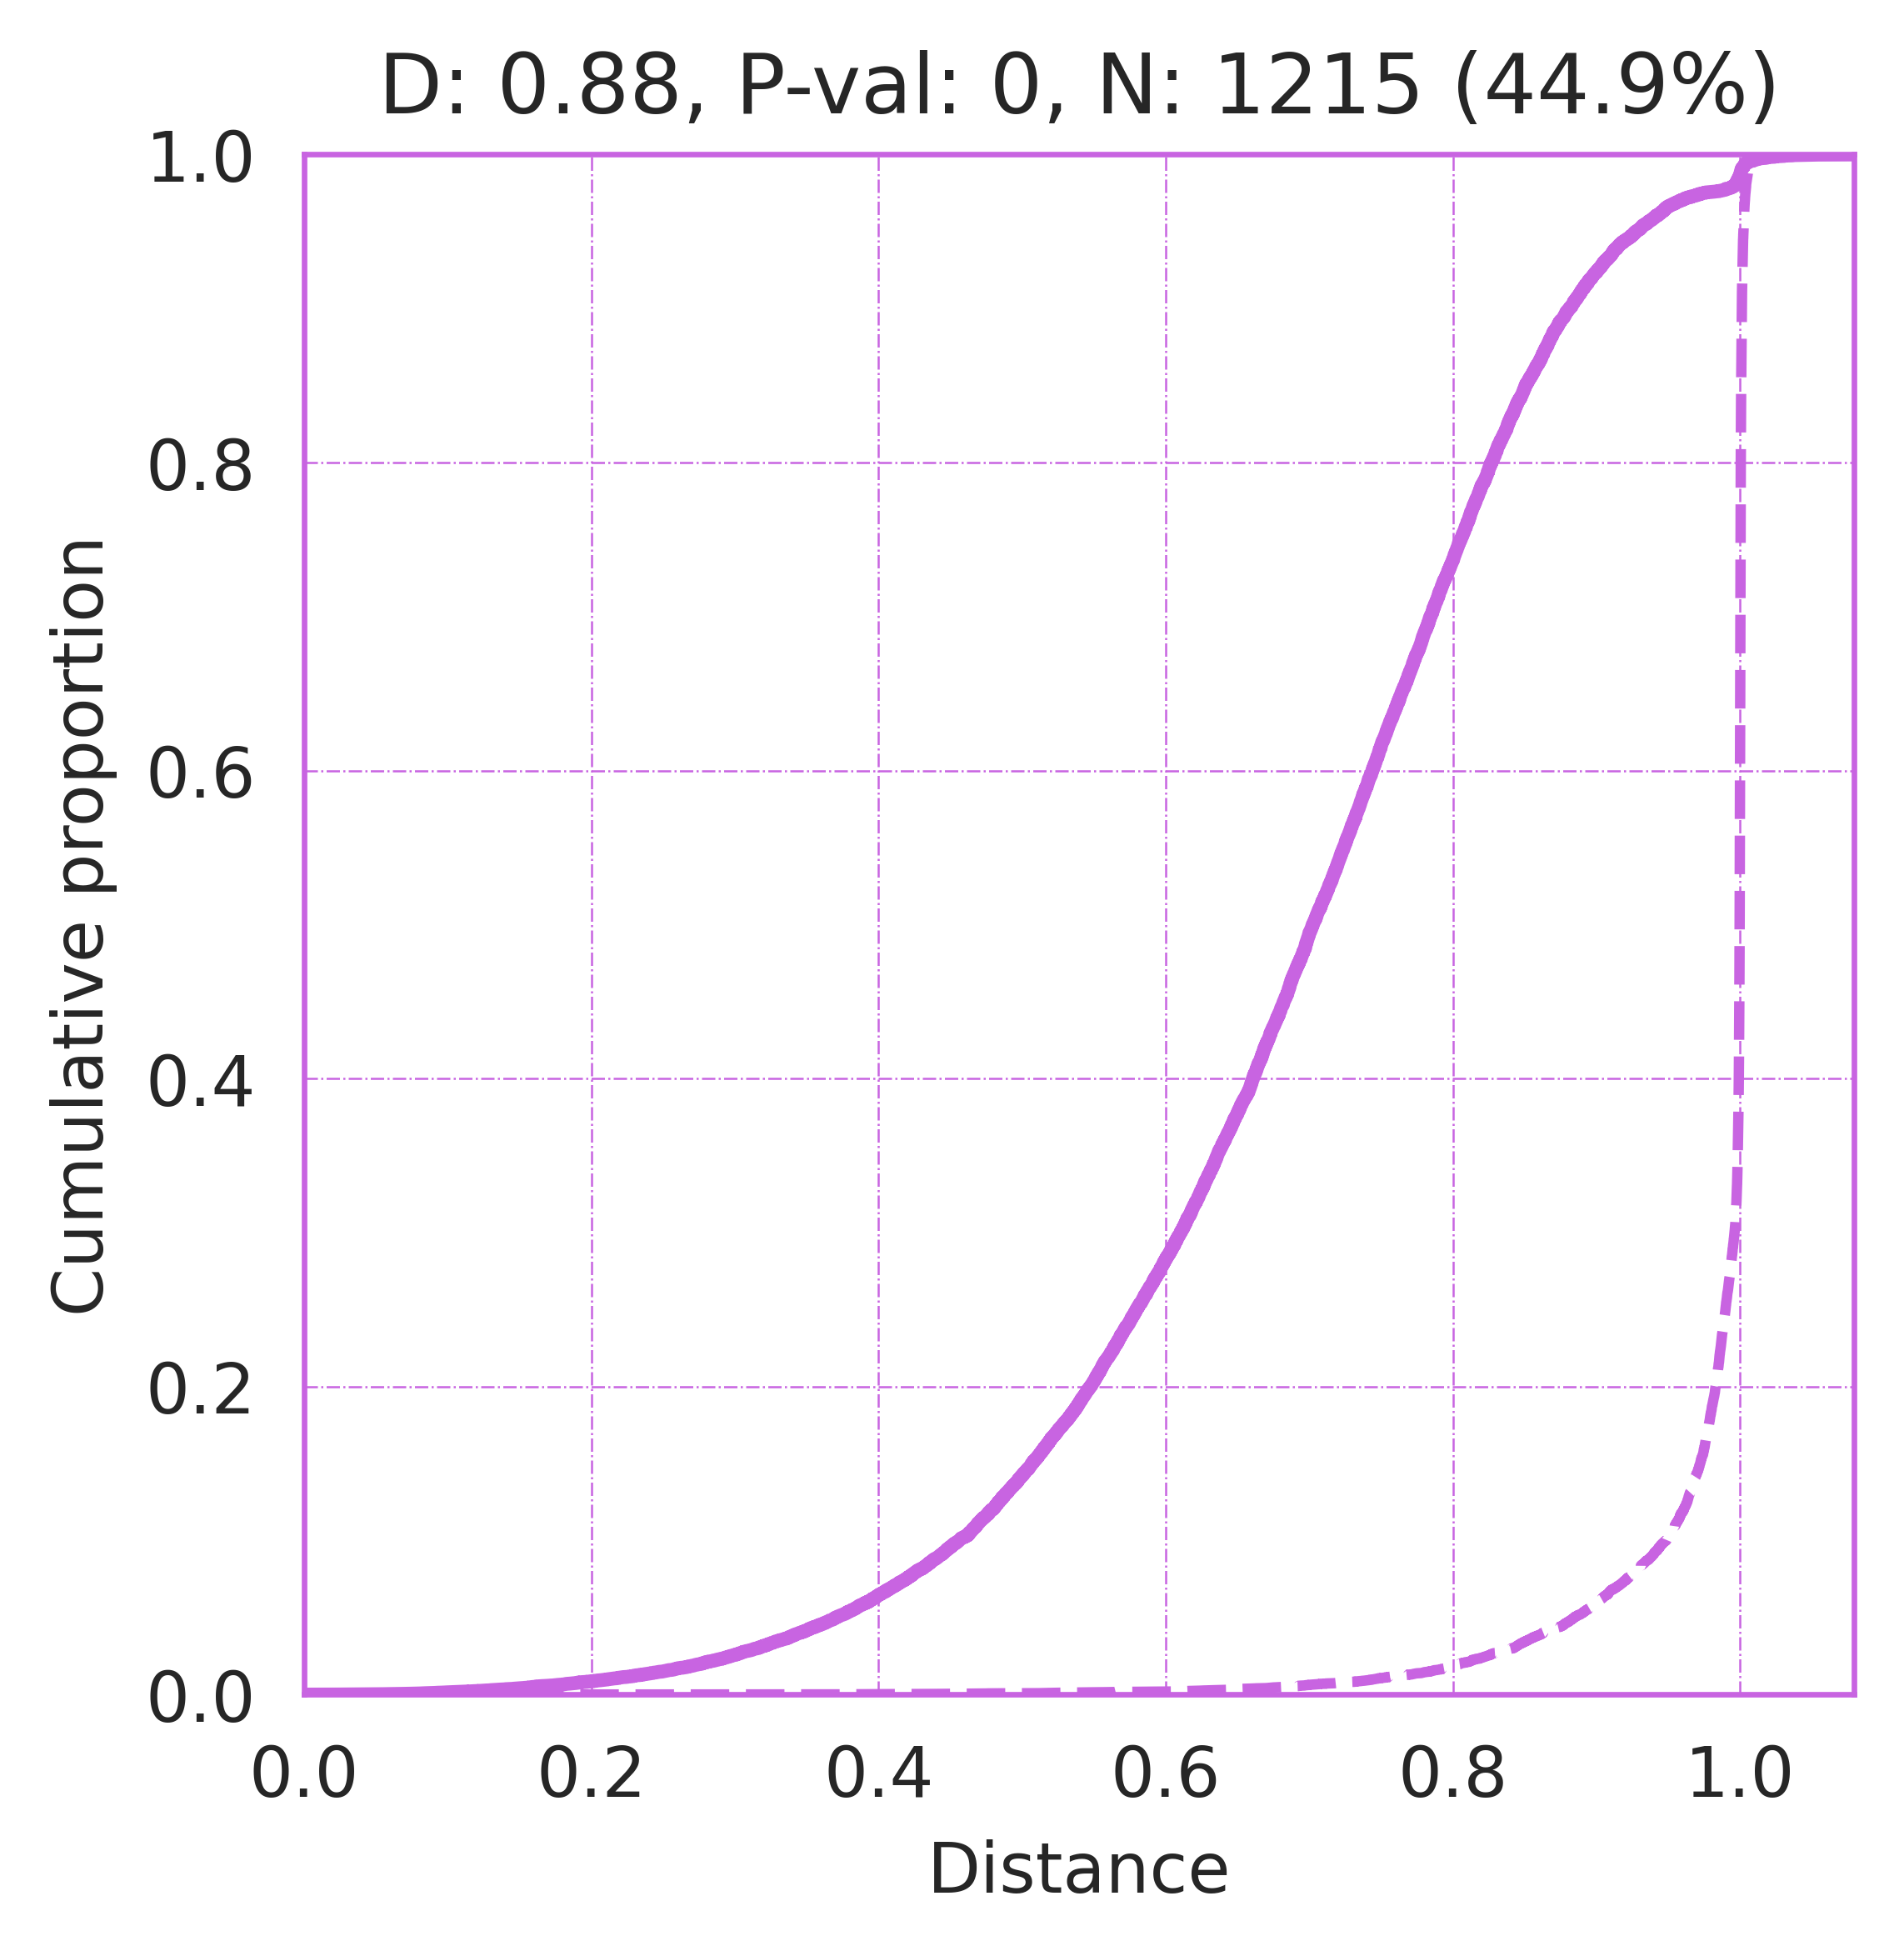

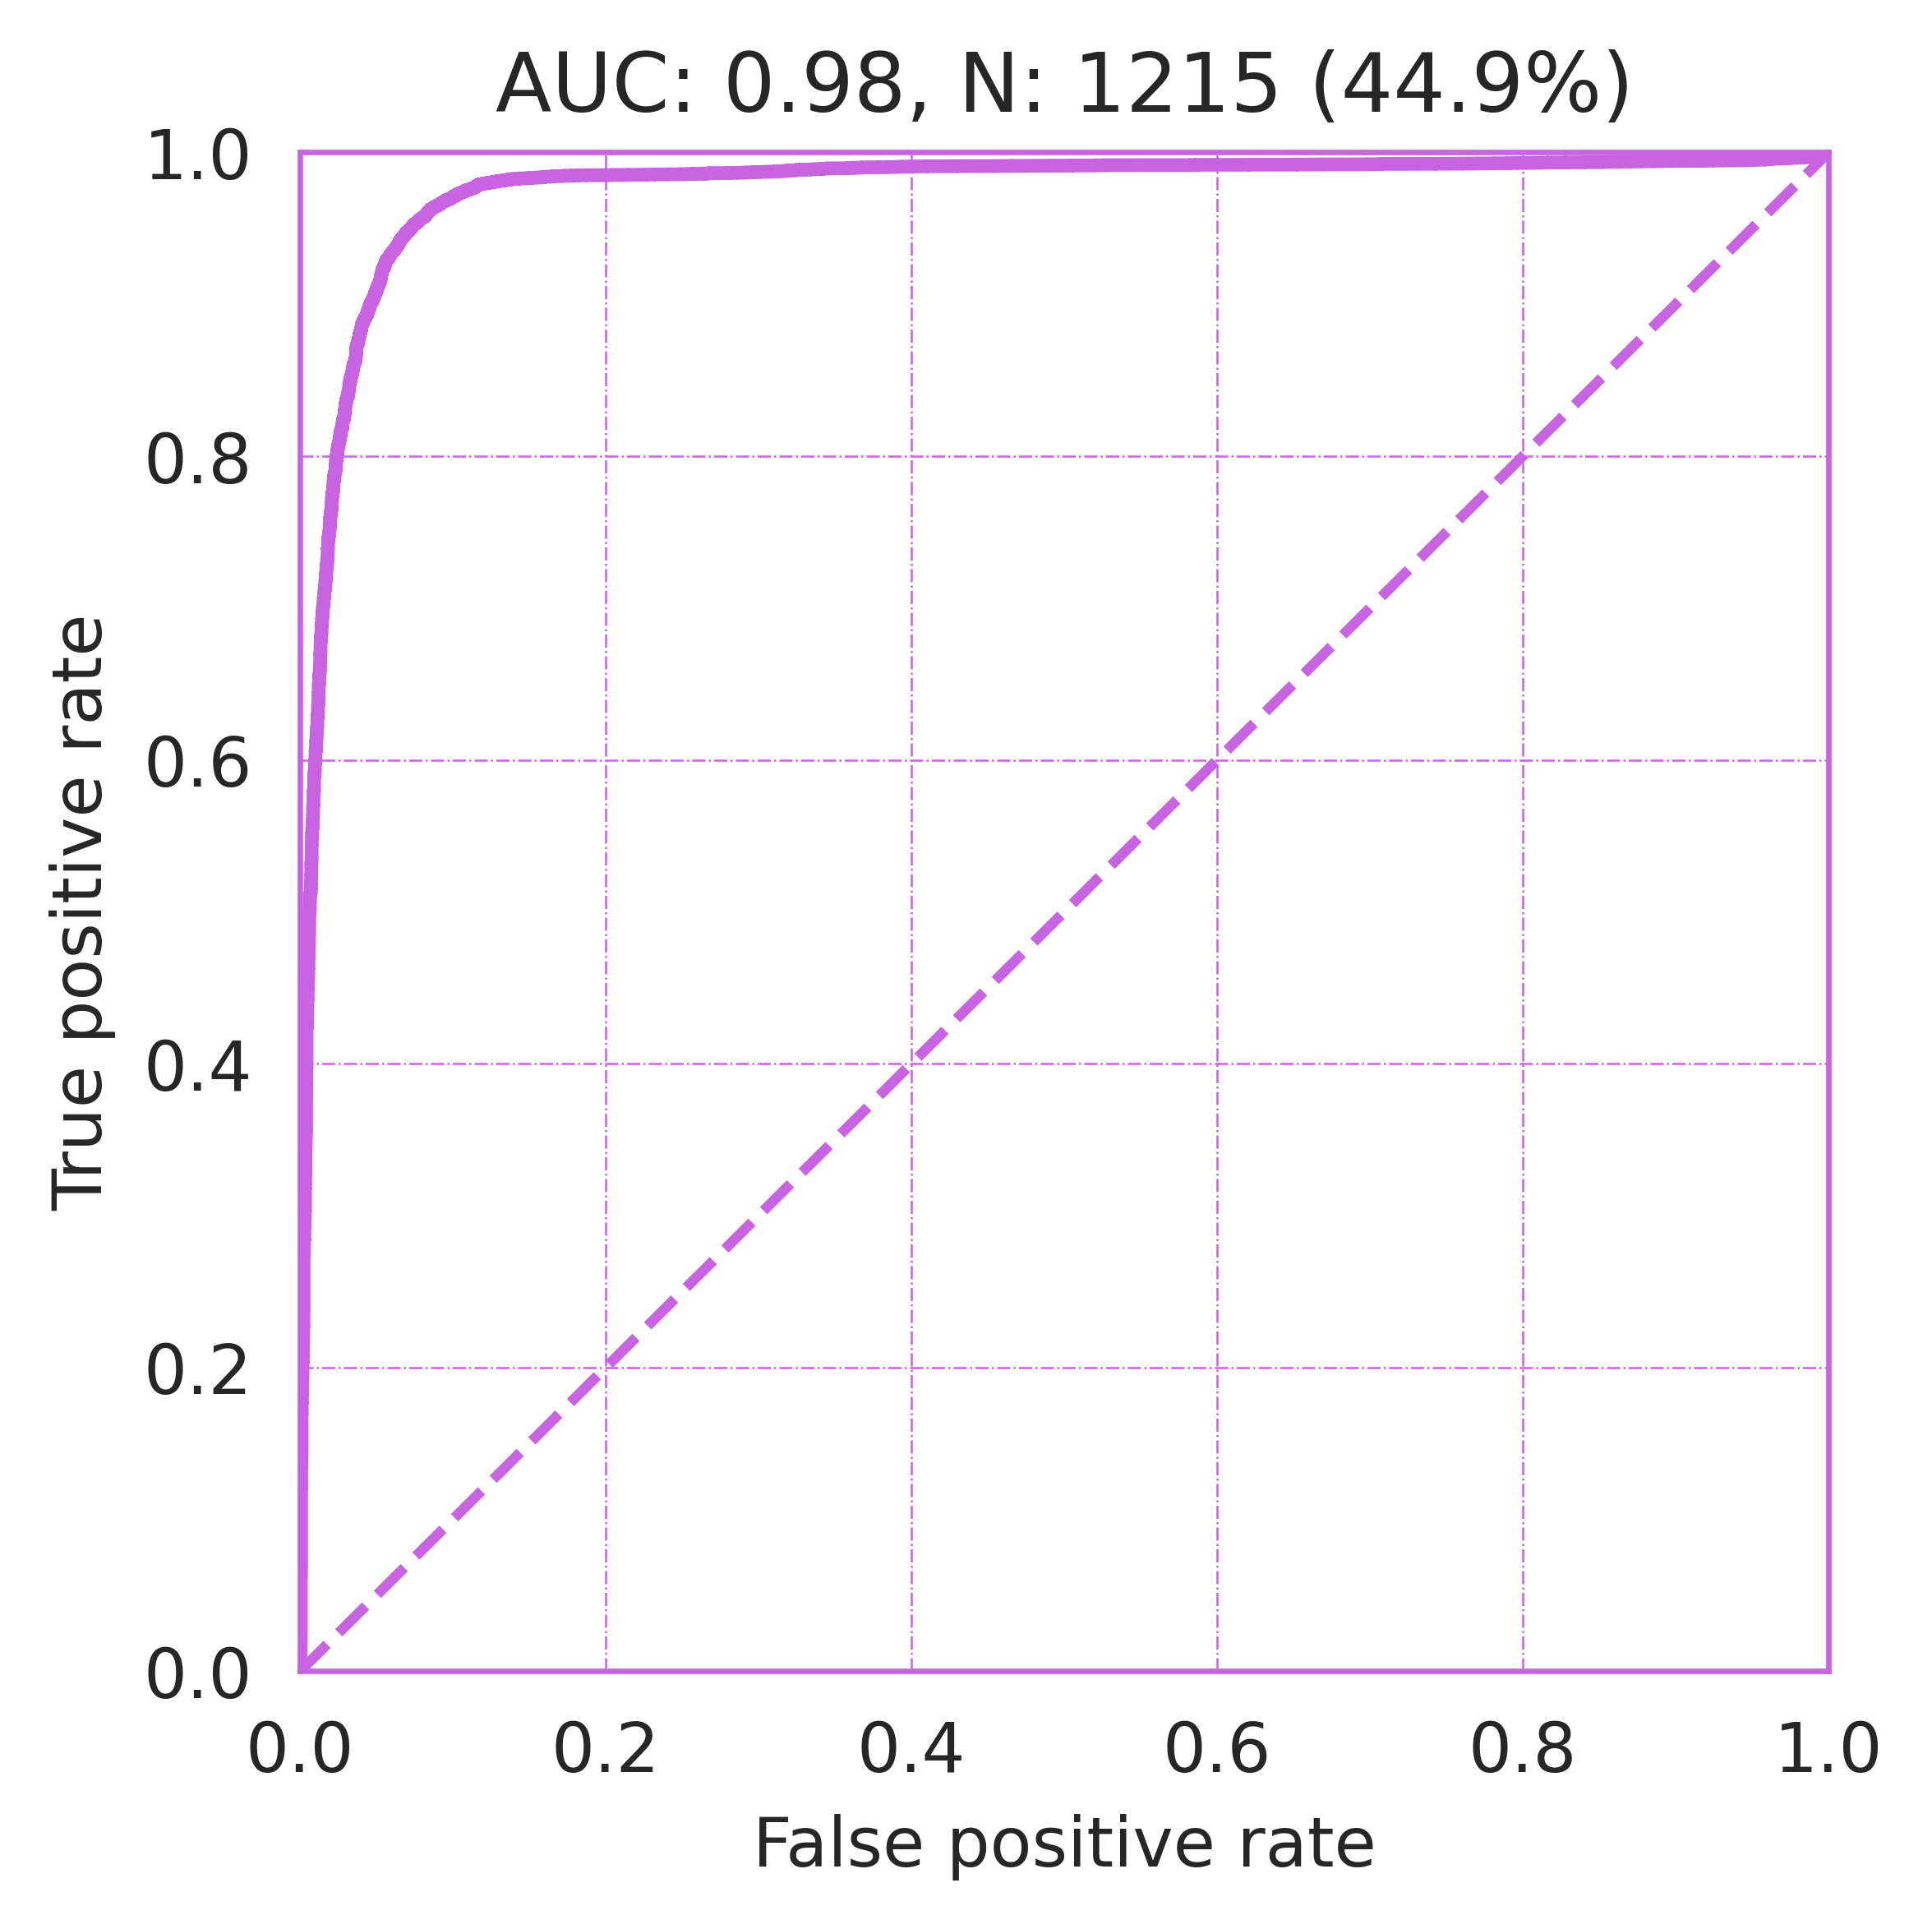

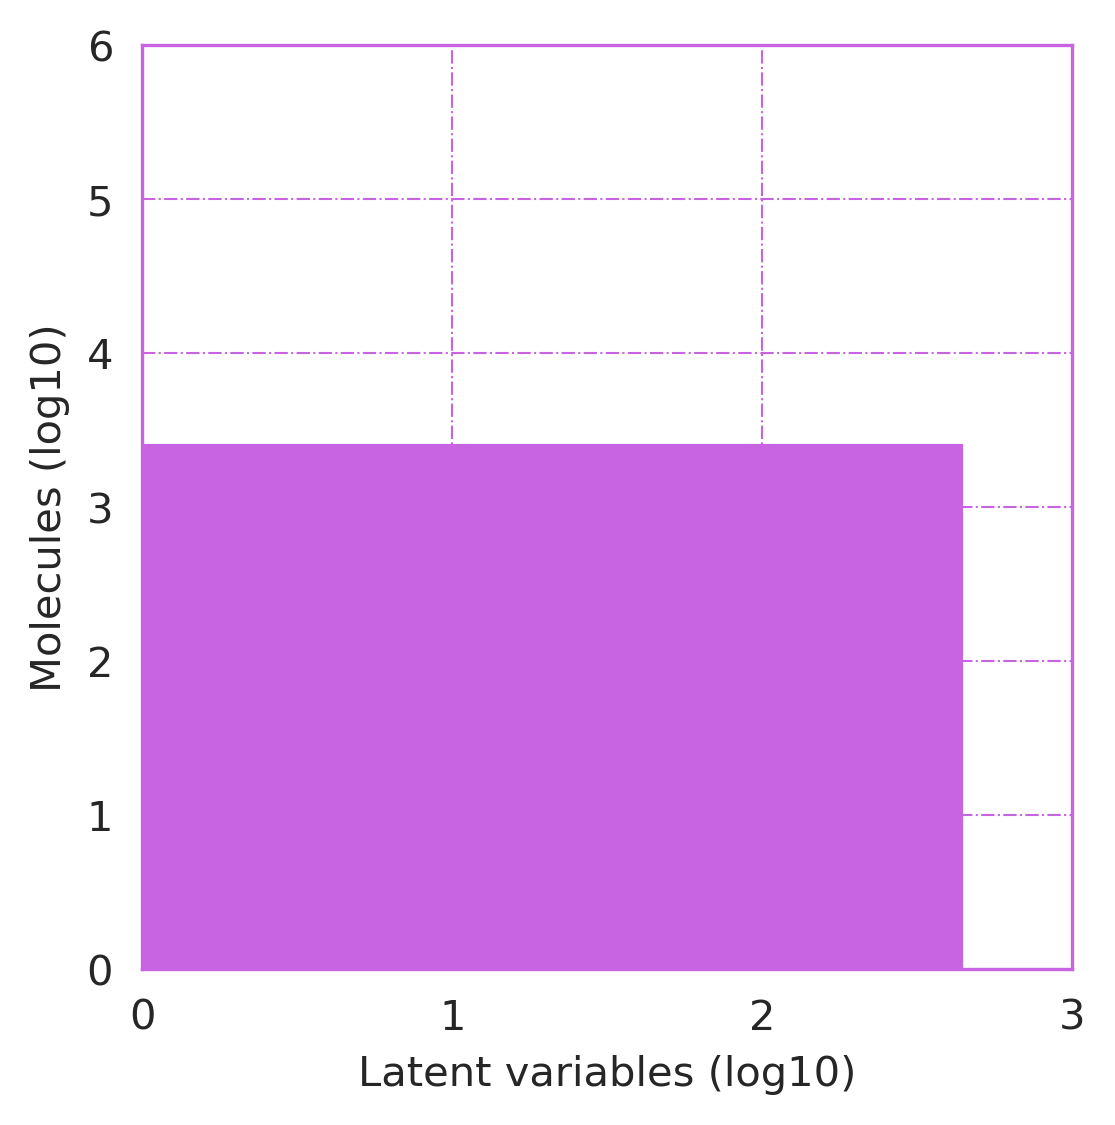

In [8]:
# Dataset Name
dataset = 'B1.002'

# Instantiation of sign0
sign0 = cc_local.signature(dataset, 'sign0')

# Instantiation of sign1
sign1 = cc_local.signature(dataset, 'sign1')

# Cleaning both full and reference datasets. This is crucial!
sign1.clear_all()

# Fitting sign1
sign1.fit(sign0)

In [9]:
sign1.shape

(5826, 438)

2024-04-04 16:19:57,080 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign1
2024-04-04 16:19:57,082 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_B1
2024-04-04 16:19:57,491 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Computing or retrieving data for canvas medium.
2024-04-04 16:19:57,492 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Skipping the following plots: []
2024-04-04 16:19:57,493 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Cosine distances
2024-04-04 16:19:57,499 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Subsampling signature
2024-04-04 16:19:57,584 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Full dataset sampled (n=5826)
2024-04-04 16:19:57,585 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching dataset V
2024-04-04 16:19:57,8

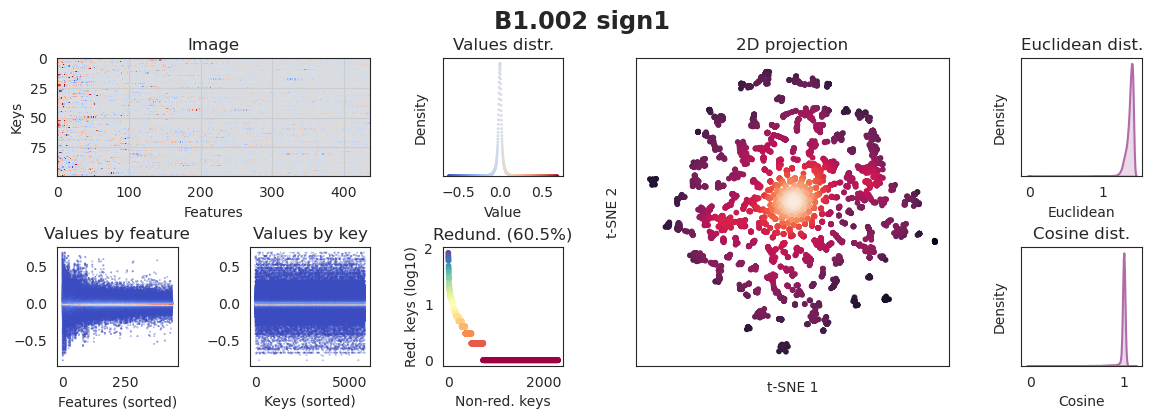

In [10]:
# Instantiation of sign1
sign1 = cc_local.signature(dataset, 'sign1')

# Instantiation of diag1 (diagnosis plots)
diag1 = sign1.diagnosis(ref_cctype='sign0')

# Plot medium & small diagnosis plots
diag1.canvas(size='medium', savefig=True, savefig_kwargs={'dpi': 300})
diag1.canvas(size='small', savefig=True, savefig_kwargs={'dpi': 300})

In [11]:
# Instantiation of sign1
sign1 = cc_local.signature(dataset, 'sign1')

# Instantiation of neig1
neig1 = cc_local.get_signature("neig1", "full", dataset)  # It will take the reference anyway...

# Cleaning both full and reference. This is crucial!
neig1.clear_all()

# Fitting neig1
neig1.fit(sign1)

2024-04-04 16:32:00,597 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign1
2024-04-04 16:32:00,611 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/neig1
2024-04-04 16:32:00,628 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/neig1
2024-04-04 16:32:00,629 chemicalchecker.core.neig.neig [DEBUG   ] data_path: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/neig1/neig.h5
2024-04-04 16:32:00,634 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/reference/B/B1/B1.002/neig1
2024-04-04 16:32:00,651 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/acomajuncosa/Protocols/local_CC_B1/reference/B/B1/B1.002/neig1
2024-04-04 16:32:

In [12]:
neig1.shape

array([5826, 1000])

## sign2 ##

2024-04-04 16:32:05,473 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign1
2024-04-04 16:32:05,475 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/neig1
2024-04-04 16:32:05,476 chemicalchecker.core.neig.neig [DEBUG   ] signature path is: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/neig1
2024-04-04 16:32:05,477 chemicalchecker.core.neig.neig [DEBUG   ] data_path: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/neig1/neig.h5
2024-04-04 16:32:05,479 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign2
2024-04-04 16:32:05,491 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] New signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/reference/B/B1/B1.002/sign2
202

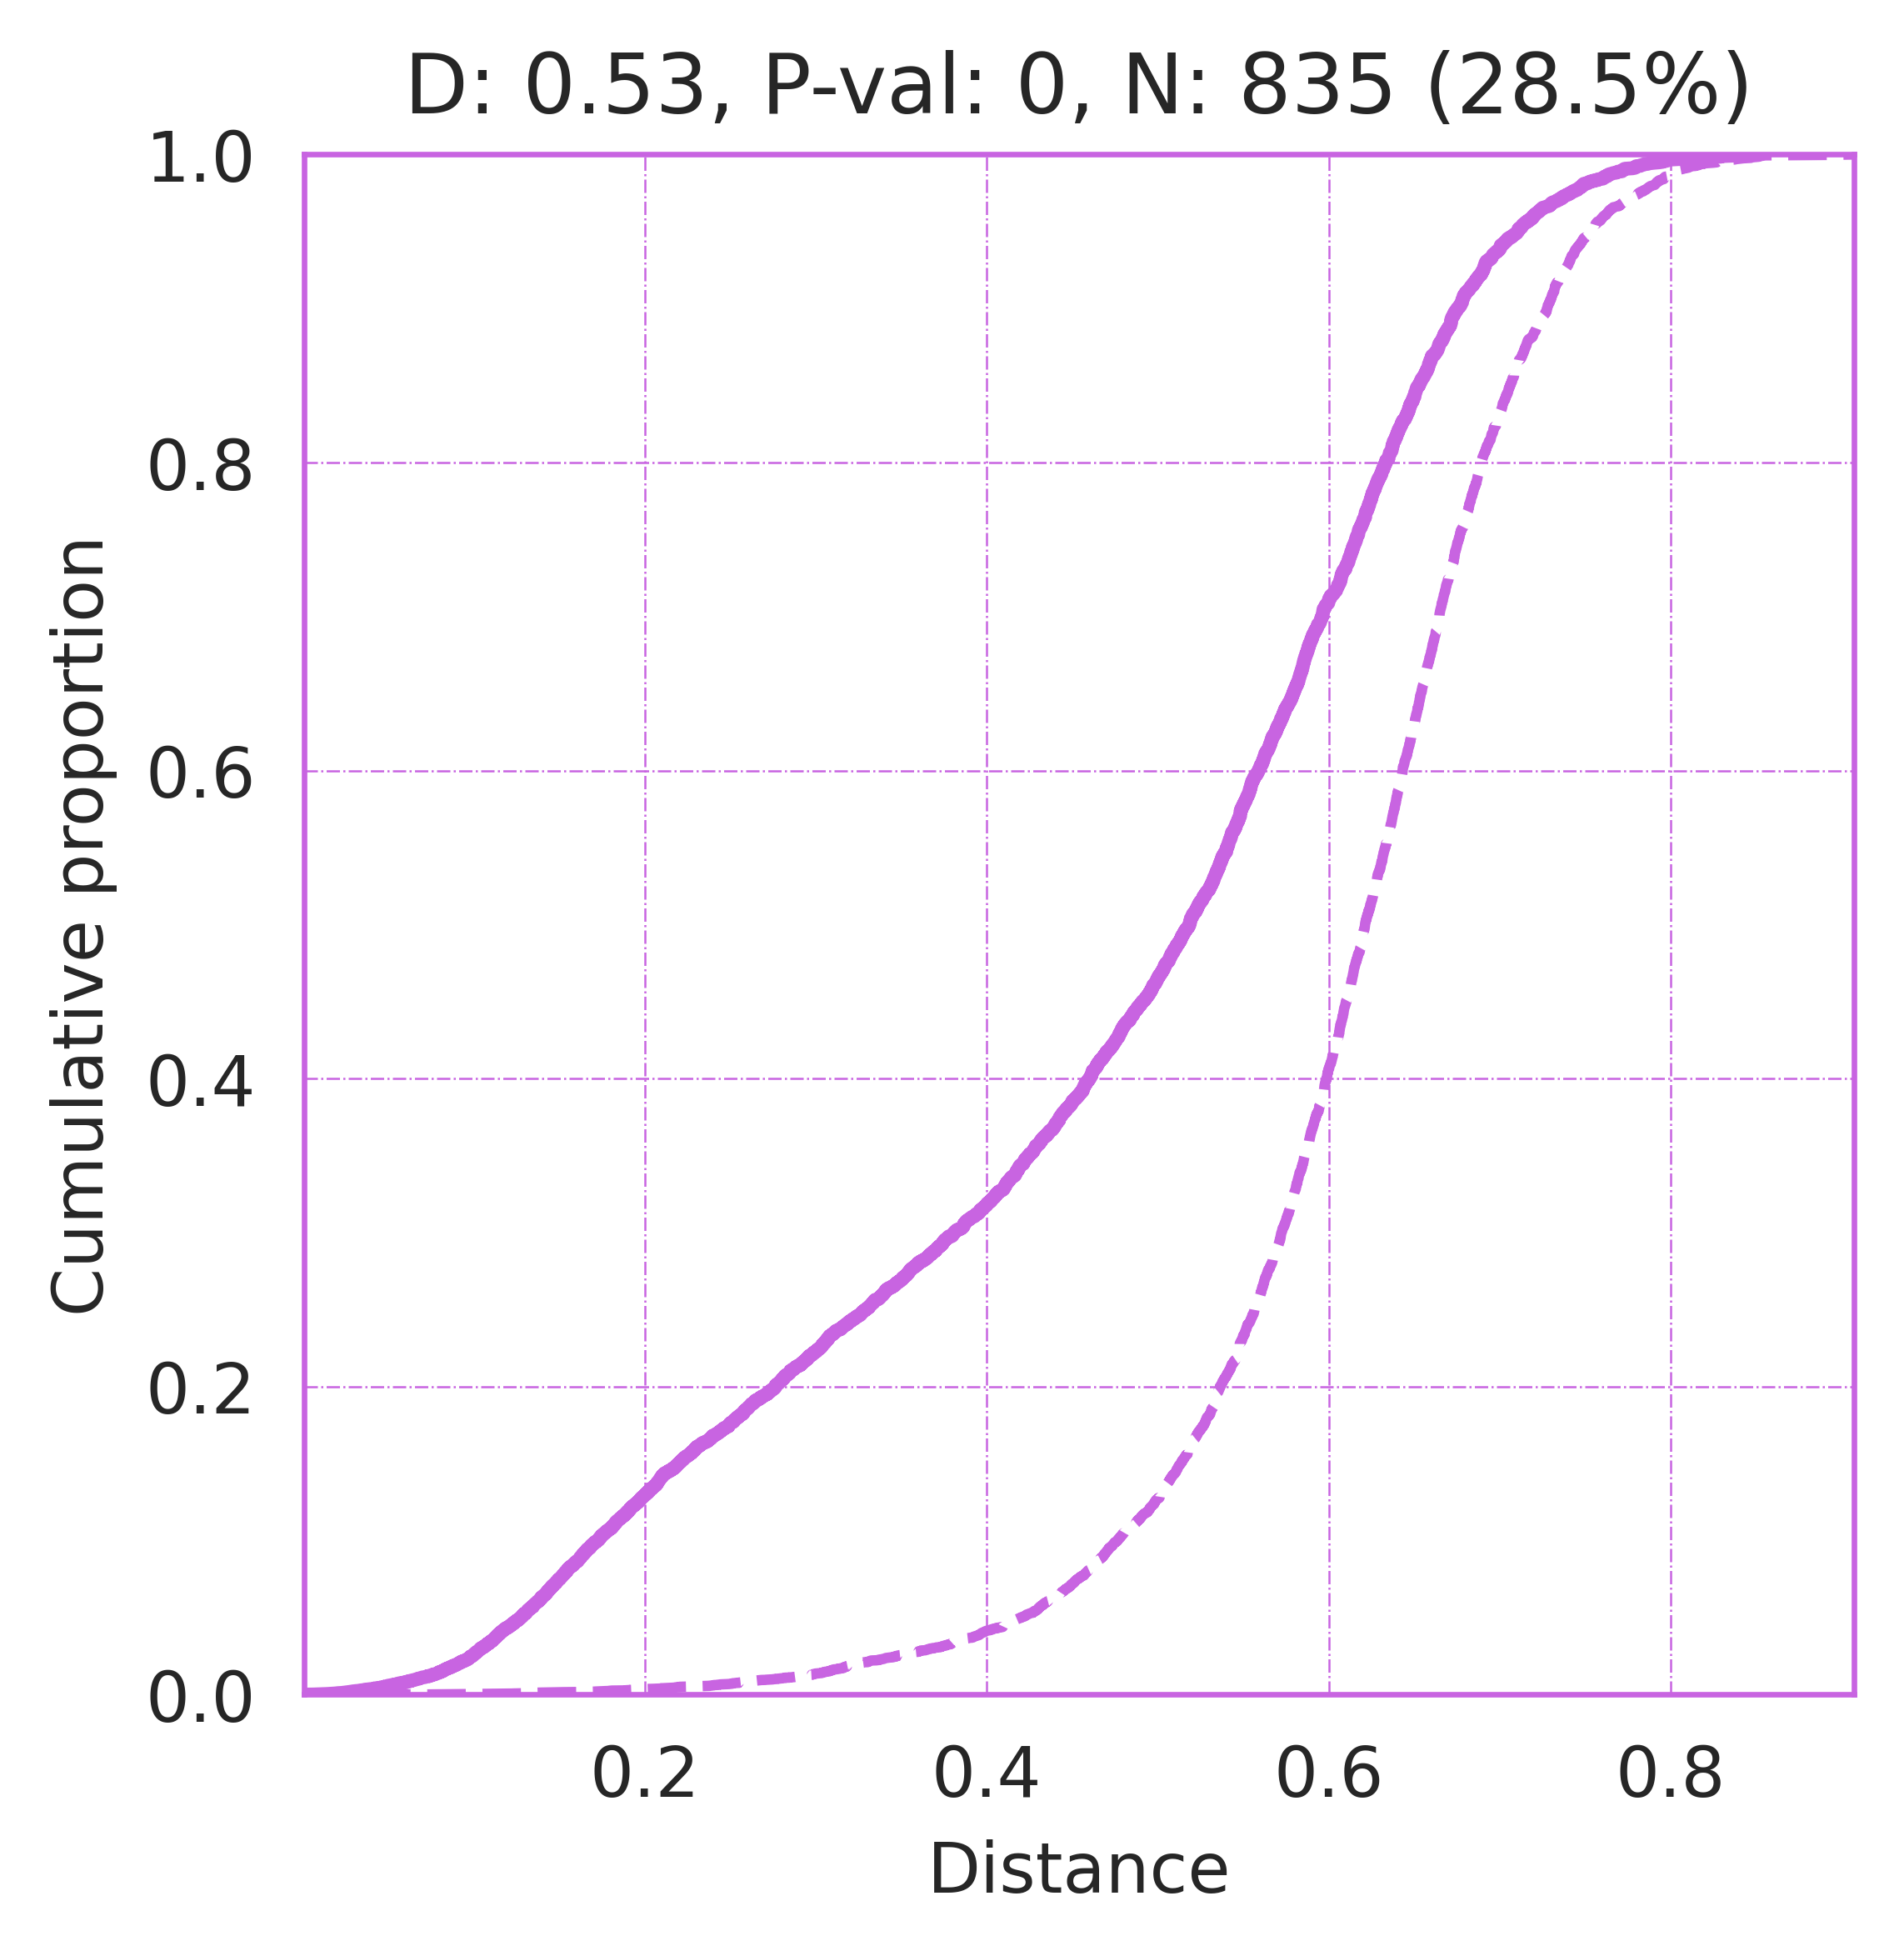

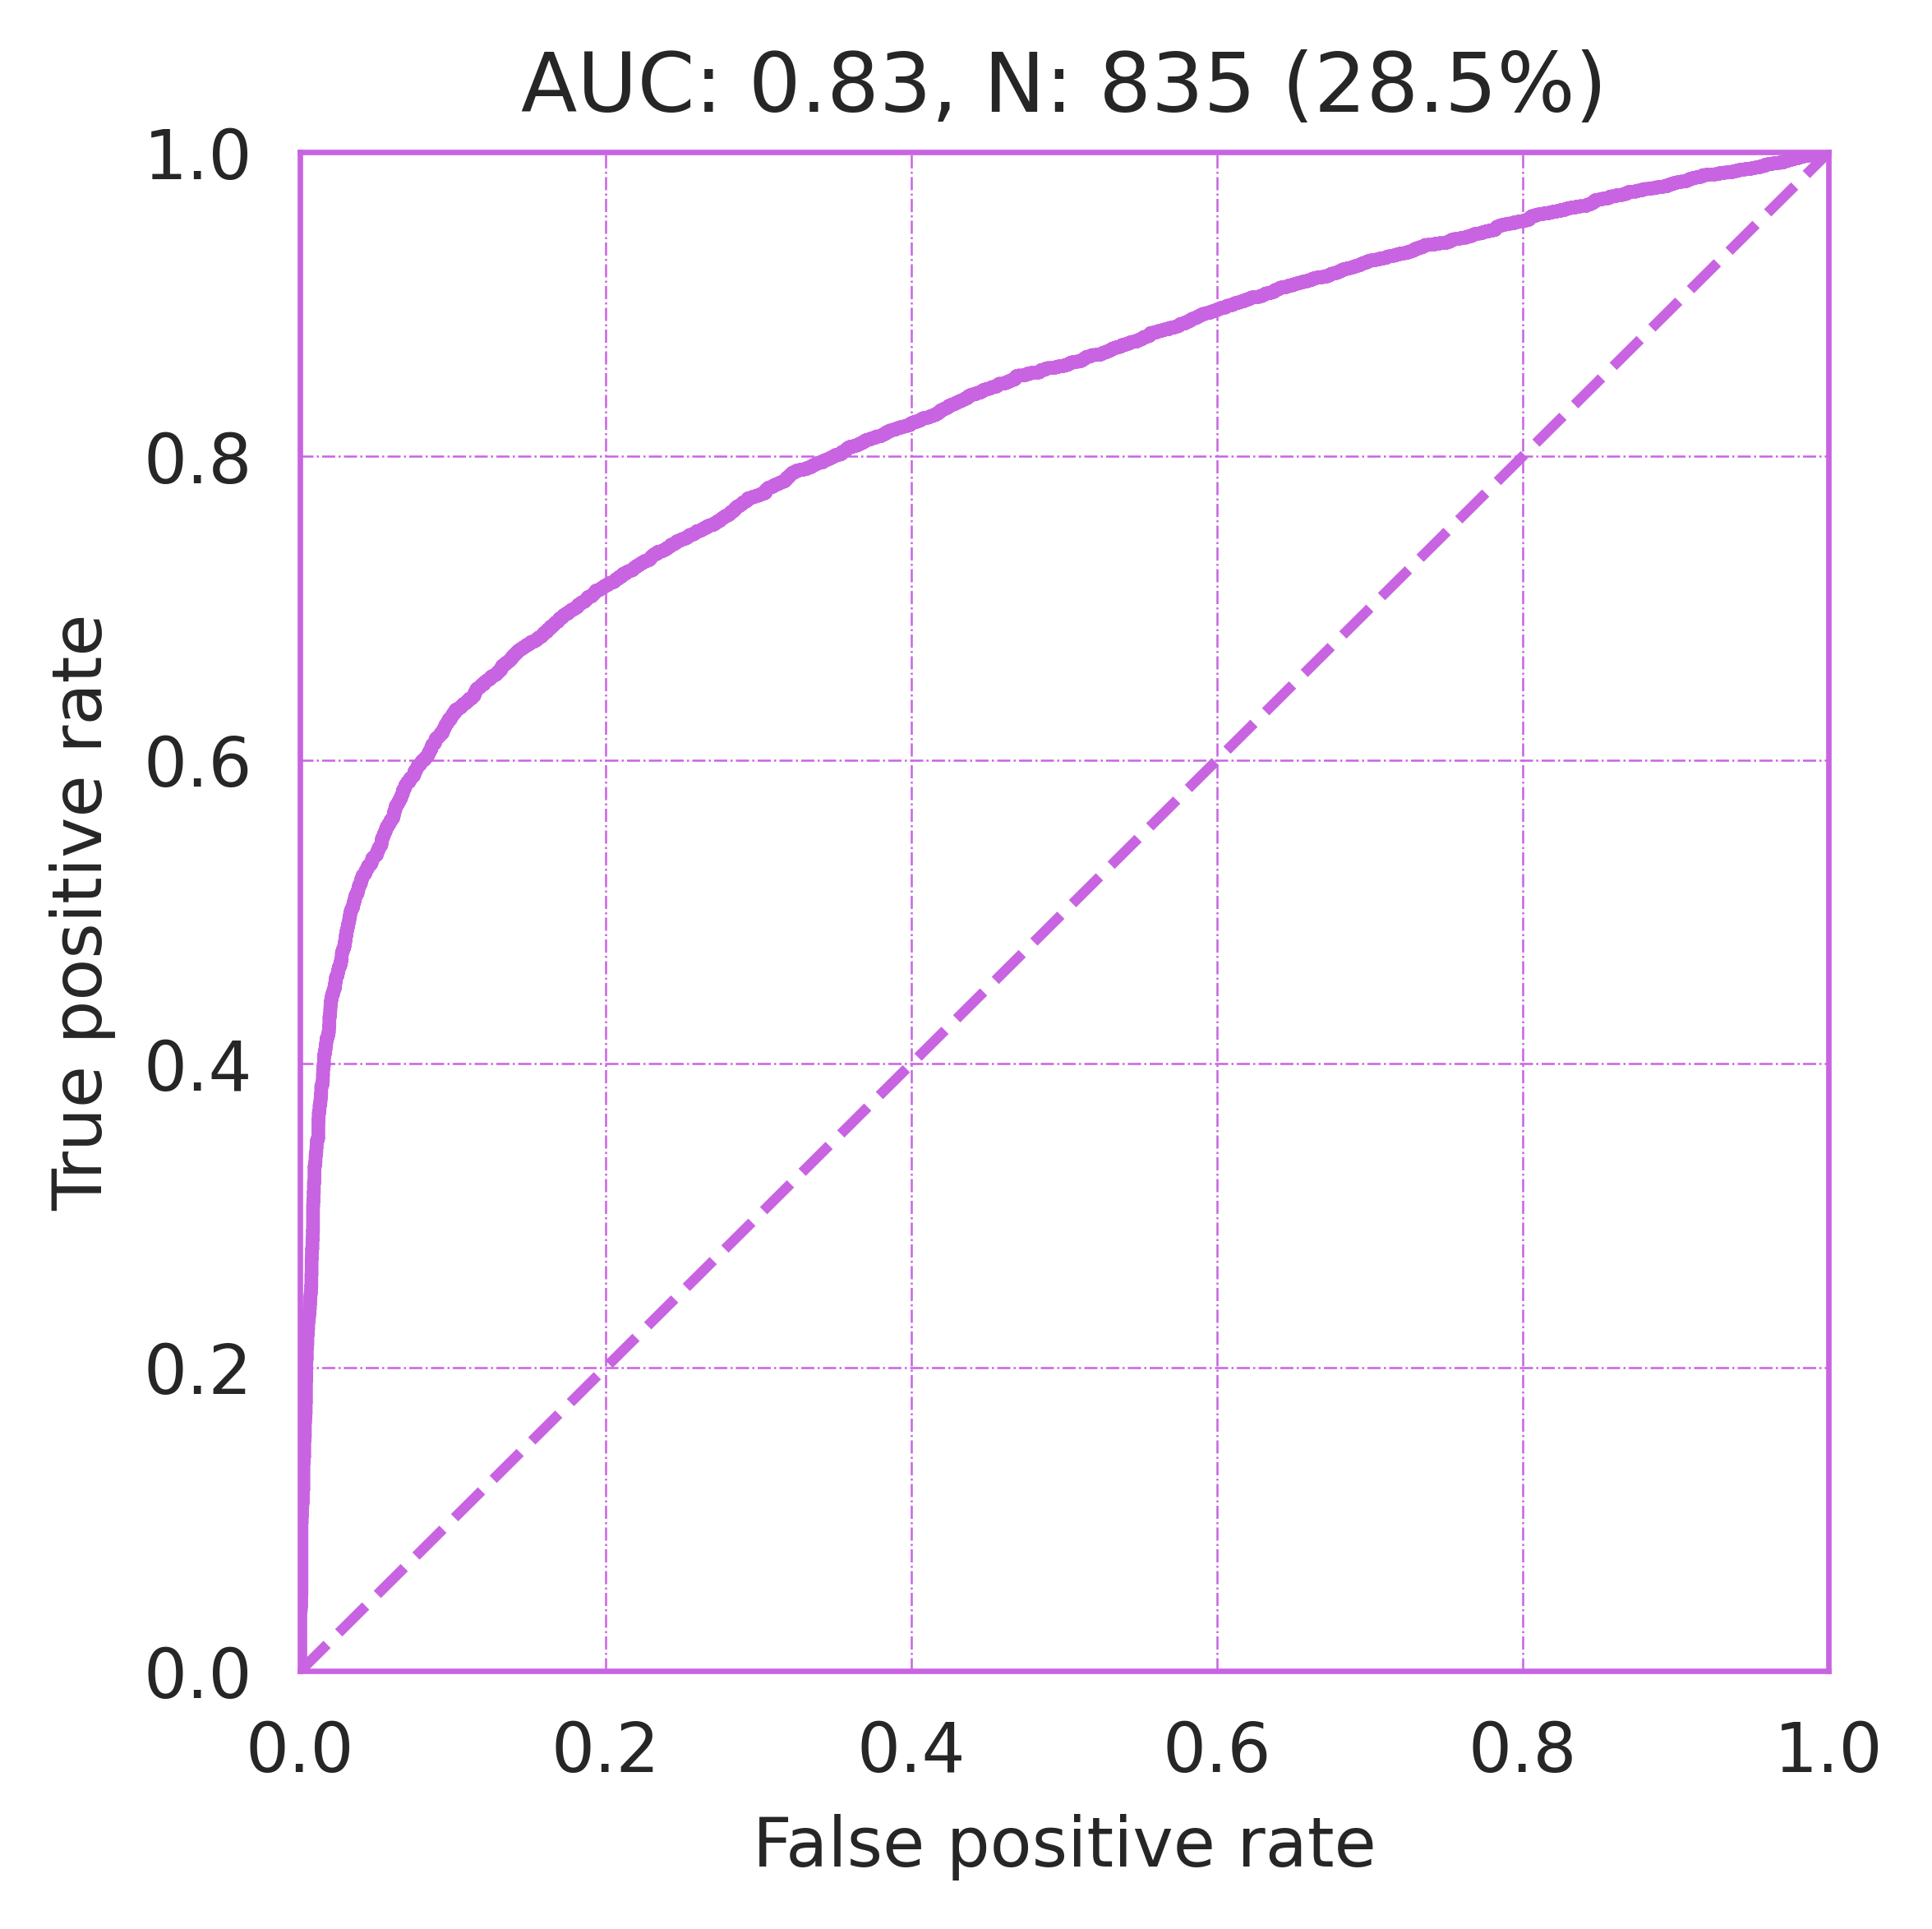

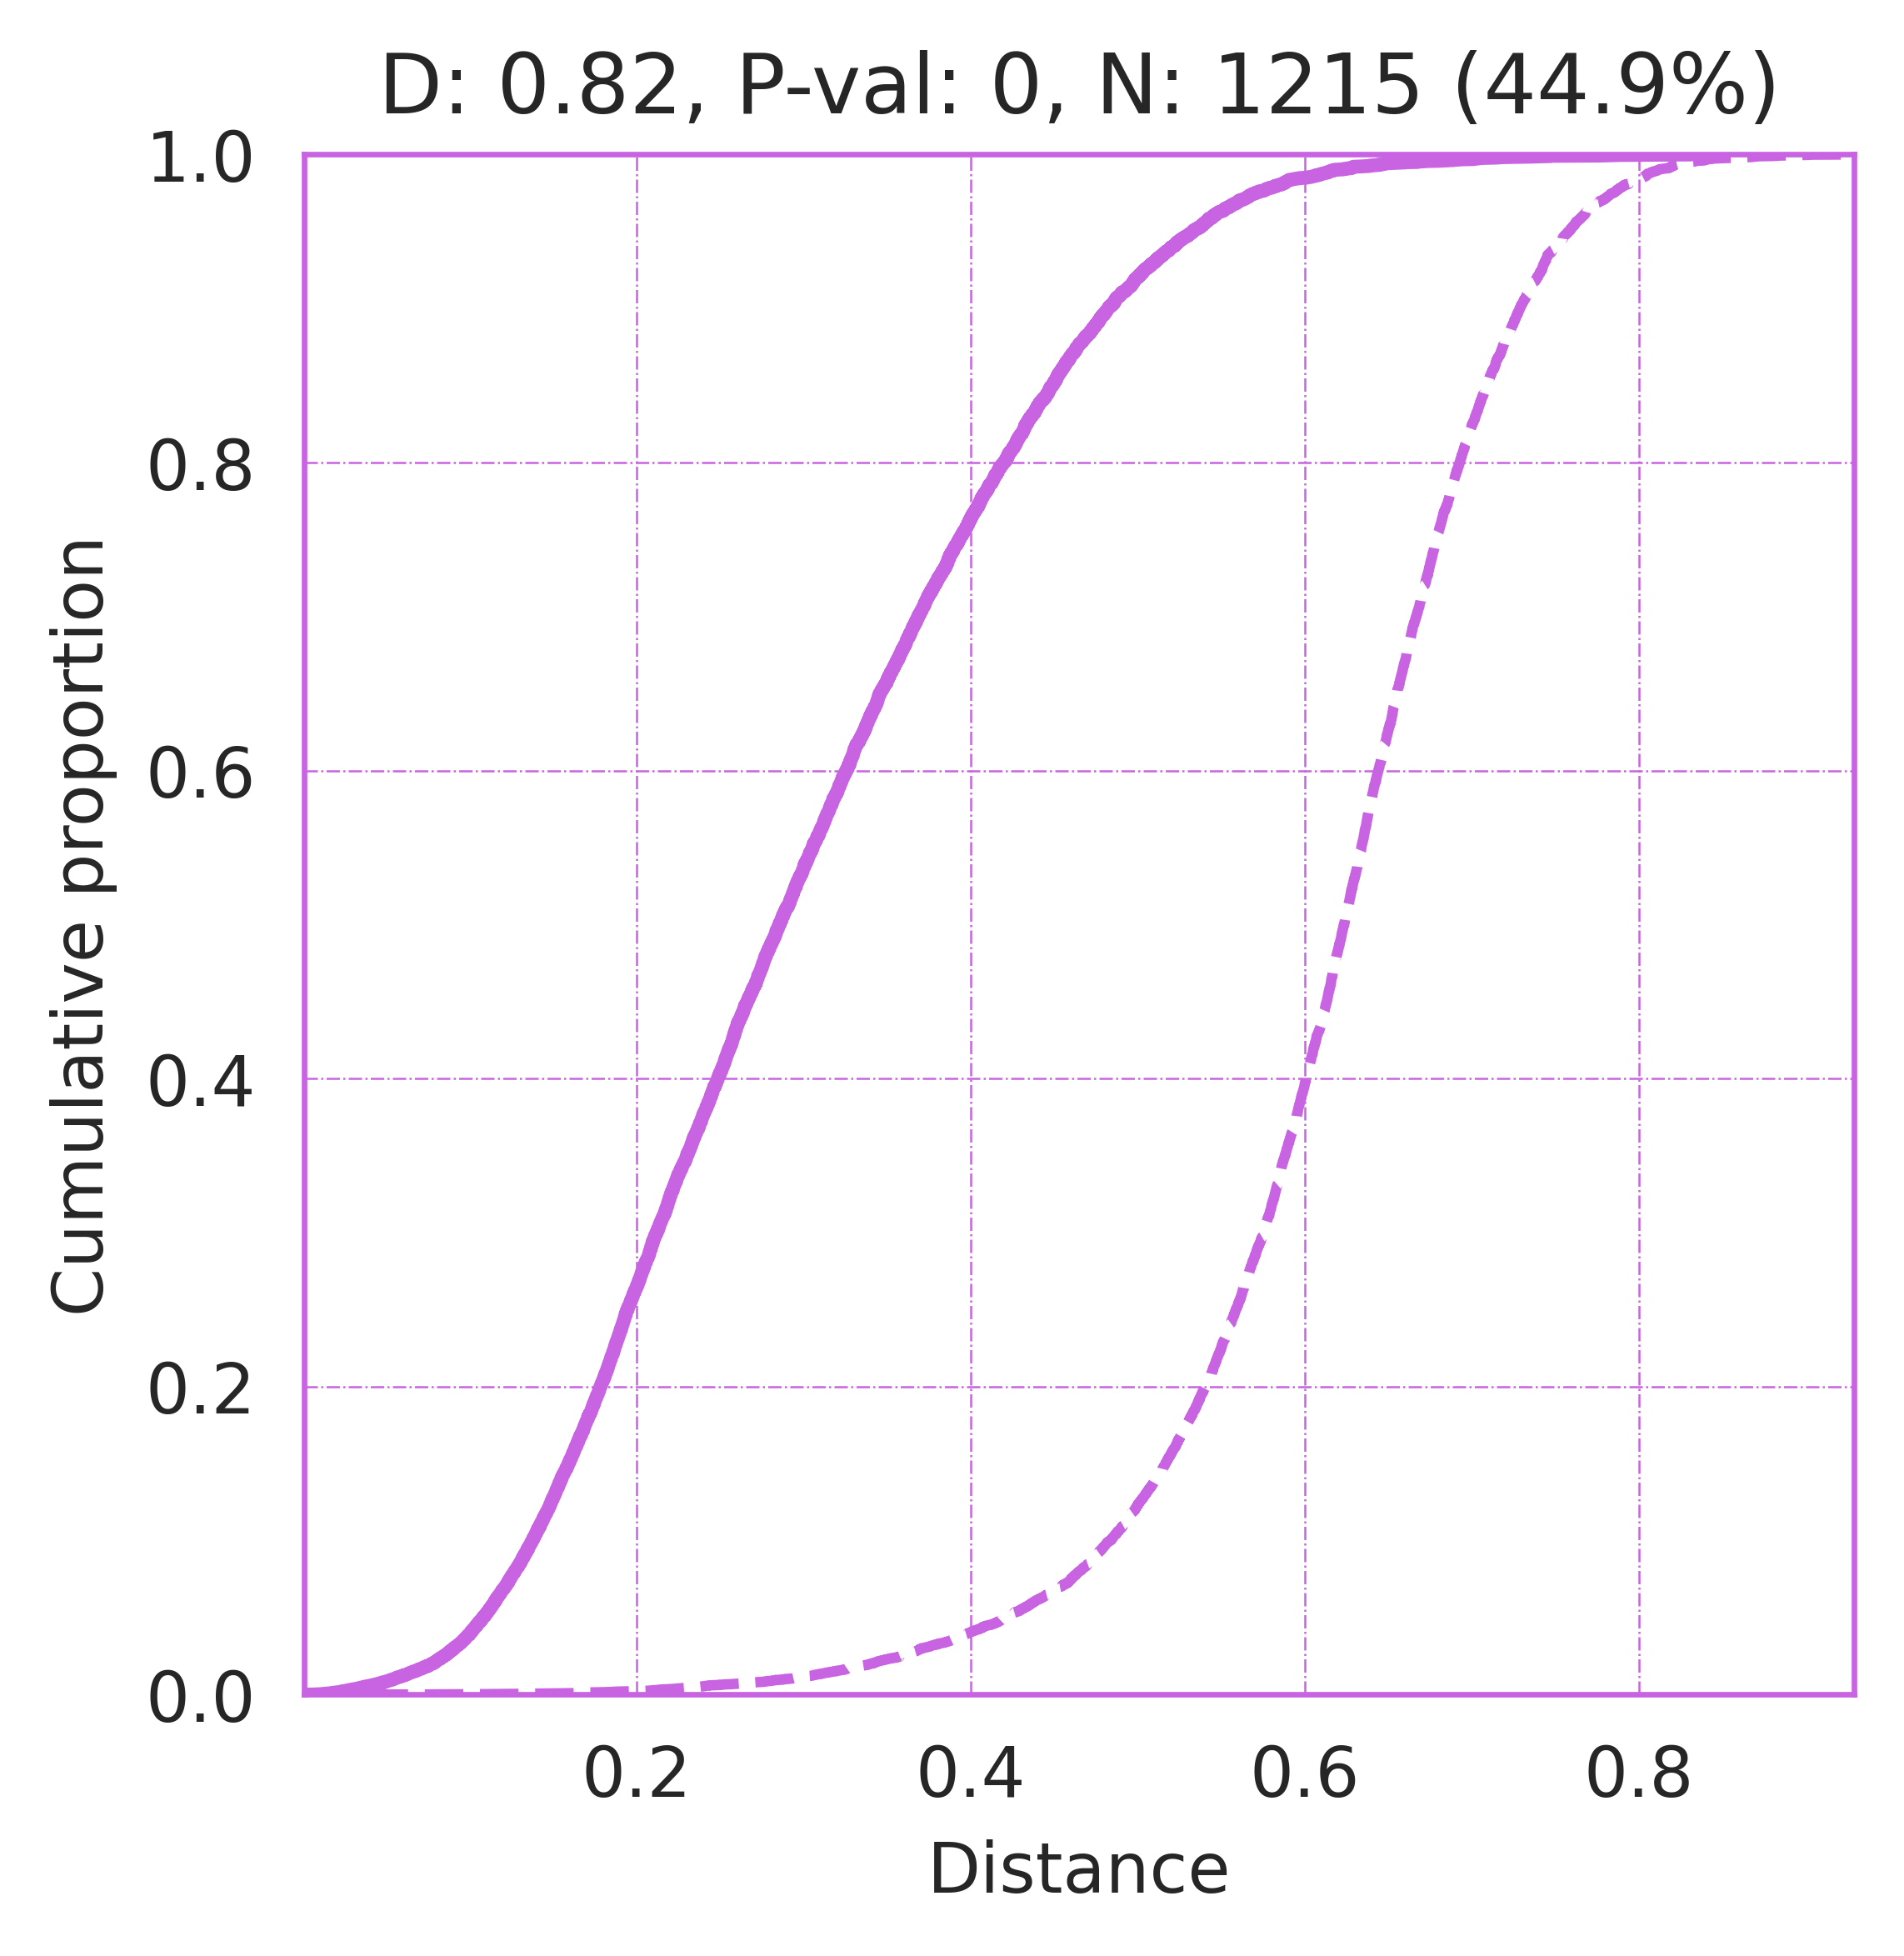

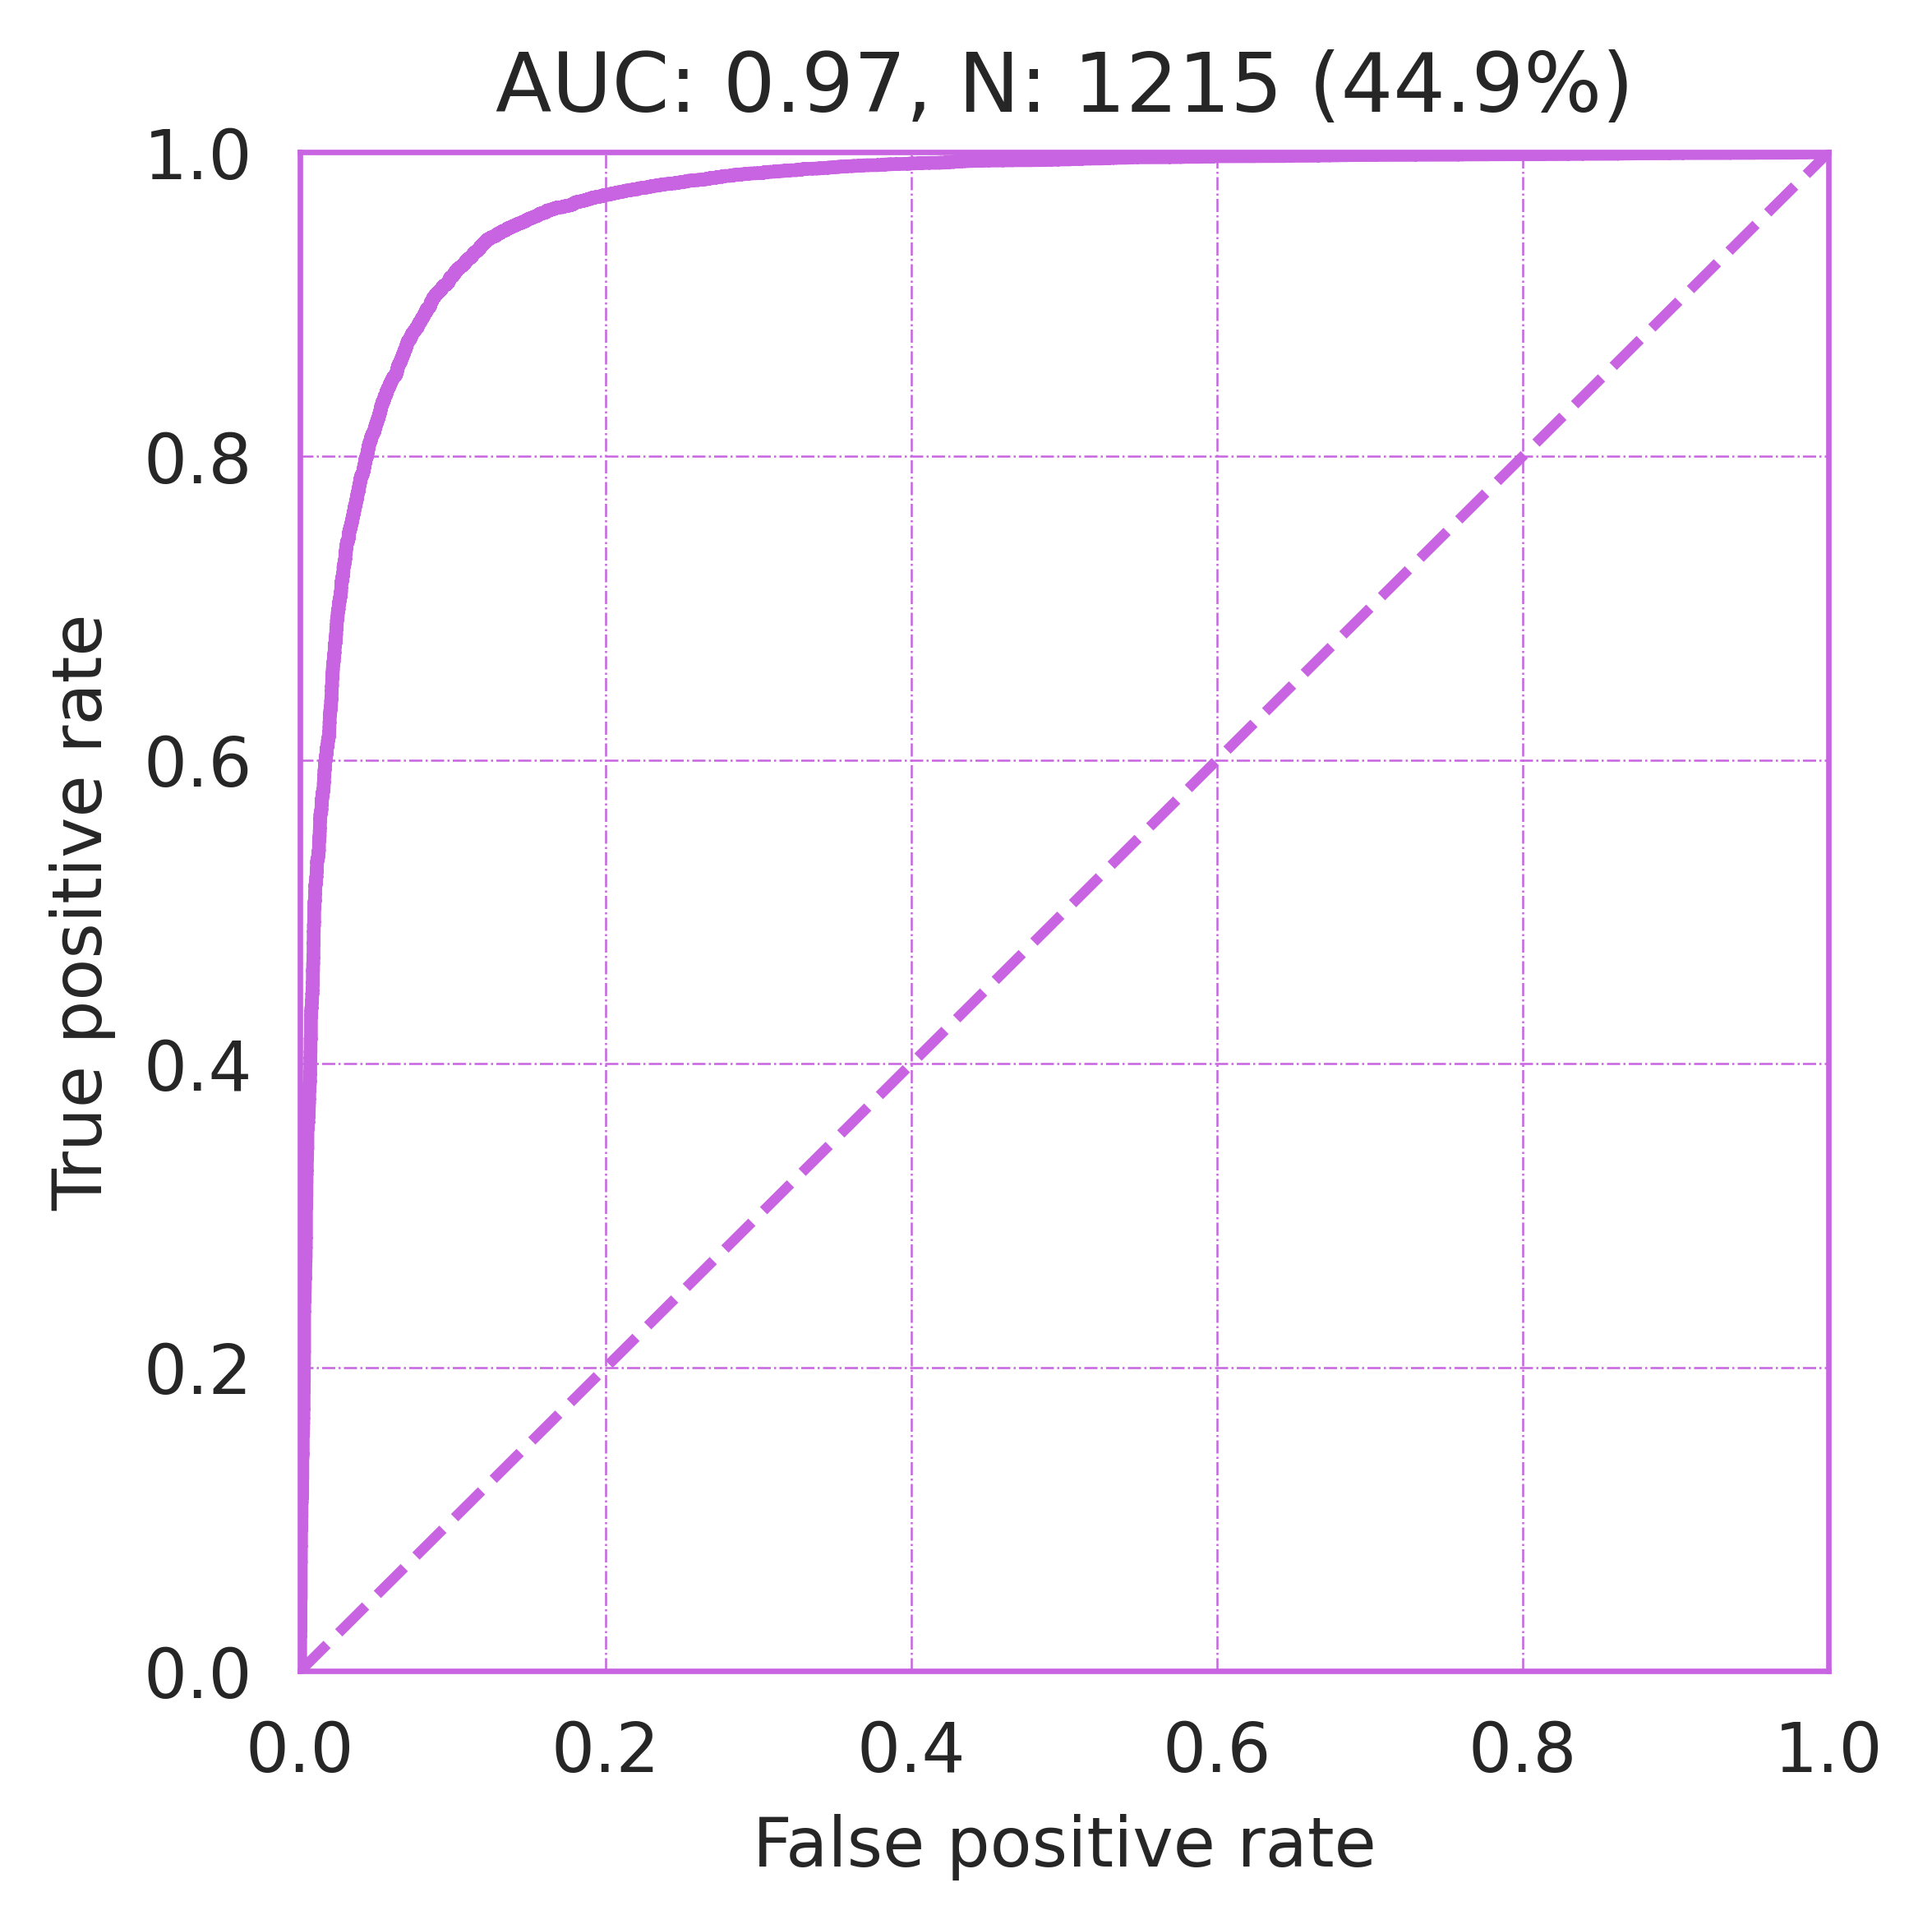

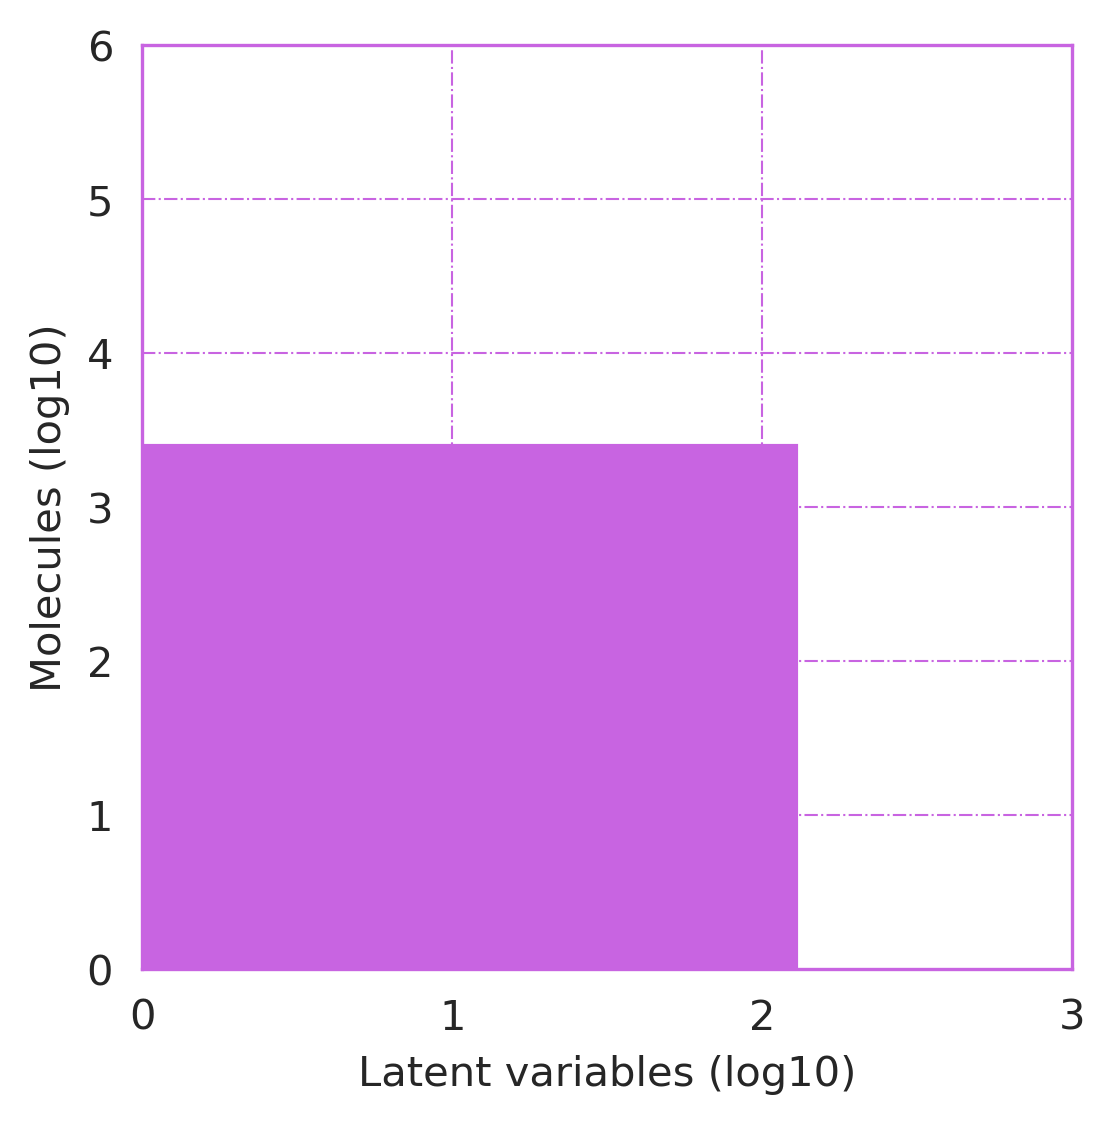

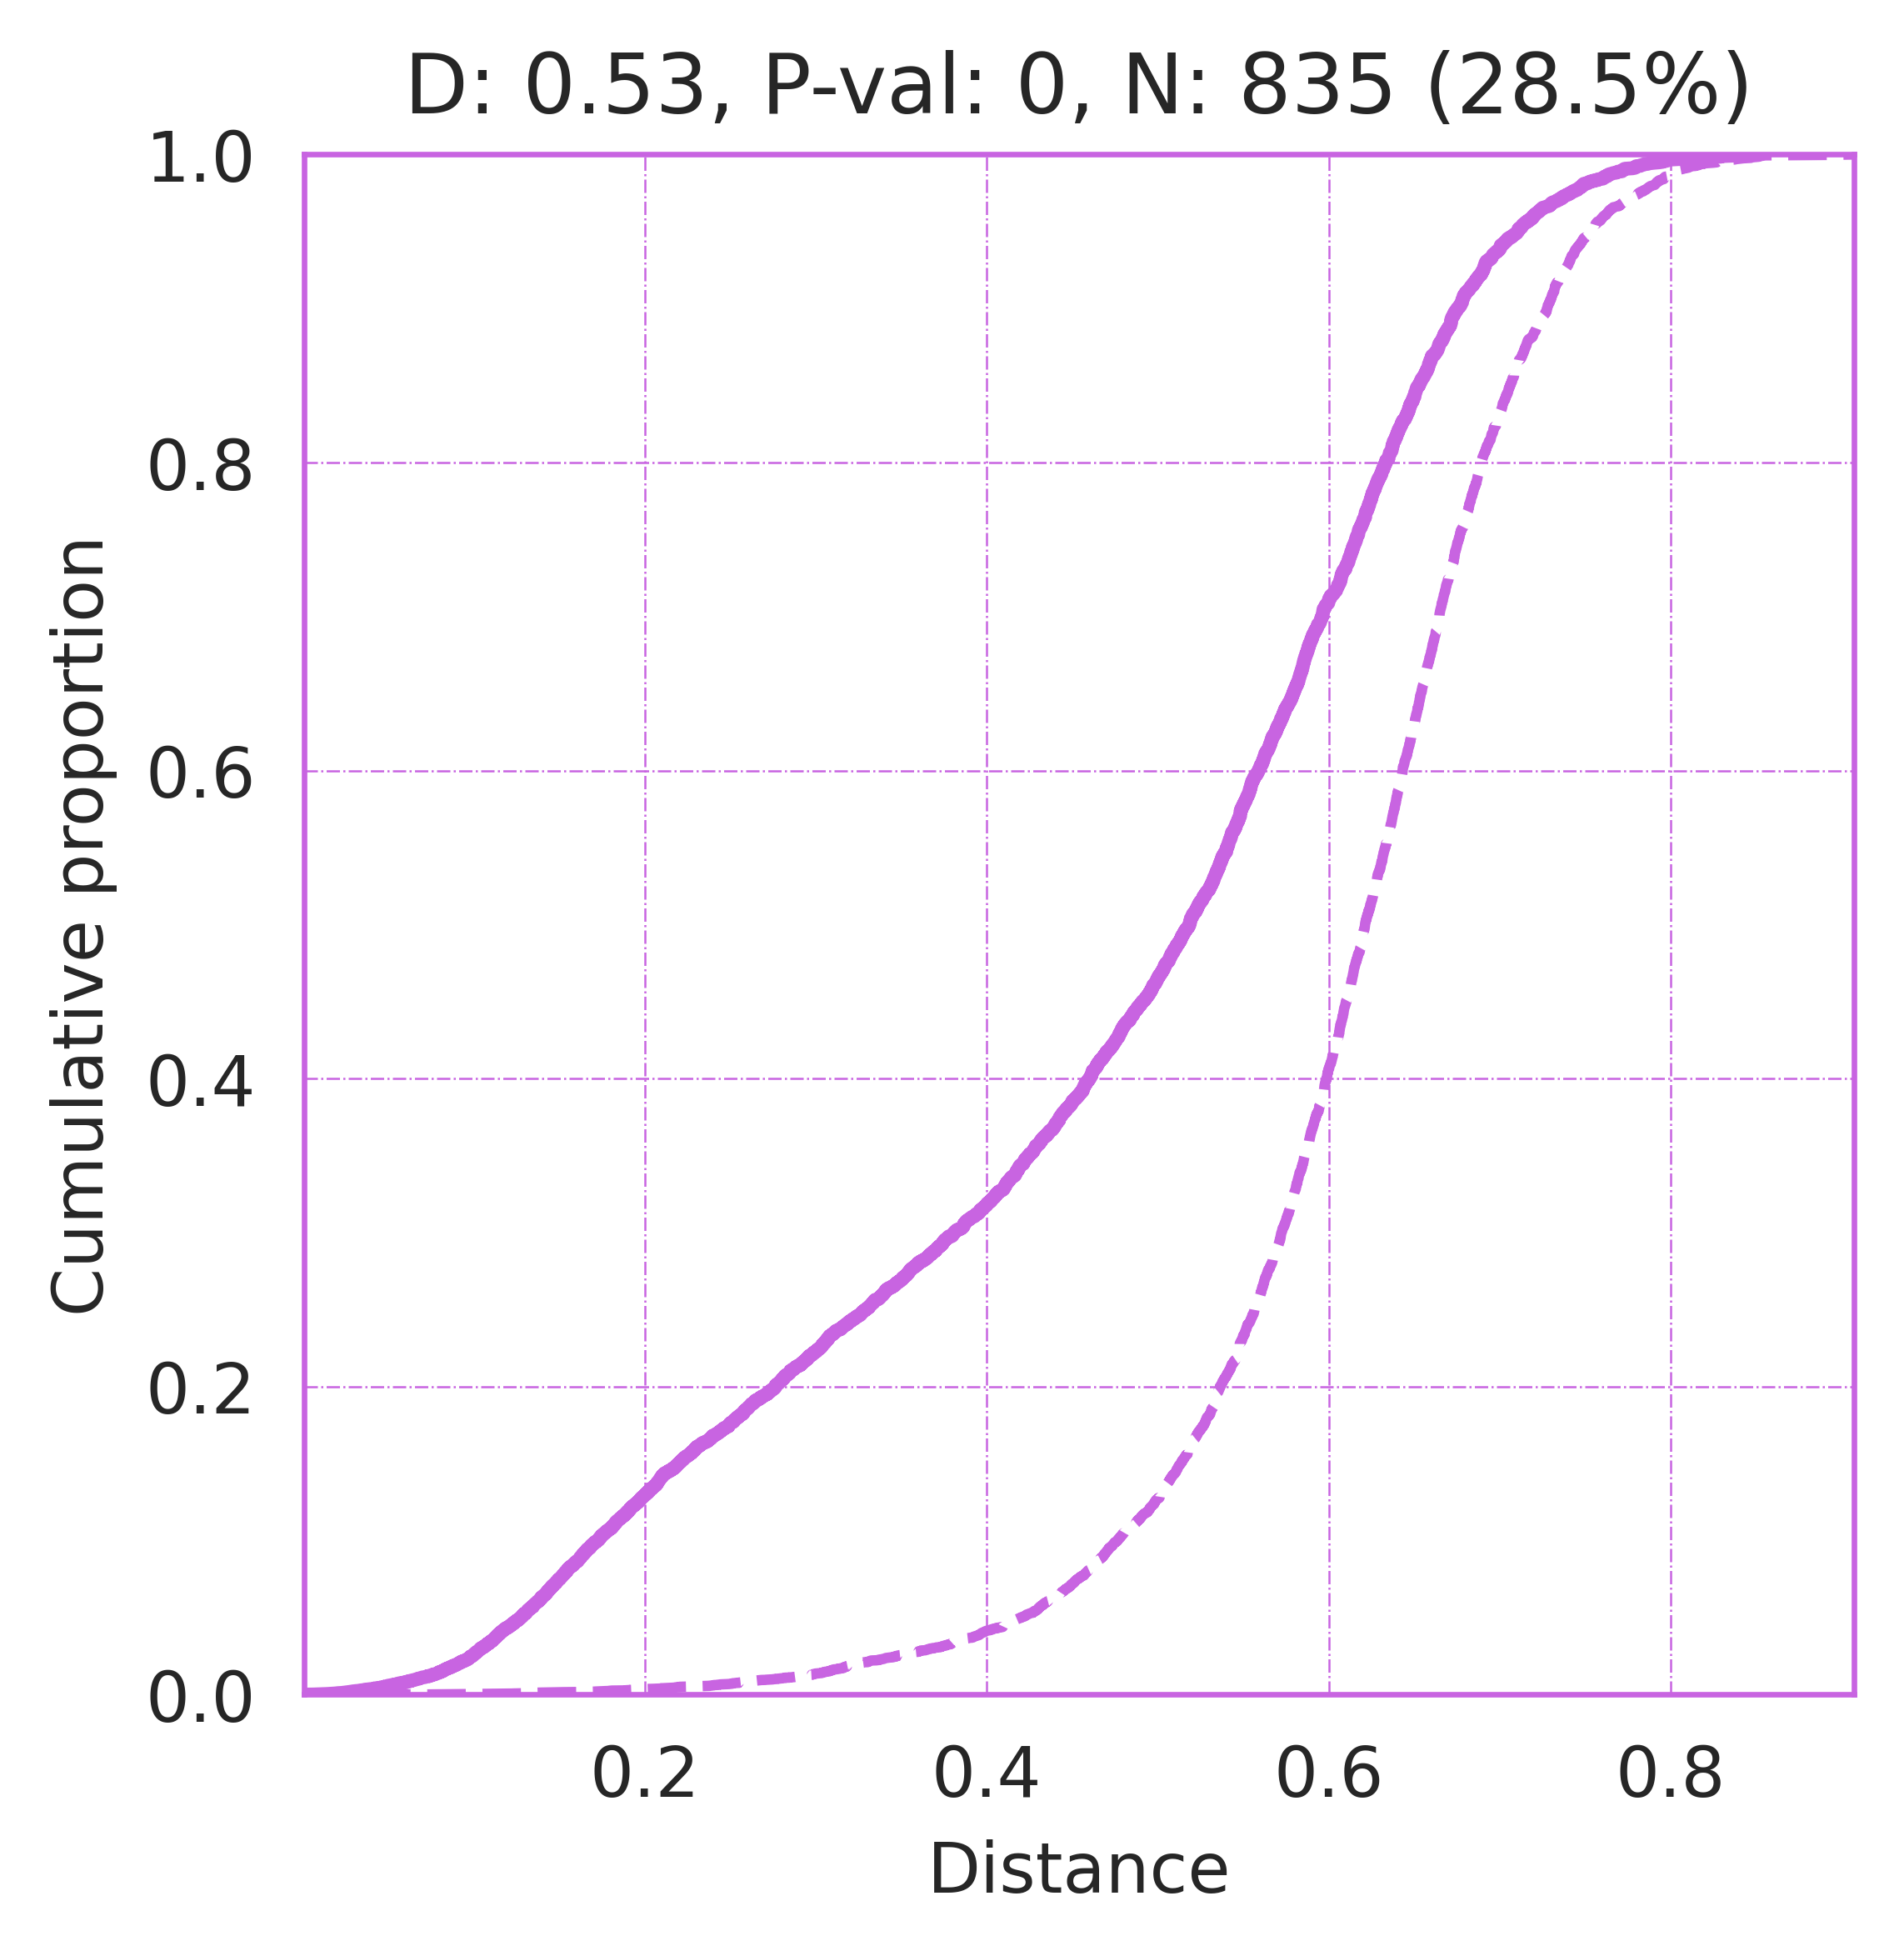

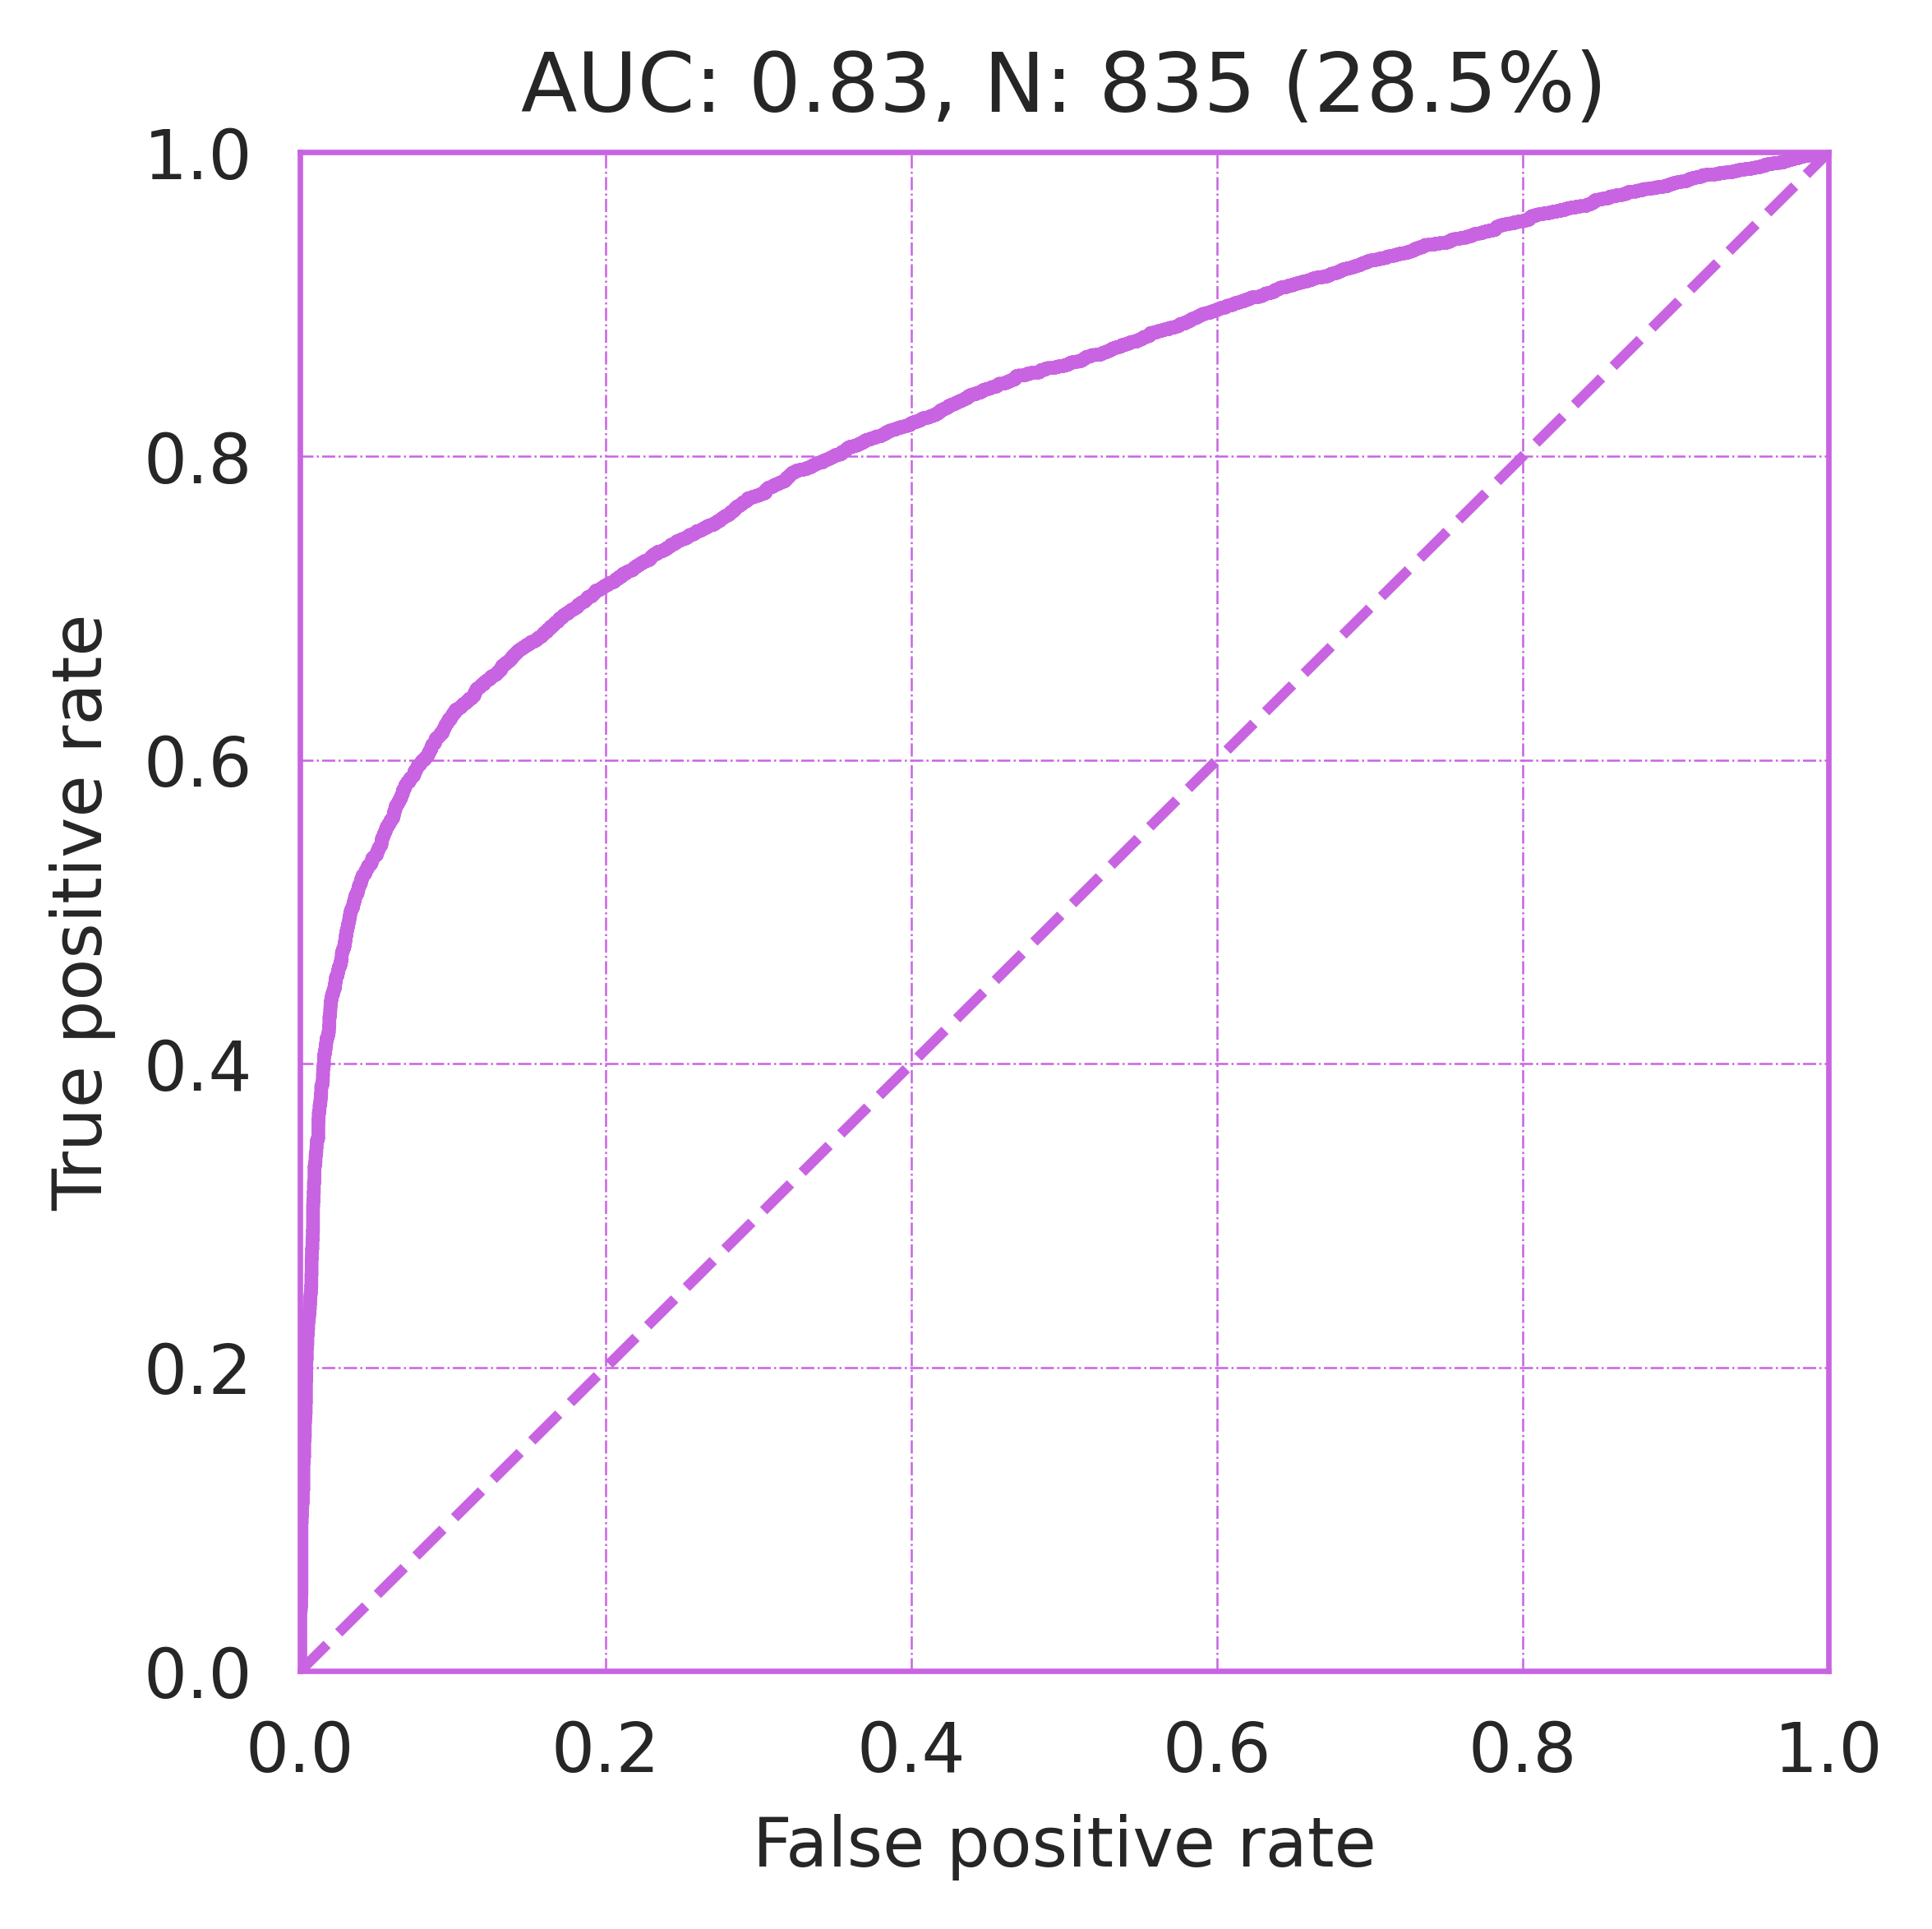

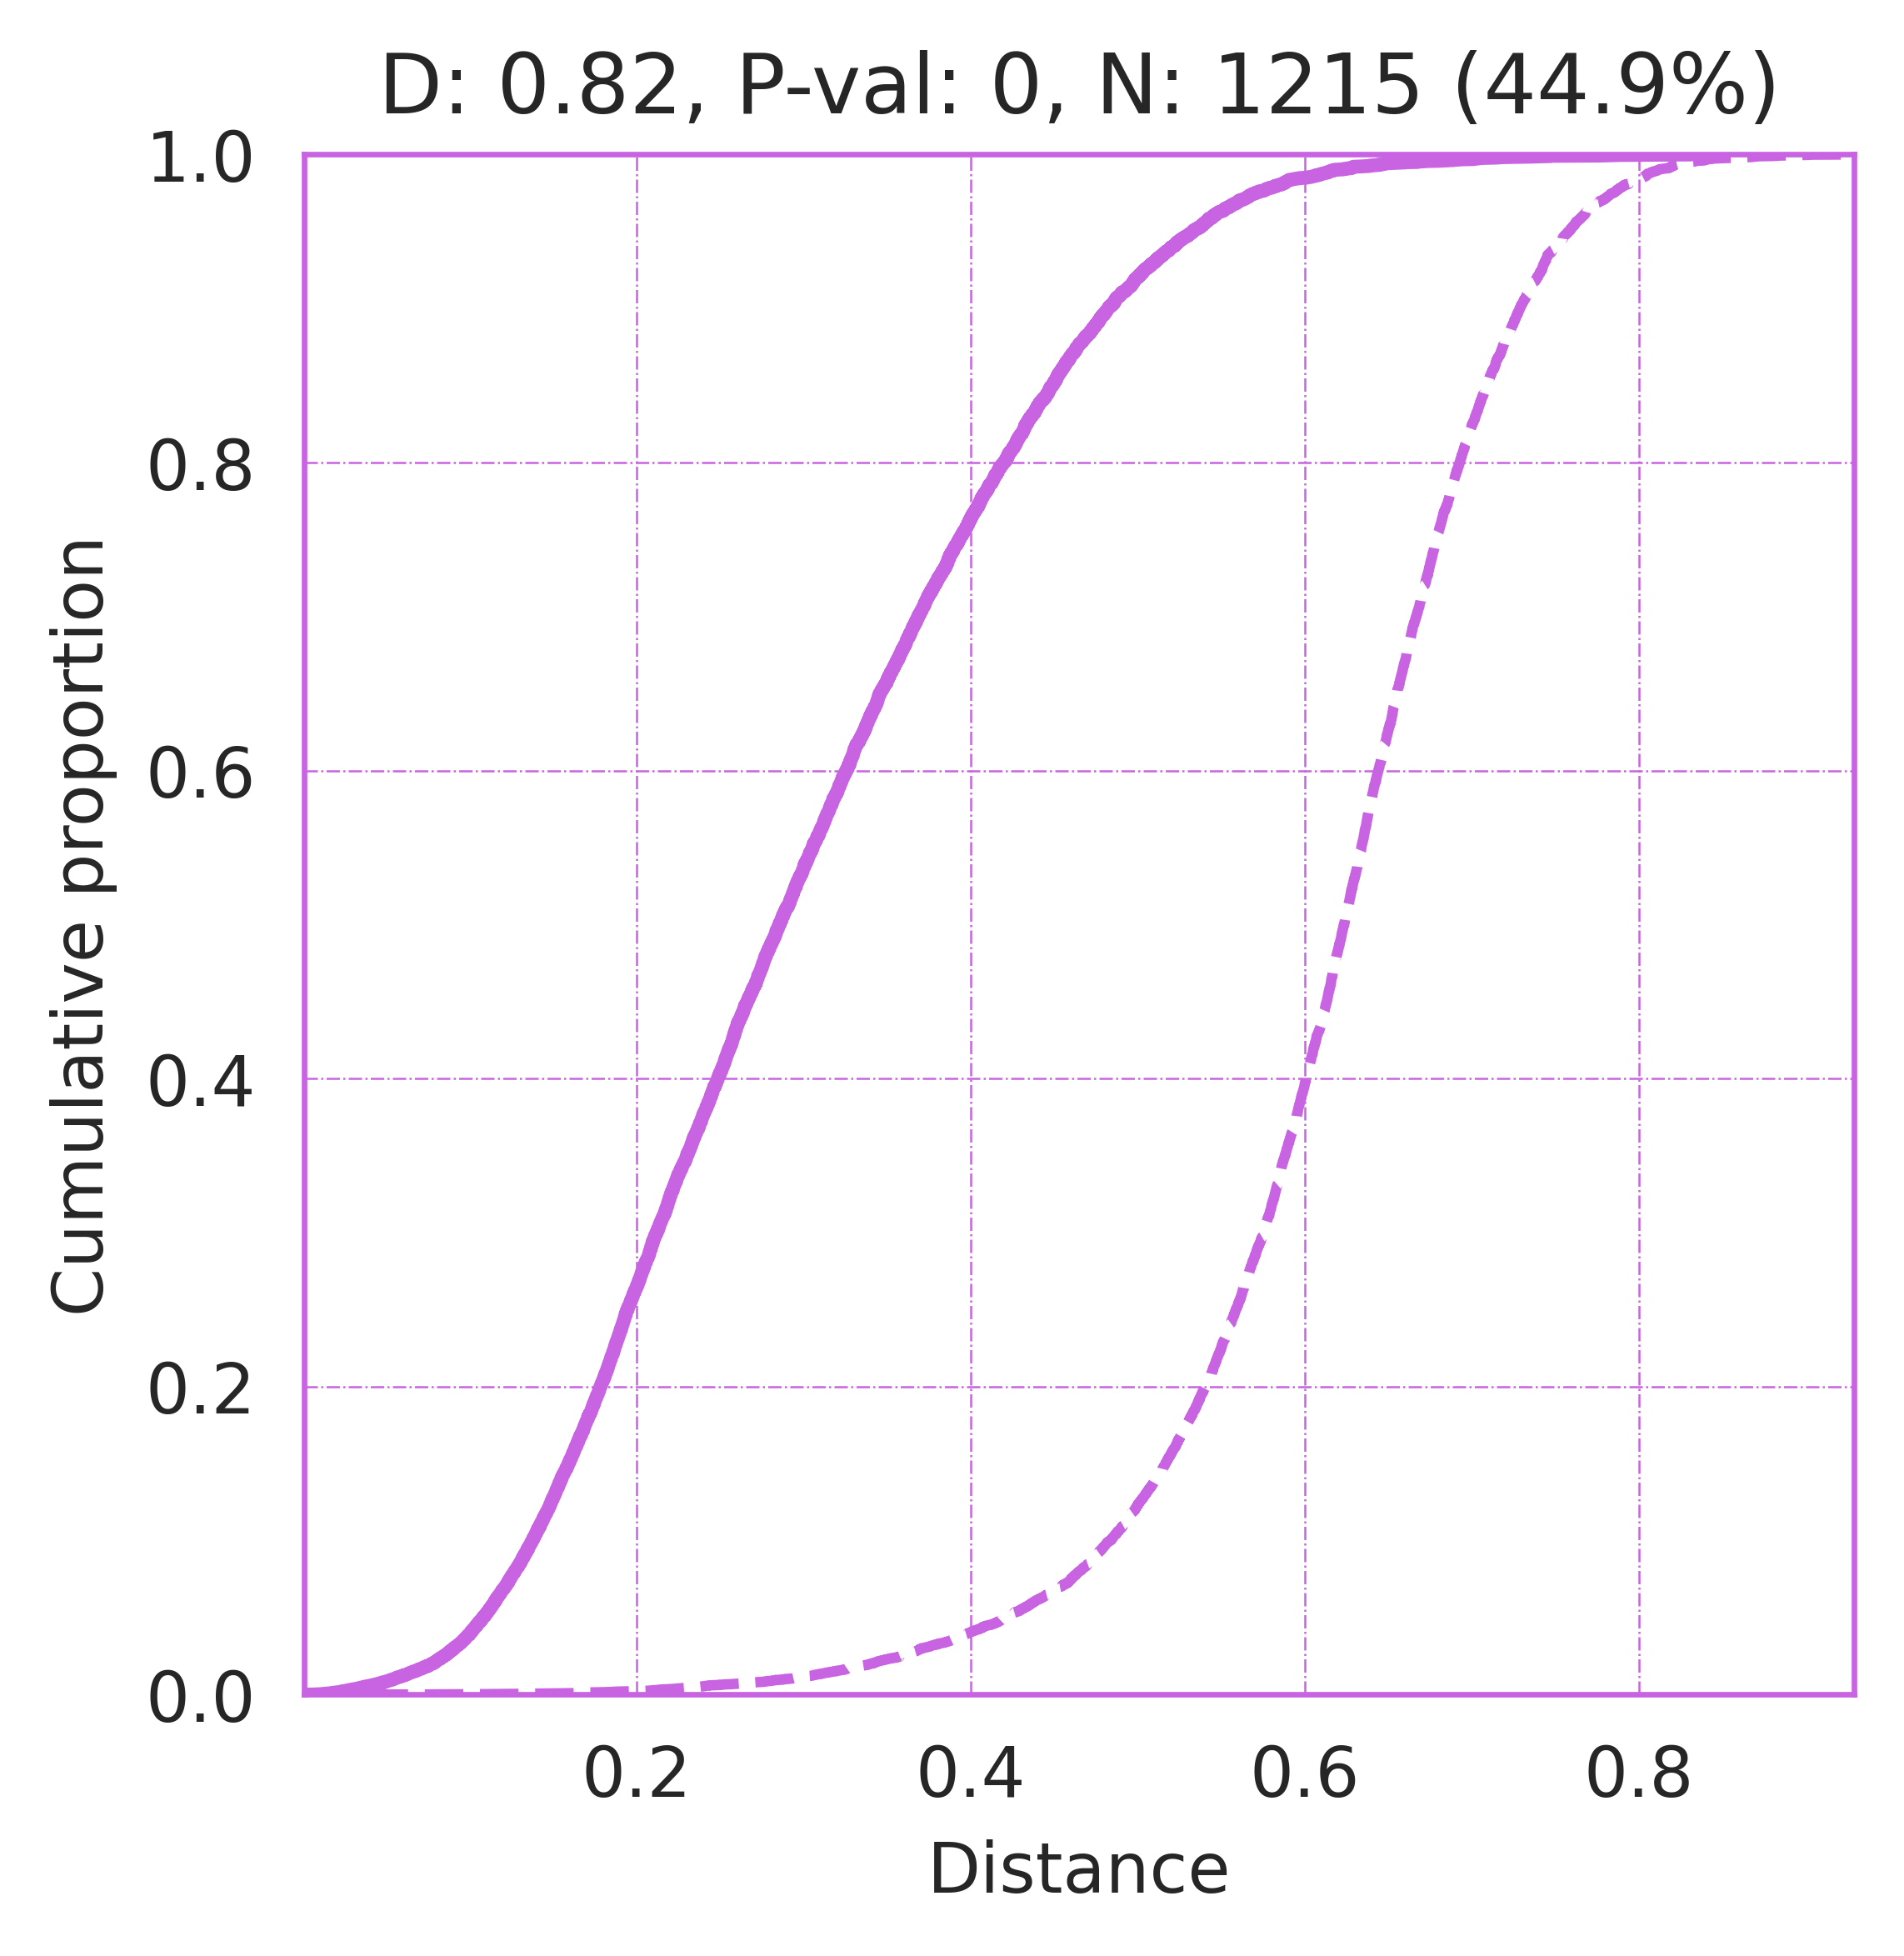

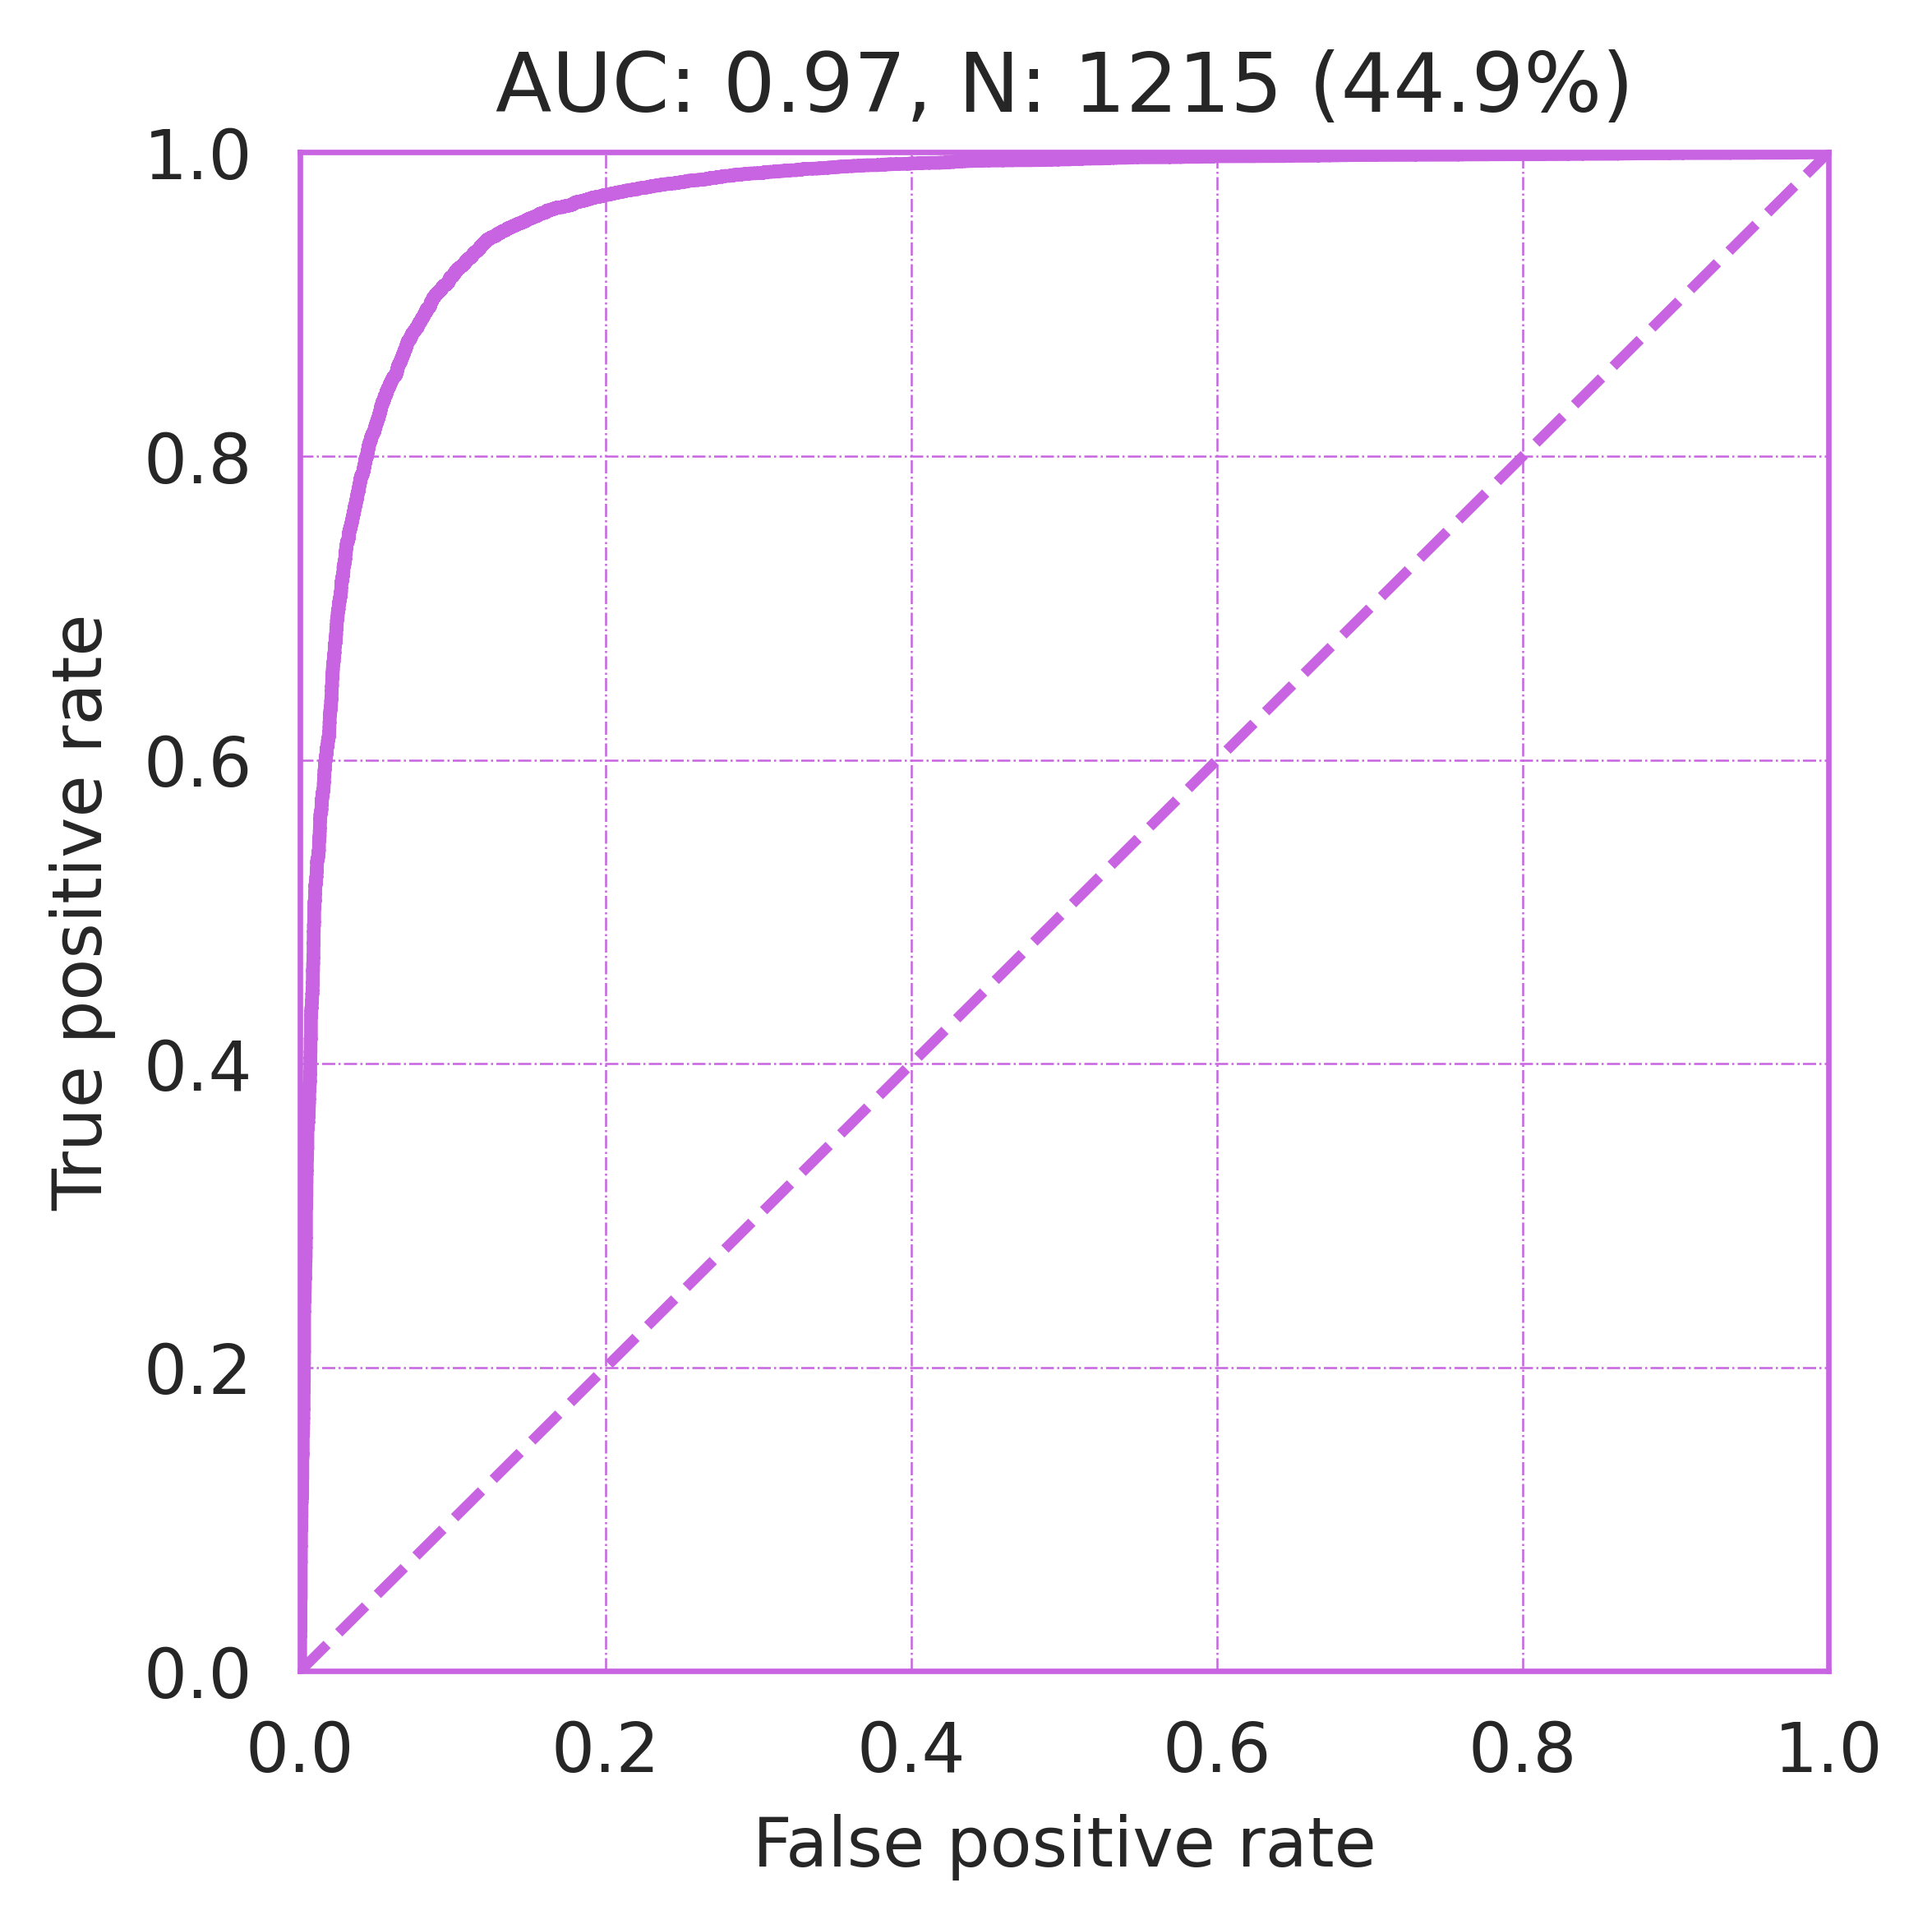

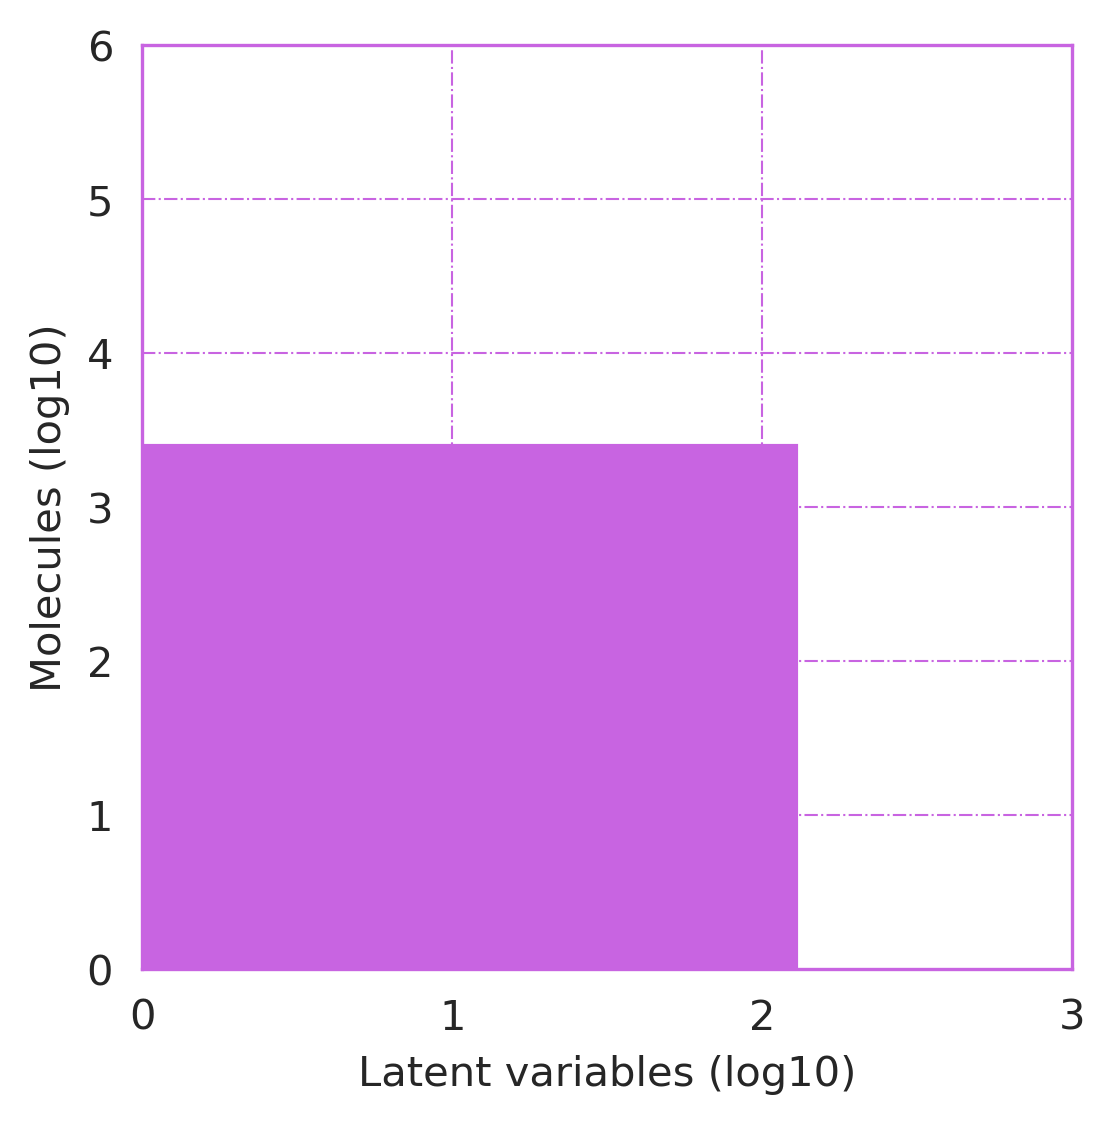

In [13]:
# Dataset Name
dataset = 'B1.002'

# Get sign1
sign1 = cc_local.get_signature('sign1', 'full', dataset)

# Get neig1
neig1 = cc_local.get_signature('neig1', 'full', dataset)  # By default, all vs ref

# Instantiation of sign2
sign2 = cc_local.signature(dataset, 'sign2')

# Cleaning both full and reference datasets. This is crucial!
sign2.clear_all()

# Fit sign2 given sign1 & neig1
sign2.fit(sign1, neig1, oos_predictor=False)

In [14]:
sign2.shape

(5826, 128)

2024-04-04 16:33:20,309 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign2
2024-04-04 16:33:20,311 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_B1
2024-04-04 16:33:20,679 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Across ROC
2024-04-04 16:33:20,683 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/A/A1/A1.001/sign0
2024-04-04 16:33:22,723 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/A/A1/A1.001/sign0
2024-04-04 16:33:29,001 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 5433 rows from dataset V
2024-04-04 16:33:49,125 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 5433 rows from dataset V

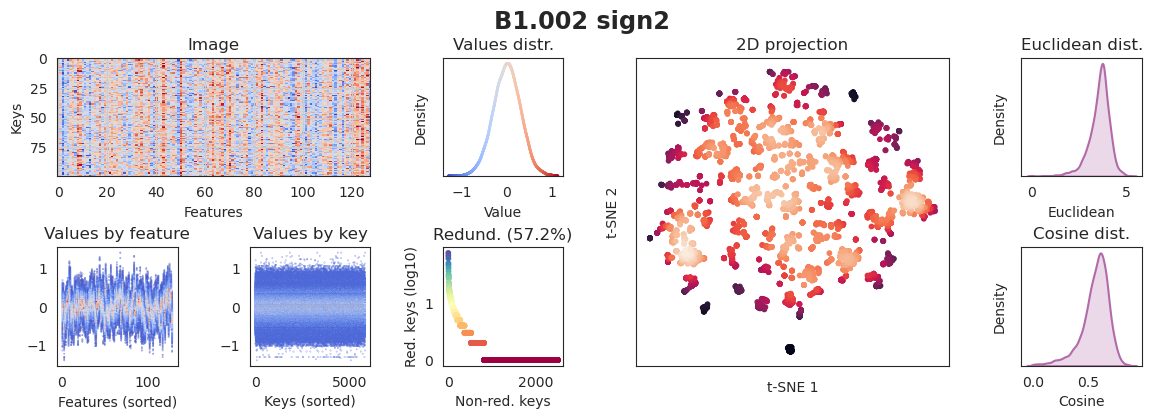

In [15]:
# Instantiation of sign2
sign2 = cc_local.signature(dataset, 'sign2')

# Instantiation of diag2 (diagnosis plots)
diag2 = sign2.diagnosis(ref_cctype='sign0')

# Including M1 into the ROC diagnosis plot
diag2.across_roc(include_datasets=[dataset], save=True, plot=False)

# Plot medium & small diagnosis plots
diag2.canvas(size='medium', savefig=True, savefig_kwargs={'dpi': 300})
diag2.canvas(size='small', savefig=True, savefig_kwargs={'dpi': 300})

## sign3 ##

In [4]:
# Dataset Name
dataset = 'B1.002'

# Get CC universe
cc_universe = []
for dat in cc_local.datasets:
    if dat != dataset and dat.endswith('001') and "B1" not in dat:
        cc_universe.extend(cc_local.get_signature('sign2', 'full', dat).keys)
cc_universe = set(cc_universe)

# Get sign2
sign2 = cc_local.signature(dataset, 'sign2')

# Get D1.002 molecules
b1_molecules = set(sign2.keys)

print("Number of molecules in the CC universe: " + str(len(cc_universe)))
print("Number of molecules in B1.002 sign2: " + str(len(b1_molecules)))
print("Intersection CC & B1.002: " + str(len(cc_universe.intersection(b1_molecules))))

2024-04-07 20:13:02,200 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/A/A1/A1.001/sign2
2024-04-07 20:13:04,661 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/A/A2/A2.001/sign2
2024-04-07 20:13:06,621 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/A/A3/A3.001/sign2
2024-04-07 20:13:08,933 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/A/A4/A4.001/sign2
2024-04-07 20:13:11,227 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/A/A5/A5.001/sign2
2024-04-07 20:13:13,718 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protoco

Number of molecules in the CC universe: 1009293
Number of molecules in B1.002 sign2: 5826
Intersection CC & B1.002: 5433


In [5]:
1009293 + 5826 - 5433

1009686

In [5]:
# Dataset Name
dataset = 'B1.002'

# Instantiation of sign3
sign3 = cc_local.signature(dataset, 'sign3')
sign3.clear_all()

# Create a list of sign2 to feed sign3 -- using the 24 CC spaces (without B1.001) and B1.002
sign2_list = list()

# For each CC space
for ds in cc_local.coordinates:
    ds += '.001'
    if ds == 'B1.001':
        ds = 'B1.002'
    sign2_list.append(cc_local.get_signature('sign2', 'full', ds))

# In total, we now have 25 spaces
print(len(sign2_list))

# Get M1 sign1
sign1_self = cc_local.signature(dataset, 'sign1')

# Get M1 sign2
sign2_self = cc_local.signature(dataset, 'sign2')

2024-04-07 20:13:31,220 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign3
2024-04-07 20:13:31,222 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign1
2024-04-07 20:13:31,227 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/reference/B/B1/B1.002/sign1
2024-04-07 20:13:31,229 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/reference/B/B1/B1.002/sign1
2024-04-07 20:13:31,230 chemicalchecker.core.sign1.sign1 [DEBUG   ] Reading triplets
2024-04-07 20:13:31,231 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/reference/B/B1/B1.002/sign1
2024-04-07 20:13:31,231 chemicalche

25


In [6]:
# Specify CC_config file
os.environ['CC_CONFIG'] = '/aloy/home/acomajuncosa/Protocols/cc_code/chemical_checker/setup/cc_config.json'

# Fit sign3 in the cluster
kwargs = {"cpu": 32, "mem_by_core": 1, "wait": False}
sign3.fit_hpc(sign2_list, sign2_self, sign1_self, sign2_universe=None, complete_universe="full", sign2_coverage=None, hpc_args=kwargs)

2024-04-07 20:13:40,322 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] CC_Config for function fit is: /aloy/home/acomajuncosa/Protocols/cc_code/chemical_checker/setup/cc_config.json
2024-04-07 20:13:40,323 chemicalchecker.util.config.config.Config [DEBUG   ] Loading config from: /aloy/home/acomajuncosa/Protocols/cc_code/chemical_checker/setup/cc_config.json
2024-04-07 20:13:40,362 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] HPC system to use: sge
2024-04-07 20:13:40,364 chemicalchecker.util.hpc.hpc.HPC [DEBUG   ] initializing object sge
2024-04-07 20:14:12,959 chemicalchecker.util.hpc.sge.sge [DEBUG   ] Job name is: CC_SIGN3_B1.002_fit__
2024-04-07 20:14:12,963 chemicalchecker.util.hpc.sge.sge [INFO    ] Writing file /aloy/scratch/acomajuncosa/CC/tmp_jobs/CC_SIGN3_B1.002_fit__m3257noh/job-CC_SIGN3_B1.002_fit__.sh...
2024-04-07 20:14:12,967 chemicalchecker.util.hpc.sge.sge [DEBUG   ] HPC submission: qsub -terse  -q all.q@pac-one107,all.q@pac-one109,all.q@pac-one301,all.q@p

In [8]:
dataset = 'B1.002'

# Instantiation of sign3
sign3 = cc_local.signature(dataset, 'sign3')

print(sign3.shape)

2024-04-10 09:01:08,302 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign3


(1009686, 128)


In [9]:
signatures = np.array(sign3)

In [10]:
min(signatures.flatten()), max(signatures.flatten())

(-0.2773362696170807, 0.26228201389312744)

In [11]:
del signatures

2024-04-10 09:03:39,410 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/B/B1/B1.002/sign3
2024-04-10 09:03:39,411 chemicalchecker.core.chemcheck.ChemicalChecker [DEBUG   ] ChemicalChecker with root: /aloy/home/acomajuncosa/Protocols/local_CC_B1
2024-04-10 09:03:39,590 chemicalchecker.core.diagnostics.Diagnosis [DEBUG   ] Across ROC
2024-04-10 09:03:39,592 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/A/A1/A1.001/sign0
2024-04-10 09:03:41,717 chemicalchecker.core.signature_base.BaseSignature [DEBUG   ] Loading signature: /aloy/home/acomajuncosa/Protocols/local_CC_B1/full/A/A1/A1.001/sign0
2024-04-10 09:03:52,215 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 10000 rows from dataset V
2024-04-10 09:05:10,295 chemicalchecker.core.signature_data.DataSignature [DEBUG   ] Fetching 10000 rows from dataset

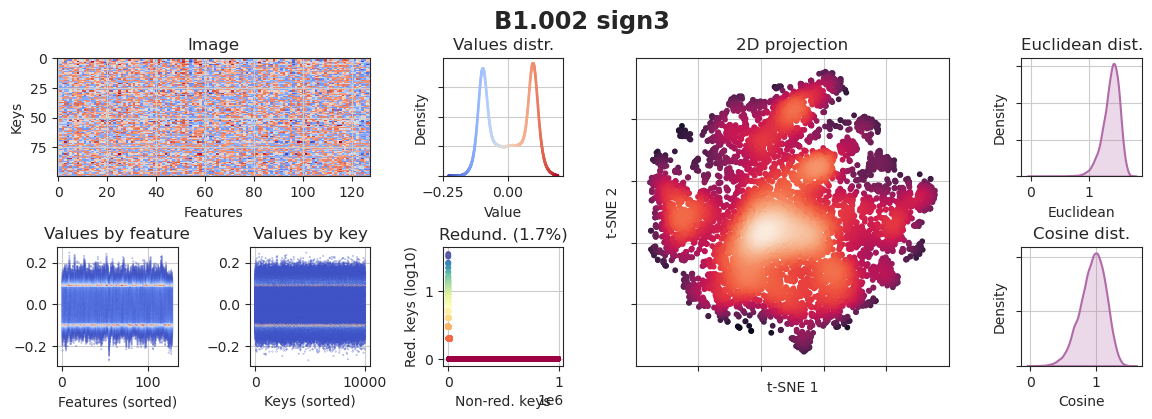

In [3]:
dataset = 'B1.002'

# Instantiation of sign3
sign3 = cc_local.signature(dataset, 'sign3')

# Instantiation of diag3 (diagnosis plots)
diag3 = sign3.diagnosis(ref_cctype='sign0')

# Including M1 into the ROC diagnosis plot
diag3.across_roc(include_datasets=[dataset], save=True, plot=False)

# Plot medium & small diagnosis plots
diag3.canvas(size='medium', savefig=True, savefig_kwargs={'dpi': 300})
diag3.canvas(size='small', savefig=True, savefig_kwargs={'dpi': 300})